In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# global variables

METHOD  = ['NN', 'SVR', 'CNN', 'CSSA']
_COLOR  = ['b',  'r',   'limegreen',   'orange']
_LINE   = ['-',  ':',   '-',   ':']
_MARKER = ['o',  'o',   'o',   'o']

COLOR  = dict(zip(METHOD, _COLOR))
LINE   = dict(zip(METHOD, _LINE))
MARKER = dict(zip(METHOD, _MARKER))

plt.rcParams['font.size'] = 60
plt.rcParams['lines.linewidth'] = 13
plt.rcParams['lines.markersize'] = 18

X_LEN=16
Y_LEN=14

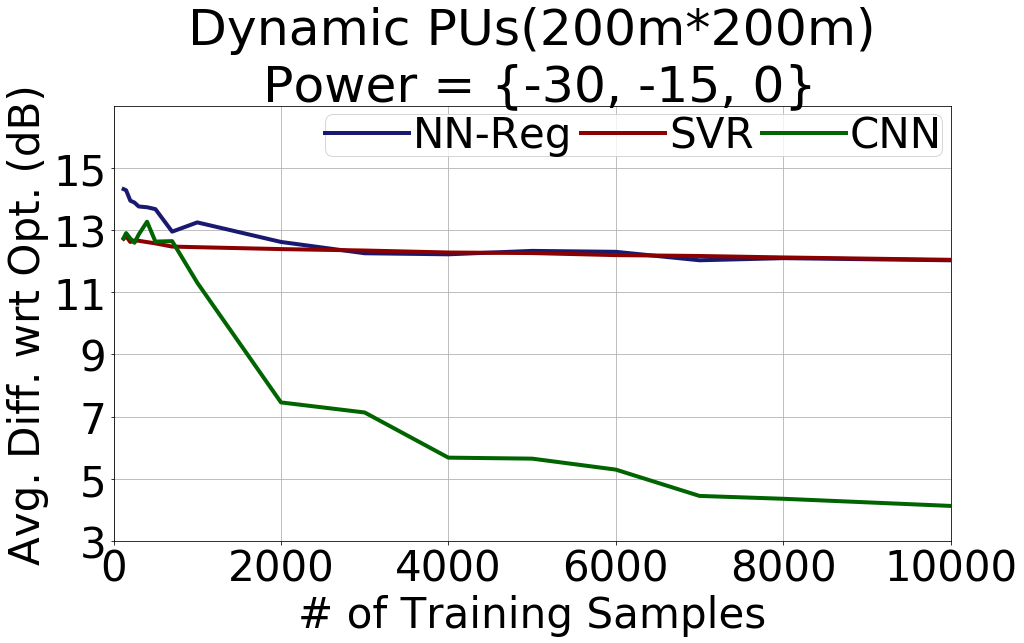

In [15]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is from a set {0, -15, -30}),  field 200*200
# data_sets = {"dynamic_pus_using_pus50000_15PUs_201912_3000_40_200.dat", "dynamic_pus_max_power50000_15PUs_201912_3000_40_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 4, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 5
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 8001, 1000)) + [10000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([14.321, 14.284, 13.95, 13.888, 13.763, 13.738, 13.677, 12.953, 13.25, 12.621, 12.257, 12.223, 12.333,
                     12.303, 12.031, 12.099, 12.03])
                
fp.append([6.656, 6.361, 6.727, 6.917, 7.211, 5.728, 7.483, 5.899, 7.02, 6.39, 6.662, 6.316, 6.434, 5.845, 6.359, 6.244, 6.056])

## SVR
average_diff.append([12.725, 12.808, 12.619, 12.669, 12.659, 12.616, 12.575, 12.472, 12.452, 12.391, 12.345, 12.281,
                     12.263, 12.197, 12.169, 12.122, 12.046])
fp.append([7.61, 7.091, 6.717, 7.164, 7.559, 7.319, 7.584, 7.632, 7.435, 7.599, 7.605, 7.624, 7.6, 7.533, 7.525, 7.48, 7.4])


## CNN
average_diff.append([12.742, 12.906, 12.731, 12.595, 12.859, 13.272, 12.632, 12.647, 11.309, 7.455, 7.131, 5.677, 5.645, 5.292, 
                     4.445, 4.353, 4.123])
fp.append([5.963, 5.861, 8.957, 8.821, 8.215, 9.518, 8.633, 6.644, 6.605, 3.919, 2.539, 3.866, 1.96, 2.717, 1.671, 3.0, 2.34])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n Power = {-30, -15, 0}')
plt.grid(True)

ax.set_yticks(np.arange(3,17, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 17])
ax.set_xlim([0, 10000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\dynamic_power_set_limited_PUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

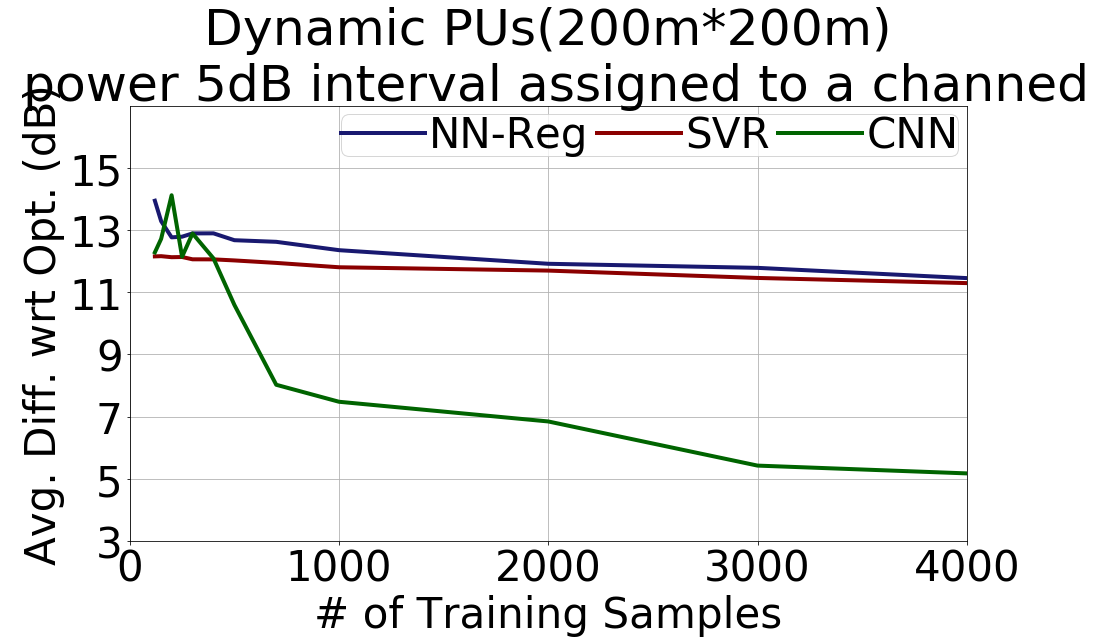

In [14]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus,  field 200*200
# data_sets = {"dynamic_pus_using_pus50000_9PUs_202001_1515_05_200.dat", 
#              "dynamic_pus_max_power50000_9PUs_202001_1515_05_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 9, 'log', 5
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([13.948, 13.289, 12.769, 12.79, 12.896, 12.898, 12.677, 12.625, 12.356, 11.918, 11.787, 11.457])
                
fp.append([6.896, 4.973, 5.609, 5.648, 6.336, 6.268, 6.225, 6.223, 6.675, 6.286, 5.728, 6.007])

## SVR
average_diff.append([12.156, 12.163, 12.13, 12.136, 12.062, 12.06, 12.026, 11.946, 11.806, 11.699, 11.462, 11.296])
fp.append([7.411, 7.261, 7.241, 7.195, 7.052, 6.65, 6.827, 7.081, 7.089, 7.15, 7.011, 6.929])


## CNN
average_diff.append([12.285, 12.721, 14.125, 12.144, 12.894, 12.092, 10.594, 8.023, 7.476, 6.842, 5.421, 5.17])
fp.append([6.23, 7.457, 4.918, 6.048, 4.964, 6.133, 5.217, 4.322, 2.932, 2.747, 2.283, 2.585])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n power 5dB interval assigned to a channel')
plt.grid(True)

ax.set_yticks(np.arange(3,17, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 17])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\dynamicPUs_200m.png', 
            bbox_inches = 'tight', pad_inches = 0)

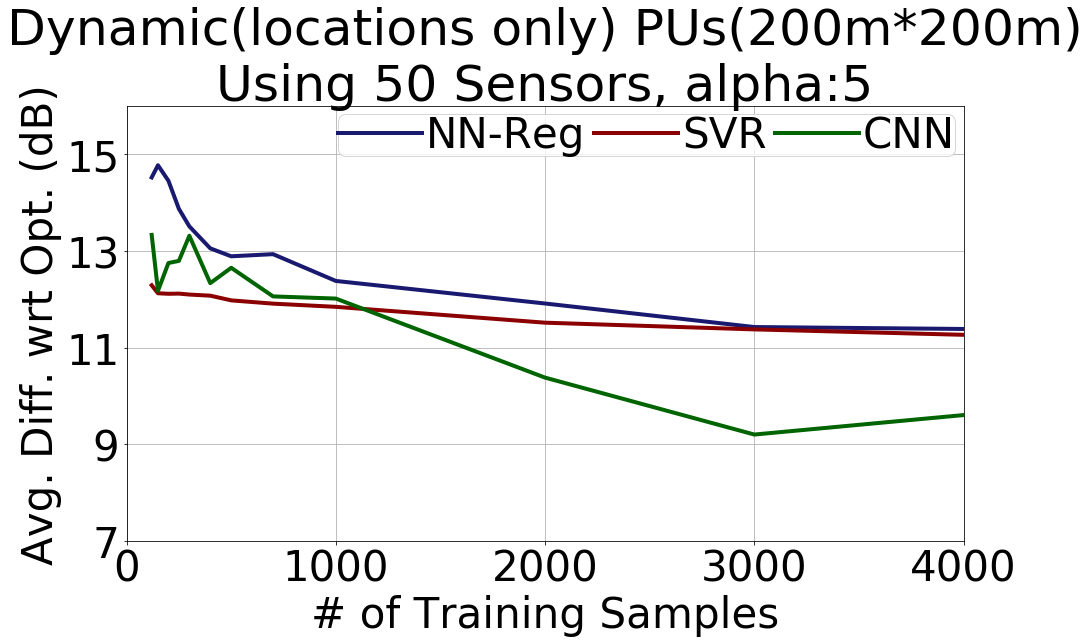

In [11]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_50sensors_202001_0516_08_200.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0516_08_200.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 6, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4
# max_pu_power = -15
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([14.52, 14.772, 14.451, 13.87, 13.507, 13.052, 12.888, 12.932, 12.378, 11.911, 11.424, 11.384])
                
fp.append([4.598, 6.23, 6.095, 6.128, 6.333, 5.818, 5.83, 6.477, 6.332, 6.346, 6.025, 5.808])

## SVR
average_diff.append([12.288, 12.123, 12.112, 12.116, 12.096, 12.073, 11.976, 11.908, 11.842, 11.514, 11.375, 11.263])
fp.append([6.214, 6.993, 6.94, 6.713, 6.84, 6.57, 6.794, 6.731, 6.878, 7.081, 7.045, 7.121])


## CNN
average_diff.append([13.331, 12.173, 12.749, 12.793, 13.313, 12.332, 12.65, 12.058, 12.013, 10.377, 9.199, 9.602])
fp.append([5.105, 7.282, 5.684, 5.915, 6.261, 6.352, 5.684, 7.614, 7.72, 6.601, 6.255, 5.281])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 50 Sensors, alpha:5')
plt.grid(True)

ax.set_yticks(np.arange(7,16, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([7, 16])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_50sensors_200m_alpha_5.png', 
            bbox_inches = 'tight', pad_inches = 0)

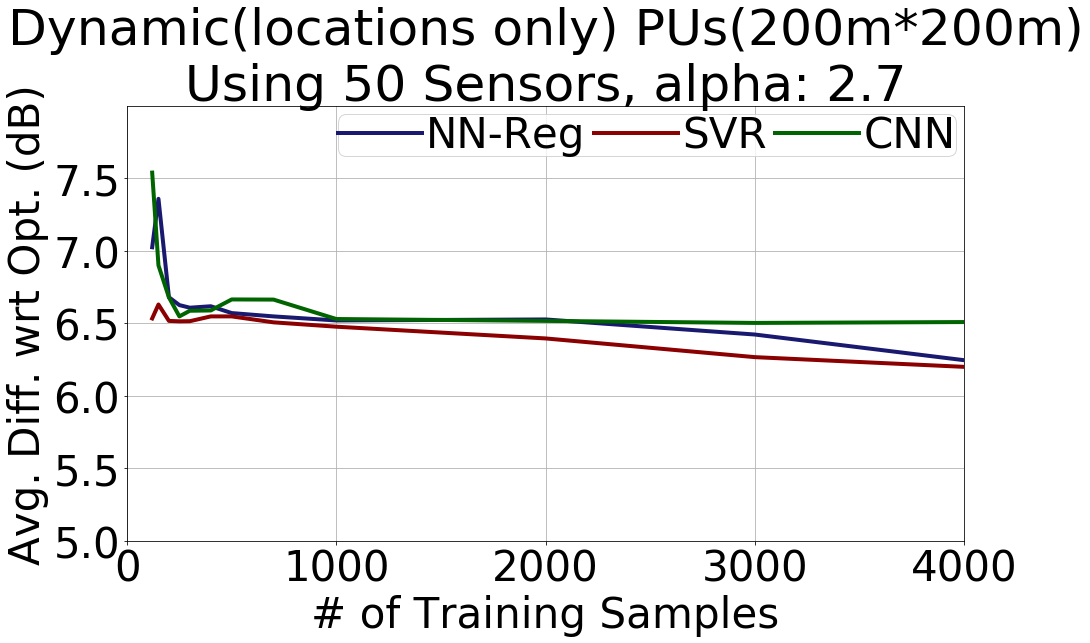

In [7]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 2.7
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -50
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.025, 7.359, 6.68, 6.626, 6.608, 6.618, 6.571, 6.548, 6.52, 6.527, 6.423, 6.246])            
fp.append([4.807, 3.969, 4.599, 4.577, 3.875, 3.673, 3.806, 3.727, 3.819, 4.221, 3.006, 3.098])

## SVR
average_diff.append([6.534, 6.63, 6.517, 6.514, 6.515, 6.548, 6.548, 6.507, 6.477, 6.396, 6.267, 6.2])
fp.append([4.274, 3.887, 3.896, 4.053, 3.921, 3.77, 3.727, 3.863, 3.796, 3.892, 3.848, 3.829])


## CNN
average_diff.append([7.54, 6.9, 6.679, 6.548, 6.587, 6.589, 6.665, 6.664, 6.53, 6.517, 6.503, 6.509])
fp.append([2.197, 2.783, 3.509, 4.405, 3.455, 3.943, 4.323, 3.302, 3.923, 3.867, 3.757, 3.628])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 50 Sensors, alpha: 2.7')
plt.grid(True)

ax.set_yticks(np.arange(5, 8, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5, 8])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_50sensors_200m_alpha2_7.png', 
            bbox_inches = 'tight', pad_inches = 0)

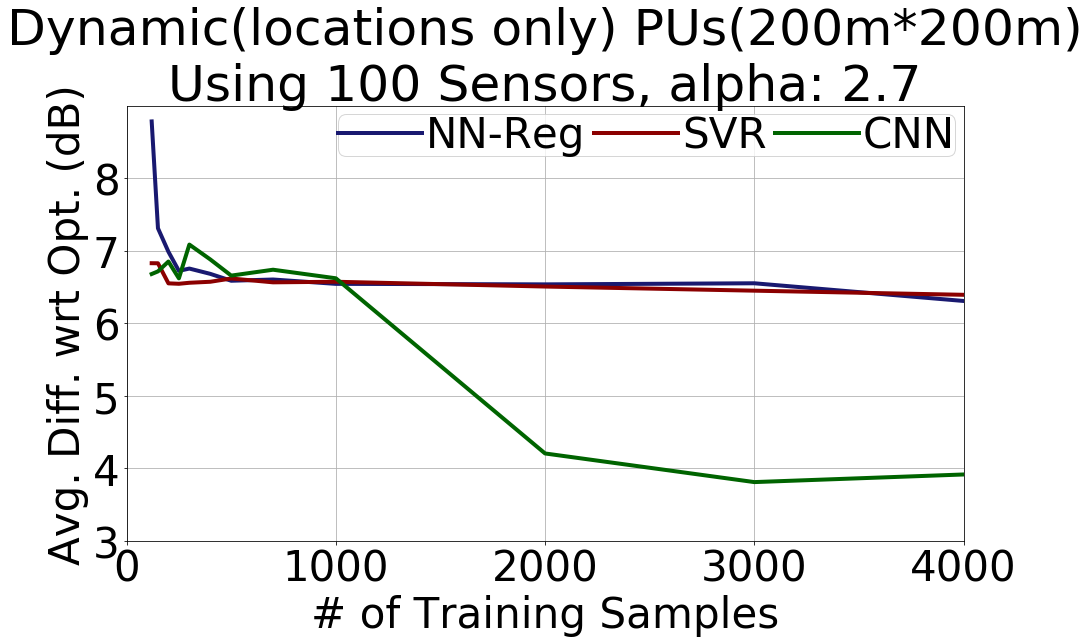

In [9]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat",
# "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 2.7
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -50
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([8.786, 7.312, 6.988, 6.724, 6.756, 6.683, 6.588, 6.605, 6.545, 6.538, 6.553, 6.309])            
fp.append([5.904, 5.537, 4.93, 4.449, 4.873, 4.784, 4.384, 4.548, 4.114, 3.968, 3.754, 3.301])

## SVR
average_diff.append([6.83, 6.829, 6.552, 6.546, 6.56, 6.574, 6.619, 6.566, 6.574, 6.508, 6.451, 6.394])
fp.append([3.989, 3.868, 4.306, 4.259, 4.349, 4.394, 4.65, 4.381, 4.419, 4.188, 4.061, 3.98])


## CNN
average_diff.append([6.681, 6.717, 6.853, 6.621, 7.087, 6.882, 6.659, 6.74, 6.622, 4.205, 3.81, 3.915])
fp.append([4.217, 4.355, 4.336, 4.126, 5.062, 5.203, 3.457, 4.974, 3.995, 2.65, 2.115, 1.553])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 100 Sensors, alpha: 2.7')
plt.grid(True)

ax.set_yticks(np.arange(3, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 9])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_100sensors_200m_alpha2_7.png', 
            bbox_inches = 'tight', pad_inches = 0)

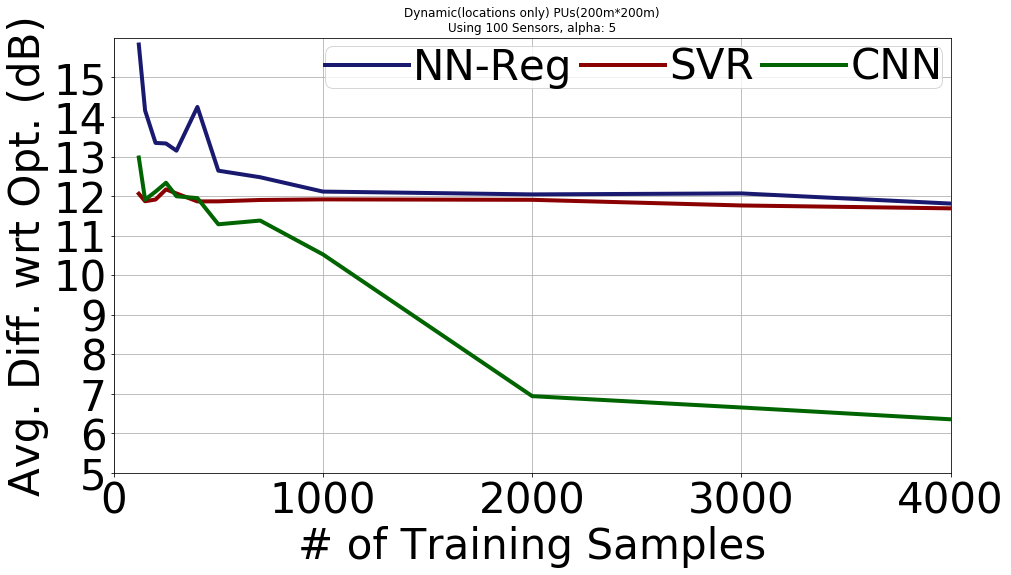

In [4]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 200*200, validation samples training/3, test samples 40k
# dynamic pus(power is fixed),  field 200*200
# data_sets = {"dynamic_pus_power_fixed_sensors_50000_9PUs_100sensors_202001_0613_23_200_alpha2_7.dat", "dynamic_pus_power_fixed_max_power50000_9PUs_202001_0613_23_200_alpha2_7.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 5, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 2
# max_pu_power = -15
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000))


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([15.833, 14.163, 13.344, 13.33, 13.148, 14.254, 12.642, 12.476, 12.113, 12.042, 12.067, 11.81])            
fp.append([7.345, 6.27, 5.583, 5.287, 5.246, 7.507, 6.082, 5.927, 6.372, 6.054, 5.949, 5.942])

## SVR
average_diff.append([12.059, 11.869, 11.912, 12.169, 12.066, 11.865, 11.866, 11.901, 11.916, 11.905, 11.762, 11.689])
fp.append([8.138, 7.44, 7.495, 7.841, 7.543, 7.113, 7.443, 7.514, 7.402, 7.259, 7.173, 7.257])


## CNN
average_diff.append([12.975, 11.909, 12.113, 12.337, 11.995, 11.948, 11.286, 11.38, 10.524, 6.939, 6.652, 6.353])
fp.append([4.604, 7.292, 8.69, 7.889, 6.814, 8.315, 6.737, 6.351, 4.141, 3.613, 3.124, 3.819])



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic(locations only) PUs(200m*200m)\nUsing 100 Sensors, alpha: 5')
plt.grid(True)

ax.set_yticks(np.arange(5, 16, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5, 16])
ax.set_xlim([0, 4000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML\\results\\Changing_locationPUs_100sensors_200m_alpha5.png', 
            bbox_inches = 'tight', pad_inches = 0)

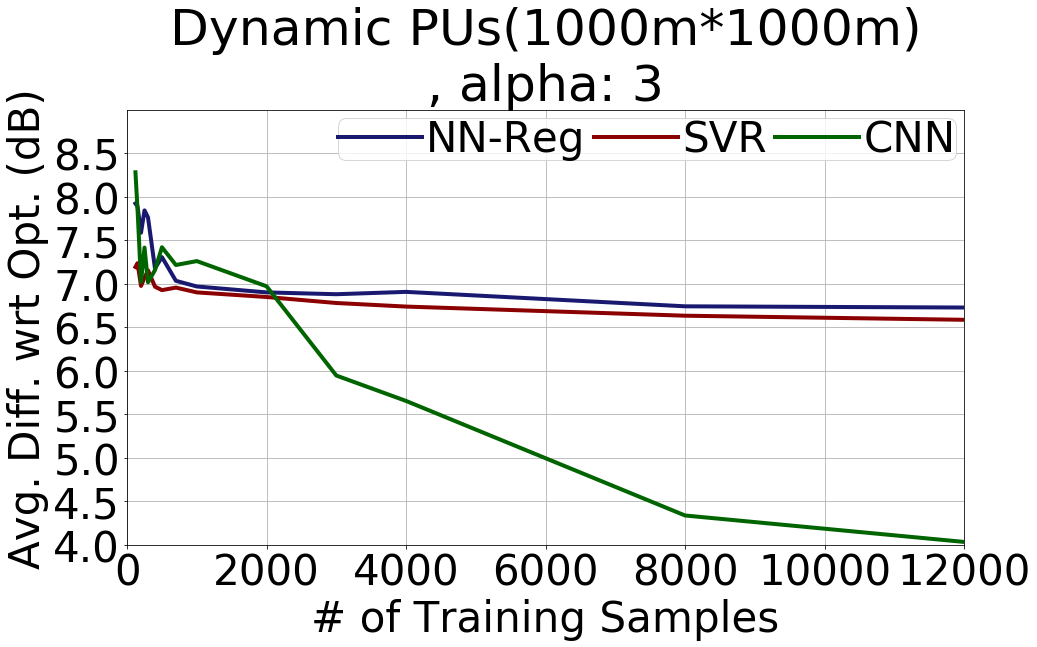

In [16]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_using_pus50000_15PUs_201912_2219_10_1k.dat", "dynamic_pus_max_power50000_15PUs_201912_2219_10_1k.dat"}
# alpha = 5
# comparing CNN and previous machine learning algos using sensor readings.

# alidation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
# sensors = False
# max_pu_power = 0
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [8000, 12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.924, 7.889, 7.588, 7.845, 7.764, 7.179, 7.308, 7.035, 6.97, 6.902, 6.881, 6.908, 6.742, 6.728])          
fp.append([3.368, 3.33, 3.261, 3.529, 3.966, 3.347, 3.662, 3.693, 3.738, 3.625, 3.764, 3.583, 3.145, 3.41])

## SVR
average_diff.append([7.194, 7.238, 6.976, 7.072, 7.155, 6.968, 6.928, 6.957, 6.902, 6.849, 6.78, 6.739, 6.634, 6.587])
fp.append([4.856, 4.72, 4.349, 4.287, 4.476, 4.273, 4.25, 4.336, 4.16, 4.155, 4.116, 4.101, 4.032, 4.032]) 



## CNN
average_diff.append([8.283, 7.856, 7.021, 7.417, 7.018, 7.159, 7.421, 7.217, 7.262, 6.972, 5.946, 5.174, 4.337, 4.033])
fp.append([4.156, 5.359, 3.604, 5.755, 4.308, 2.779, 3.967, 4.583, 3.734, 4.682, 2.438, 4.167, 2.794, 2.492]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

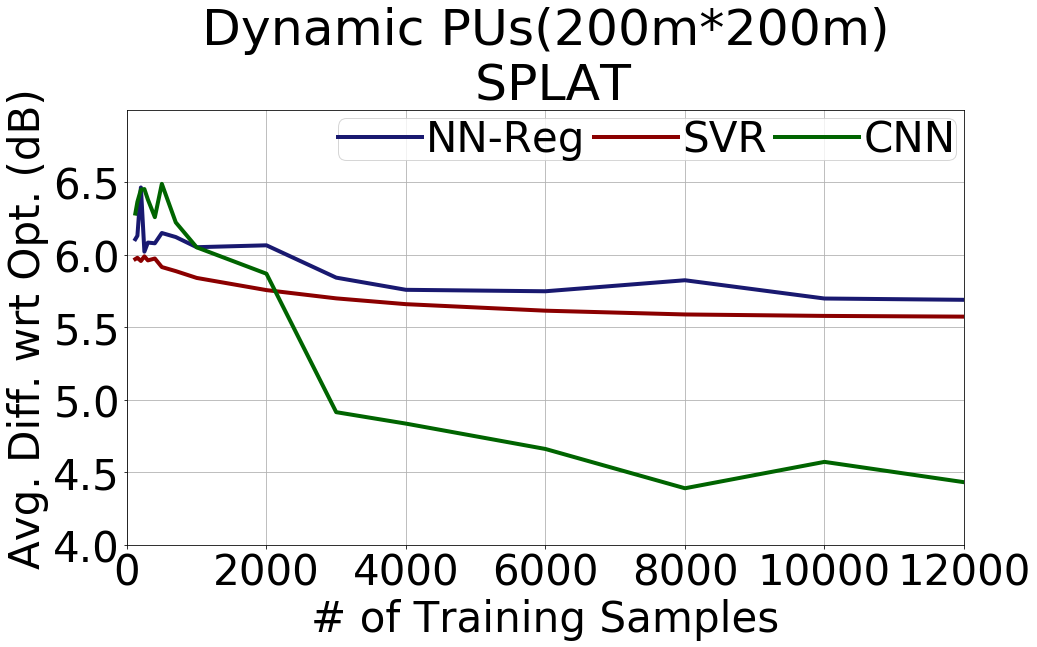

In [4]:
### MAX_POWER ANAlysis
## SPLAT
# field 200*200, validation samples training/3, test samples ~30k
# dynamic pus,  field 200*200
# splat_left_upper_ref = (40.800595, 73.107507)
# tx_height, rx_height = 30, 15
# data_sets = {"dynamic_pus_using_pus_50000_10PUs_200grid_splat_202001_3100_42.txt", 
#              "dynamic_pus_max_power50000_10PUs_200grid_splat_202001_3100_42.txt"}
# cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 200, 200, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 10, 'log', 5  # 'log', 'linear'
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
# sensors = False
# max_pu_power = 0
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [6000, 8000, 10000,
                                                                                               12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([6.108, 6.132, 6.465, 6.022, 6.085, 6.08, 6.151, 6.123, 6.053, 6.066, 5.843, 5.759,
                     5.749, 5.825, 5.699, 5.69])          
fp.append([3.227, 3.14, 3.649, 3.261, 3.044, 2.985, 2.824, 3.06, 2.869, 3.177, 3.29, 3.186, 3.019, 2.818,
           3.164, 2.977])

## SVR
average_diff.append([5.971, 5.98, 5.958, 5.99, 5.962, 5.975, 5.916, 5.888, 5.841, 5.757, 5.7, 5.66, 
                    5.615, 5.589, 5.579, 5.574])
fp.append([3.943, 3.784, 3.676, 3.869, 3.85, 3.789, 3.756, 3.623, 3.589, 3.6, 3.655, 3.654, 3.64, 
           3.635, 3.661, 3.629]) 



## CNN
average_diff.append([6.285, 6.366, 6.45, 6.454, 6.382, 6.26, 6.49, 6.224, 6.052, 5.87, 4.915, 4.836, 4.661, 
                     4.39, 4.572, 4.432])
fp.append([3.612, 3.605, 3.699, 3.594, 4.263, 2.916, 3.756, 3.587, 2.819, 3.215, 3.294, 2.149, 3.415, 
           2.428, 2.803, 2.471]) 
# for 12 epoches and 15 filters
# [6.59, 6.676, 6.716, 6.614, 6.352, 6.79, 6.849, 6.845, 6.267, 5.774, 4.888, 4.533]
# [3.82, 3.625, 3.975, 3.738, 3.175, 3.133, 3.323, 3.283, 2.96, 3.234, 2.388, 2.447]

# for 6 epoches and 15 filters
# [6.488, 6.389, 6.235, 6.186, 6.113, 6.373, 6.139, 6.231, 6.059, 6.049, 5.07, 5.397]
# [3.063, 3.262, 2.961, 4.066, 3.081, 2.838, 3.358, 4.318, 4.086, 3.286, 2.011, 3.543]

# for 12 epochs and 10 filter
# [7.146, 6.657, 6.888, 6.659, 6.466, 6.916, 6.981, 6.729, 6.714, 5.37, 4.673, 4.611]
# [4.596, 3.707, 3.526, 3.973, 3.809, 2.937, 3.178, 3.34, 3.926, 2.335, 2.623, 2.174]



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(200m*200m)\n SPLAT')
plt.grid(True)

ax.set_yticks(np.arange(4, 7, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 7])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_200_SPLAT.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, with noise(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_15PUs_1000grid_log_noisy_std1_202003_0702_12.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_0702_12.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 4  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192, 12288] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append()          
fp.append()

## SVR
average_diff.append()
fp.append() 



## CNN
average_diff.append([7.379, 7.262, 7.951, 7.413, 7.199, 4.678, 3.476, 2.875])
fp.append([3.049, 4.539, 6.467, 3.812, 3.872, 3.178, 1.781, 1.543]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
### MAX_POWER ANAlysis
#variable training samples, no noise, field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_sensors_50000_15PUs_200sensors_1000grid_1cell_log_noisy_std1_202003_0702_12.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_0702_12.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 3  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 200
#     sensors_file_path = "rsc/sensors/" + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors"
average_diff = []
fp = []
training_samples = [120, 150, 200, 250, 300, 400, 500, 700] + list(range(1000, 4001, 1000)) + [8000, 12000]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append()          
fp.append()

## SVR
average_diff.append()
fp.append() 



## CNN
average_diff.append([7.067, 7.053, 7.251, 7.435, 7.64, 7.015, 7.632, 7.662, 7.973, 7.89, 7.678, 8.187, 7.107, 7.171])
fp.append([4.026, 4.181, 3.78, 3.143, 2.723, 4.151, 5.396, 4.583, 3.43, 4.82, 3.013, 3.665, 3.554, 3.492]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 12000])
plt.legend([ 'NN-Reg', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_PUs_1000m_alpha3.png', 
            bbox_inches = 'tight', pad_inches = 0)

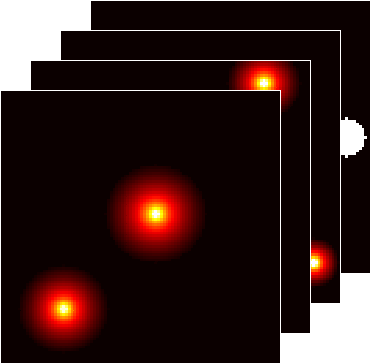

In [109]:
from PIL import Image
im1 = Image.open('ML/results/layer0.png')
im2 = Image.open('ML/results/layer1.png')
im3 = Image.open('ML/results/layer2.png')
im4 = Image.open('ML/results/layer3.png')

offset = 30
res = Image.new('RGB', (im1.size[0]+3*offset, im1.size[1]+3*offset), (255,255,255))
res.paste(im4, (offset*3, 0), im4)
res.paste(im3, (offset*2, offset), im3)
res.paste(im2, (offset*1, offset*2), im2)
res.paste(im1, (0, offset*3), im1)
res.save('ML/results/processed_image.png')
res

**Real results**

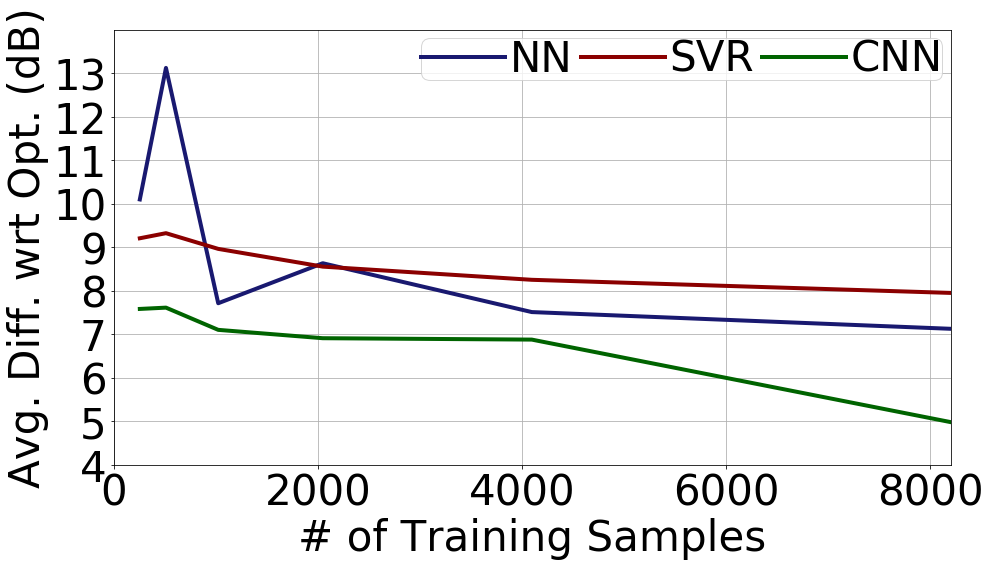

In [9]:
### MAX_POWER ANAlysis
#variable training samples, with noise(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus,  field 1000*1000
# data_sets = {"dynamic_pus_sensors_50000_15PUs_3000sensors_1000grid_1cell_log_noisy_std1_202003_2422_52.dat", 
# "dynamic_pus_max_power_50000_15PUs_1000grid_1cell_log_noisy_std1_202003_2422_52.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# pus_num, intensity_degradation, slope = 15, 'log', 3  # 'log', 'linear'
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3000
#     sensors_file_path = "rsc/sensors/" + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors"
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.102, 13.127, 7.715, 8.635, 7.512, 7.128])          
fp.append([1.589, 1.024, 5.997, 7.564, 5.555, 4.366])
# best lambda = [0, 1, 1, 0.01, 0.1, 1]

## SVR
average_diff.append([9.209, 9.326, 8.965, 8.557, 8.254, 7.953])
fp.append([4.871, 3.968, 3.921, 4.092, 4.152, 4.224])



## CNN
average_diff.append([7.584, 7.614, 7.103, 6.911, 6.879, 4.985])
fp.append([3.698, 5.935, 3.147, 4.451, 3.843, 2.699]) 



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 14, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 14])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_15PUs_1000m_alpha3_noise1_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

# Fig 9 (a)

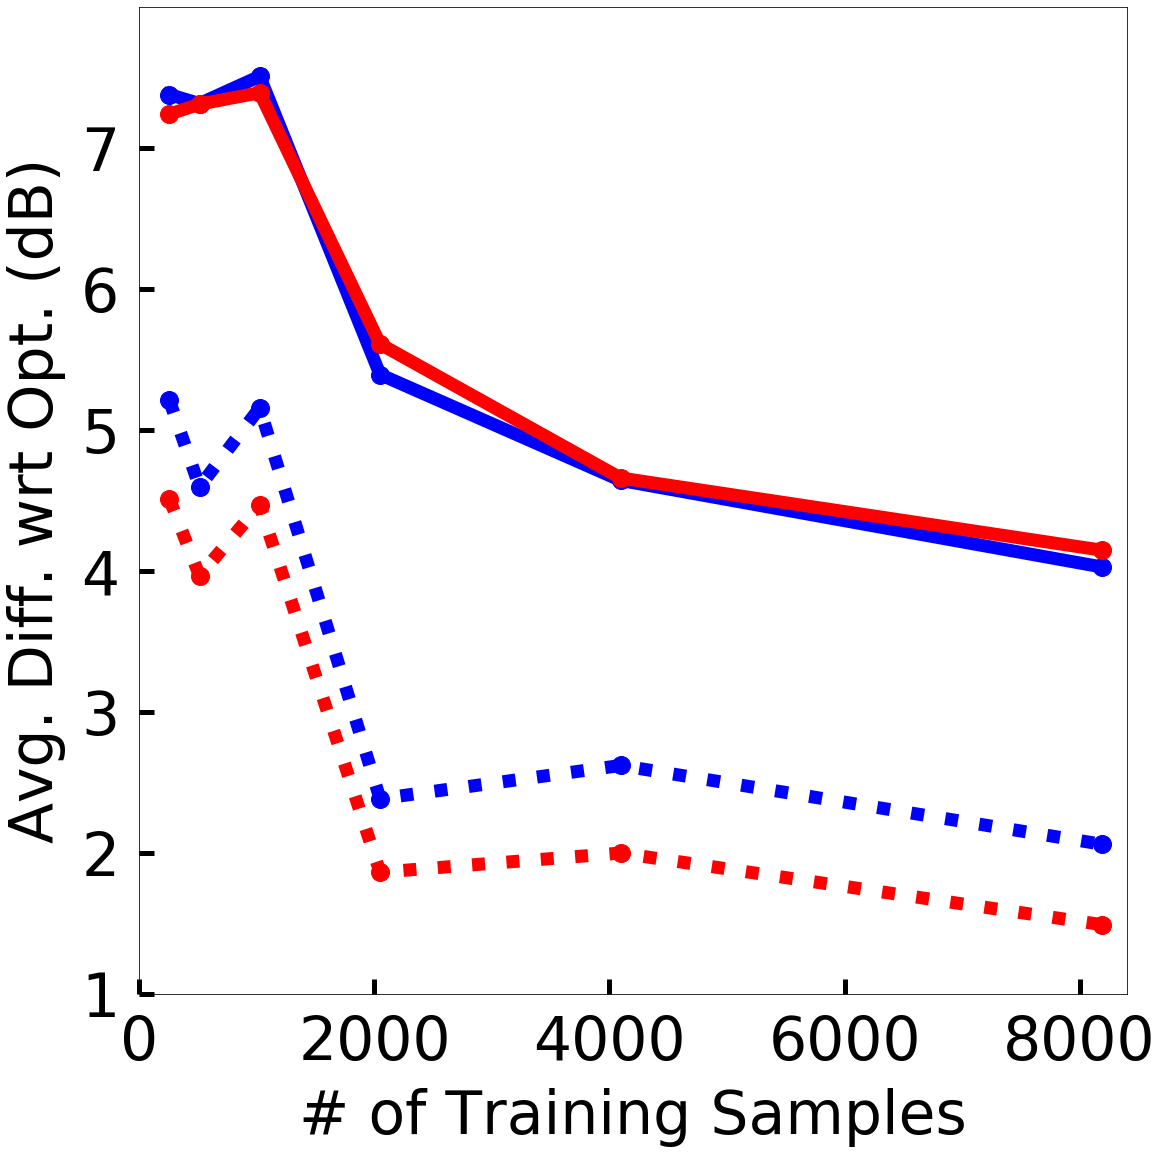

In [151]:
### MAX_POWER ANAlysis, Conservative Model
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202005_0400_37.dat", 
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202005_0400_37.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# number_samples = [256, 512, 1024, 2048, 4096, 8192] 
# # number_samples = [4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
average_diff_cons = []
fp_cons = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
# average_diff.append()          
# fp.append()

# ## SVR
# average_diff.append()
# fp.append() 



## CNN
average_diff.append([7.376, 7.312, 7.505, 5.391, 4.64, 4.026])
fp.append([5.207, 4.595, 5.154, 2.383, 2.619, 2.06])
average_diff_cons.append([7.237, 7.308, 7.389, 5.607, 4.657, 4.145])
fp_cons.append([4.509, 3.964, 4.467, 1.862, 1.998, 1.49])
# best_lambda = [1, 1, 0.1, 0.001]



fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.12, right=0.95, top=0.8, bottom=0.14)
fig.subplots_adjust(left=0.12, right=0.977, top=0.997, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, fp[0], color=COLOR['NN'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff_cons[0], color=COLOR['SVR'],  marker=MARKER['NN'],  linestyle=LINE['NN'])
plt.plot(training_samples, fp_cons[0], color=COLOR['SVR'], marker=MARKER['SVR'], linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(1, 8, 1))
ax.set_ylim([1, 8])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.17, 1)
# plt.legend([r"Basic $\mathrm{\mathcal{A}_{err}}$", r"Basic $\mathrm{\mathcal{A}_{fp}}$",
#             r"Cons. $\mathrm{\mathcal{A}_{err}}$", r"Cons. $\mathrm{\mathcal{A}_{fp}}$"], 
#            bbox_to_anchor=box_to_anchor,
#            ncol=2, loc='lower left', columnspacing=1.5)
plt.savefig('ML/results/new/dynamic_pus_numpus_10_20_alpha3_grid1000_conserve.png')

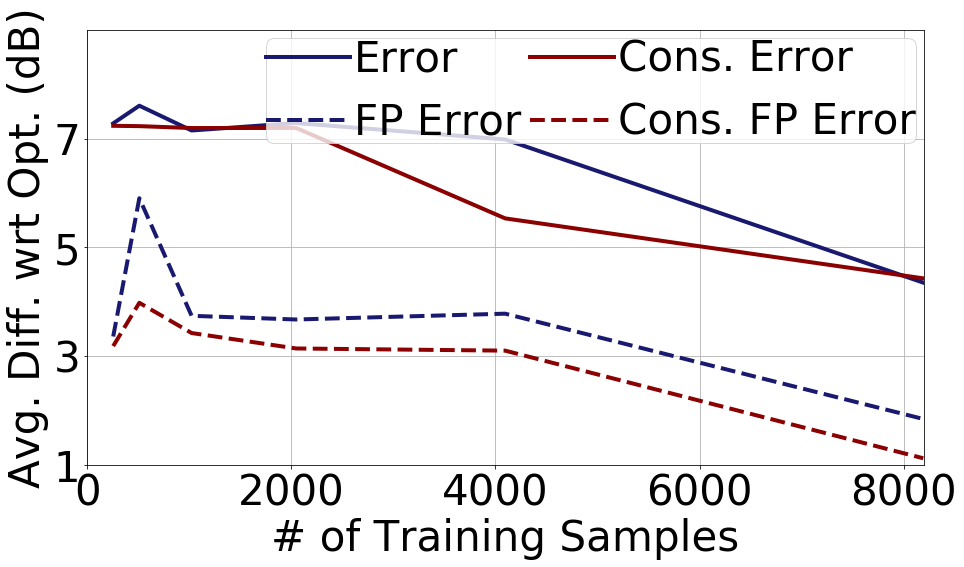

In [25]:
### MAX_POWER ANAlysis, Conservative Model
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt", 
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# number_samples = [256, 512, 1024, 2048, 4096, 8192] 
# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30  # su_size:30 for 1000, 10 for 100
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3600
average_diff = []
fp = []
average_diff_cons = []
fp_cons = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
# average_diff.append()          
# fp.append()

# ## SVR
# average_diff.append()
# fp.append() 



## CNN
average_diff.append([7.281, 7.606, 7.15, 7.287, 6.985, 4.351])
fp.append([3.36, 5.904, 3.741, 3.673, 3.78, 1.843])
average_diff_cons.append([7.236, 7.23, 7.195, 7.197, 5.533, 4.43])
fp_cons.append([3.184, 3.98, 3.424, 3.14, 3.10, 1.12])





line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp[0], color='midnightblue', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
plt.plot(training_samples, average_diff_cons[0], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp_cons[0], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(#10-20)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(1, 9, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([1, 9])
ax.set_xlim([0, 8200])
plt.legend([ 'Error', 'FP Error', 'Cons. Error', 'Cons. FP Error'], ncol=2, loc='upper right', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/dynamic_pus_numpus_10_20_alpha3_grid1000_conserve_ss3600.png', 
            bbox_inches = 'tight', pad_inches = 0)

# Fig 6 (a)

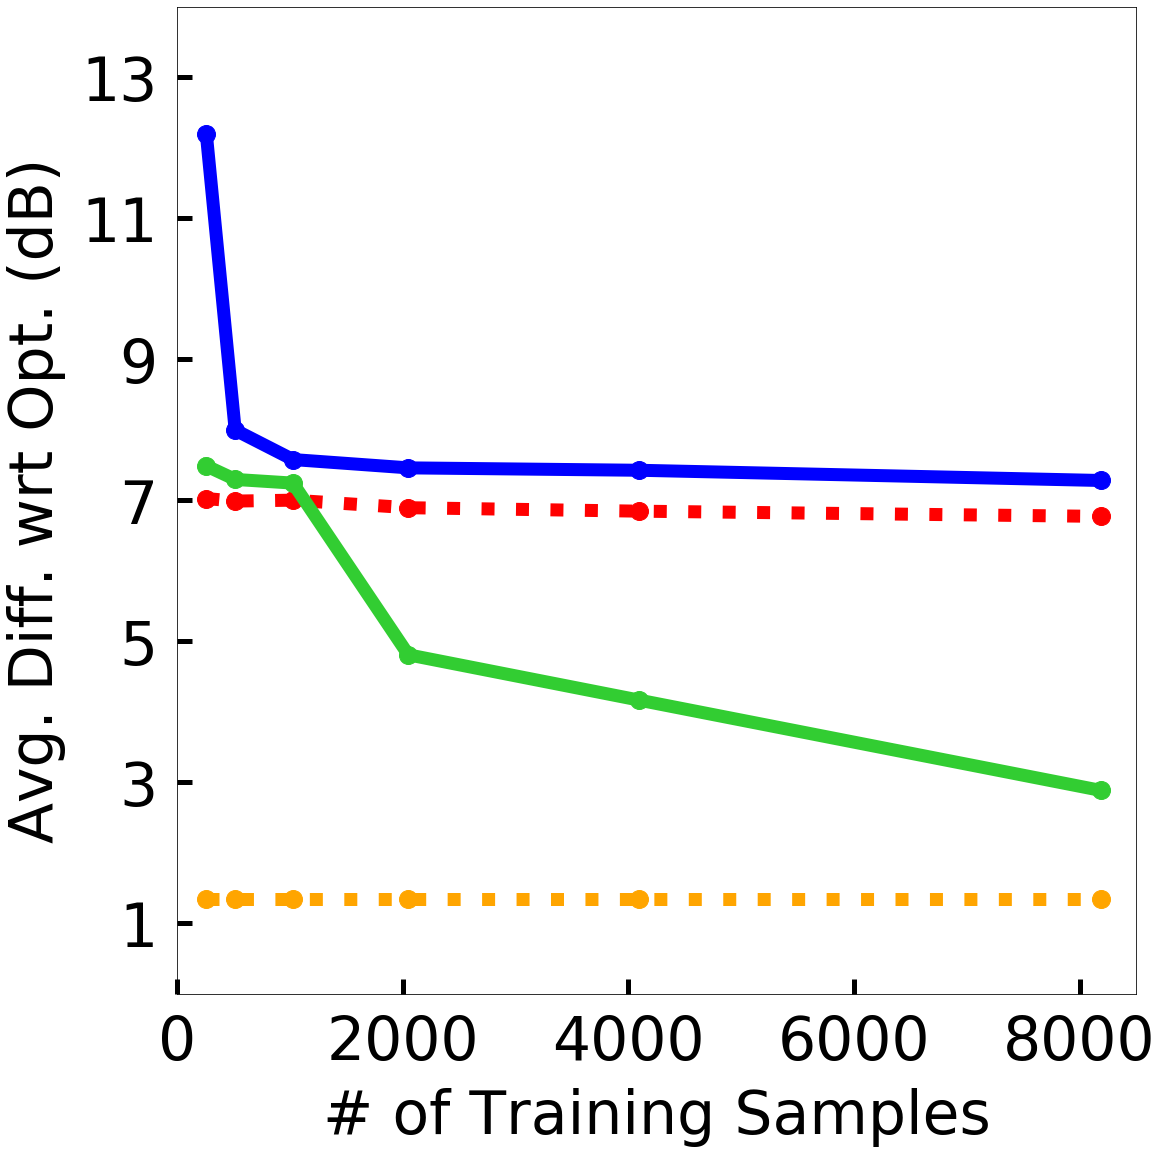

In [146]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_1000grid_log_noisy_std1_202004_0116_48.txt", 
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0116_48.txt"}
# alpha = 3.5
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_sus_num = 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False

average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 

## NN    
average_diff.append([12.193, 7.994, 7.576, 7.458, 7.424, 7.279])          
fp.append([1.617, 3.816, 3.336, 2.981, 2.83, 2.715])
#best lambda:  [0, 0.01, 0, 0, 0.01, 0.01]

## SVR
average_diff.append([7.023, 6.987, 7.0, 6.893, 6.844, 6.77])
fp.append([4.469, 4.027, 3.999, 4.047, 4.016, 4.014])

## CNN
average_diff.append([7.485, 7.294, 7.242,4.807, 4.164, 2.883])
fp.append([2.938, 4.496, 4.267, 2.333, 2.16, 1.478]) 

# CSSA - Shaifur 1600 sensors
average_diff.append([1.34] * len(average_diff[0]))
fp.append([0.53] * len(average_diff[0]))

fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.982, top=0.997, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)

ax.set_yticks(np.arange(1, 14, 2))
ax.tick_params(direction='in', length=15, width=5, pad=20)

ax.set_ylim([0, 14])
ax.set_xlim([0, 8500])
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')

plt.savefig('ML/results/new/Changing_10_20PUs_1000m_alpha3_noise1_1000grid_1cell.png')

# Fig 6 (b)

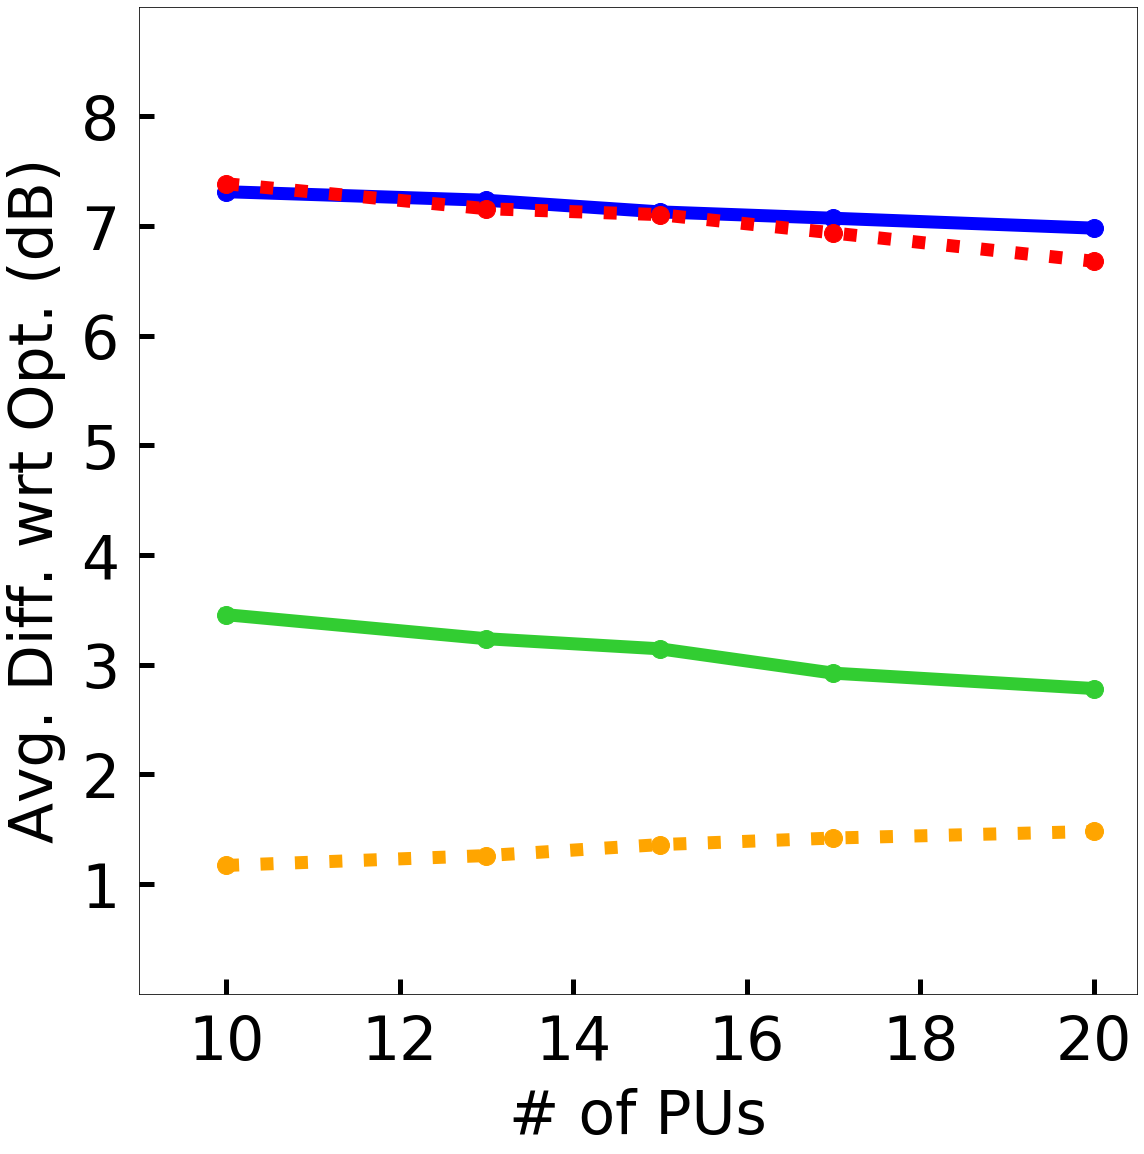

In [123]:
# SPLAT
### MAX_POWER ANAlysis, Effect of changing number of PUs, 8k training set
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
# "dynamic_pus_using_pus_60000_10PUs_1SUs_square100grid_splat_2020_07_07_04_51.txt",
# "dynamic_pus_max_power_60000_10PUs_1SUs_square100grid_splat_2020_07_07_04_51.txt",
# "dynamic_pus_using_pus_60000_13PUs_1SUs_square100grid_splat_2020_07_07_11_19.txt",
# "dynamic_pus_max_power_60000_13PUs_1SUs_square100grid_splat_2020_07_07_11_19.txt",
# "dynamic_pus_using_pus_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_41.txt",
# "dynamic_pus_max_power_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_41.txt",
# "dynamic_pus_using_pus_60000_17PUs_1SUs_square100grid_splat_2020_07_07_11_22.txt",
# "dynamic_pus_max_power_60000_17PUs_1SUs_square100grid_splat_2020_07_07_11_22.txt",
# "dynamic_pus_using_pus_60000_20PUs_1SUs_square100grid_splat_2020_07_07_11_24.txt",
# "dynamic_pus_max_power_60000_20PUs_1SUs_square100grid_splat_2020_07_07_11_24.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [10, 13, 15, 17, 20] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.312, 7.234, 7.128, 7.07, 6.98 ])          
fp.append([4.093, 3.915, 3.817, 3.798, 3.624])

# best_lambda = [, 0.1, , 0.1, 0.1]

## SVR
average_diff.append([7.385, 7.157, 7.103, 6.936, 6.678 ])
fp.append([3.812, 3.715, 3.678, 3.516, 3.476]) 


## CNN
average_diff.append([3.456, 3.237, 3.145, 2.923, 2.783])
fp.append([1.92, 1.824, 1.723, 1.613, 1.425]) 
#best_lambda = [0.001, 0.1, 0.1, 0, 1, ]

#SHAIFUR - using 1600 sensors
average_diff.append([1.17, 1.26, 1.36, 1.42, 1.48])
fp.append([0.56, 0.54, 0.51, 0.52, 0.52])


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.13, right=0.996, top=0.997, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of PUs', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)

ax.set_xticks(np.arange(10, 21, 2))
ax.set_yticks(np.arange(1, 9, 1))
ax.tick_params(direction='in', length=15, width=5, pad=20)

ax.set_ylim([0, 9])
ax.set_xlim([9, 20.5])
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_number_log_alpha3_1000grid_1cell.png')

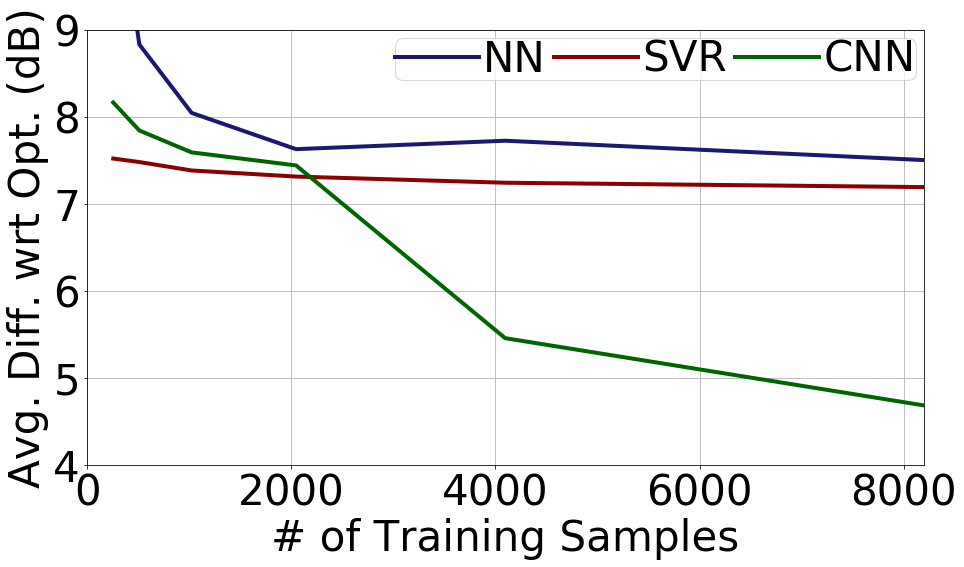

In [142]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max4SUs_1000grid_log_noisy_std1_202004_0421_50.dat", 
# "dynamic_pus_max_power_100000_min10_max20PUs_min1_max4SUs_1000grid_1cell_log_noisy_std1_202004_0421_50.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_sus_num = 4
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.908, 8.833, 8.046, 7.629, 7.726, 7.504])          
fp.append([2.03, 2.923, 3.272, 3.405, 3.215, 3.303])
# best lambda:  [0.01, 0.1, 0.001, 0.001, 0.001, 0]

## SVR
average_diff.append([7.521, 7.481, 7.384, 7.314, 7.243, 7.193])
fp.append([4.623, 4.406, 4.425, 4.357, 4.404, 4.448]) 



## CNN
average_diff.append([8.166, 7.844, 7.592, 7.442, 5.456, 4.684])
fp.append([4.56, 4.42, 4.37, 4.259, 2.751, 2.624]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 11, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 9])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1_4SUs_1000m_alpha3_noise1_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

# Fig 11 (a)

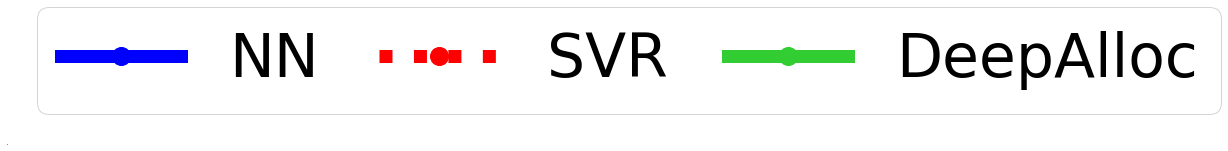

In [177]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_min1_max10SUs_square1000grid_log_noisy_std1.0_2020_09_09_02_35.dat", 
# "dynamic_pus_max_power_50000_min10_max20PUs_min1_max10SUs_square1000grid_log_noisy_std1.0_2020_09_09_02_35.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie, cell_size = 1000, 1000, 6+2, 30, 1
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 10
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
data_rate = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.404, 9.78, 9.522, 9.094, 8.88, 8.842])
data_rate.append([6.3, 6.4, 6.5, 7, 7, 7])
fp.append([4.958, 5.145, 4.591, 4.439, 4.206, 4.037])
# best lambda:  [0, 0.01, 0.001, 0.001, 0.001, 1]

## SVR
average_diff.append([9.932, 9.559, 9.066, 8.904, 8.761, 8.659])
data_rate.append([6.4, 6.5, 6.5, 7, 7, 7])
fp.append([4.861, 4.73, 4.654, 4.684, 4.457, 4.345]) 



## CNN
average_diff.append([11.035, 10.245, 9.783, 8.5, 6.23, 5.1])
data_rate.append([5.8, 6.3, 6.5, 7, 7.75, 8])
fp.append([5.659, 4.073, 4.651, 5.072, 4.547, 2.54]) 
# best_lambda = [0.001, 0.01, 1, 0.001, 0]

# IP-BASED
average_diff.append([1.36] * len(training_samples))
fp.append([0.5] * len(training_samples))



fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.15, right=0.97, top=0.977, bottom=0.13)
fig.subplots_adjust(left=0.99, right=0.9901, top=0.9901, bottom=0.99)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
# plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 13, 1))
ax.set_ylim([4, 12])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.1, 1)
# plt.savefig('ML/results/new/Changing_10_20PUs_1_10SUs_1000m_alpha3_noise1_1000grid_1cell.png')


plt.legend([ 'NN', 'SVR', 'DeepAlloc'], bbox_to_anchor=box_to_anchor, ncol=3, loc='lower left',
          columnspacing=1)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig('ML/results/new/sus_legend.png', pad_inches=0, bbox_inches="tight")


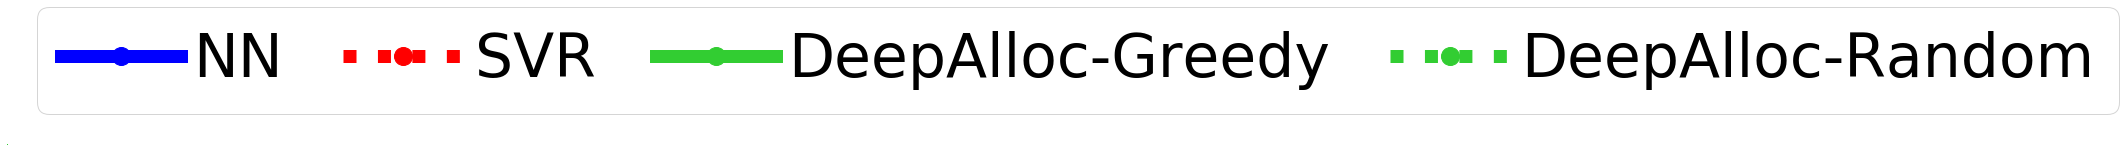

In [207]:
### MAX_POWER ANAlysis
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_min1_max10SUs_square1000grid_log_noisy_std1.0_2020_09_09_02_35.dat", 
# "dynamic_pus_max_power_50000_min10_max20PUs_min1_max10SUs_square1000grid_log_noisy_std1.0_2020_09_09_02_35.dat"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie, cell_size = 1000, 1000, 6+2, 30, 1
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# max_pus_num, intensity_degradation, slope = 20, 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 10
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
data_rate = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.404, 9.78, 9.522, 9.094, 8.88, 8.842])
data_rate.append([6.8, 6.9, 7.05, 7.23, 7.28, 7.28])
fp.append([4.958, 5.145, 4.591, 4.439, 4.206, 4.037])
# best lambda:  [0, 0.01, 0.001, 0.001, 0.001, 1]

## SVR
average_diff.append([9.932, 9.559, 9.066, 8.904, 8.761, 8.659])
data_rate.append([7.04, 7.12, 7.22, 7.27, 7.30, 7.30])
fp.append([4.861, 4.73, 4.654, 4.684, 4.457, 4.345]) 



## CNN
average_diff.append([11.035, 10.245, 9.783, 8.5, 6.23, 5.1])
data_rate.append([6.3, 6.99, 7.09, 7.35, 7.9, 8.12])
data_rate.append([5.22, 6.05, 5.95, 6.64, 7.48, 7.61 ])
fp.append([5.659, 4.073, 4.651, 5.072, 4.547, 2.54]) 
# best_lambda = [0.001, 0.01, 1, 0.001, 0]

# IP-BASED
average_diff.append([1.36] * len(training_samples))
fp.append([0.5] * len(training_samples))



fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.13, right=0.97, top=0.977, bottom=0.14)
fig.subplots_adjust(left=0.99, right=0.9901, top=0.9901, bottom=0.99)

plt.plot(training_samples, data_rate[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, data_rate[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, data_rate[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, data_rate[3], color=COLOR['CNN'], marker=MARKER['CSSA'], linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Data Rate (Mbps)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 13, 1))
ax.set_ylim([5, 9])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.055, 1)
# plt.savefig('ML/results/new/Changing_10_20PUs_1_10SUs_1000m_alpha3_noise1_1000grid_1cell_data_rate.png')



plt.legend([ 'NN', 'SVR', 'DeepAlloc-Greedy', 'DeepAlloc-Random'],
           bbox_to_anchor=box_to_anchor, ncol=4, loc='lower left',
          columnspacing=1, handletextpad=0.2)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig('ML/results/new/sus_datarate_legend.png', pad_inches=0, bbox_inches="tight")

# Fig 7 (b)

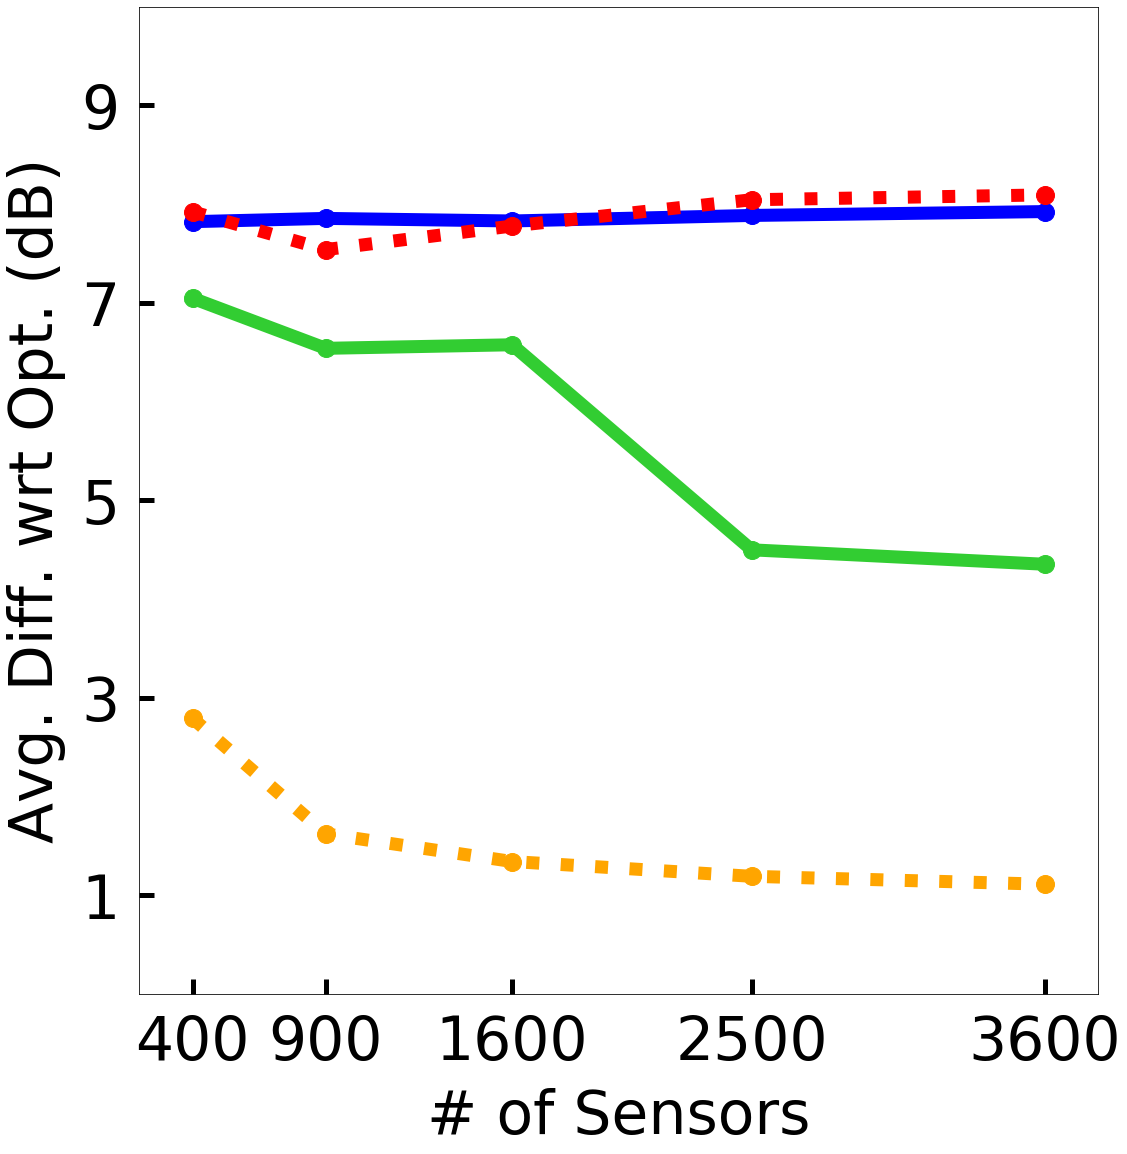

In [148]:
### MAX_POWER ANAlysis, Effect of sensor density, Training Set is 8K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "",
# "",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_900sensors_1000grid_1cell_log_noisy_std1_202004_0812_44.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0812_44.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_1600sensors_1000grid_1cell_log_noisy_std1_202004_0921_27.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_0921_27.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_2500sensors_1000grid_1cell_log_noisy_std1_202004_1114_51.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_1114_51.txt",
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_3600sensors_1000grid_1cell_log_noisy_std1_202004_1304_36.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_1304_36.txt"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 3  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = [400, 900, 1600, 2500, 3600]


# sensors = True
average_diff = []
fp = []
sensor_numbers = [400, 900, 1600, 2500, 3600] 
training_samples = sensor_numbers

## NN    
average_diff.append([7.821, 7.854, 7.828, 7.884, 7.923])
fp.append([3.652, 3.403, 3.742, 3.592, 3.621])
# best_lambda = [1, 1, 1]

## SVR
average_diff.append([7.921, 7.538, 7.777, 8.043, 8.092])
fp.append([4.231, 4.099, 4.184, 4.36, 4.41]) 

## CNN
average_diff.append([7.045, 6.538, 6.574, 4.497, 4.351])
fp.append([3.831, 3.696, 4.082, 2.103, 1.843])

# CSSA - Shaifur
average_diff.append([ 2.79, 1.62, 1.34, 1.19, 1.11]) # 4.22 for 100
fp.append([0.67, 0.51, 0.53, 0.54, 0.57]) # 0.71 for 100

fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.982, top=0.997, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Sensors', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)

ax.set_yticks(np.arange(1, 10, 2))
ax.set_xticks([400, 900, 1600, 2500, 3600])
ax.tick_params(direction='in', length=15, width=5, pad=20)

ax.set_ylim([0, 10])
ax.set_xlim([200, 3800])
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_1000m_alpha3_noise1_1000grid_1cell_changing_number_sensors.png')

# Fig 7 (a)

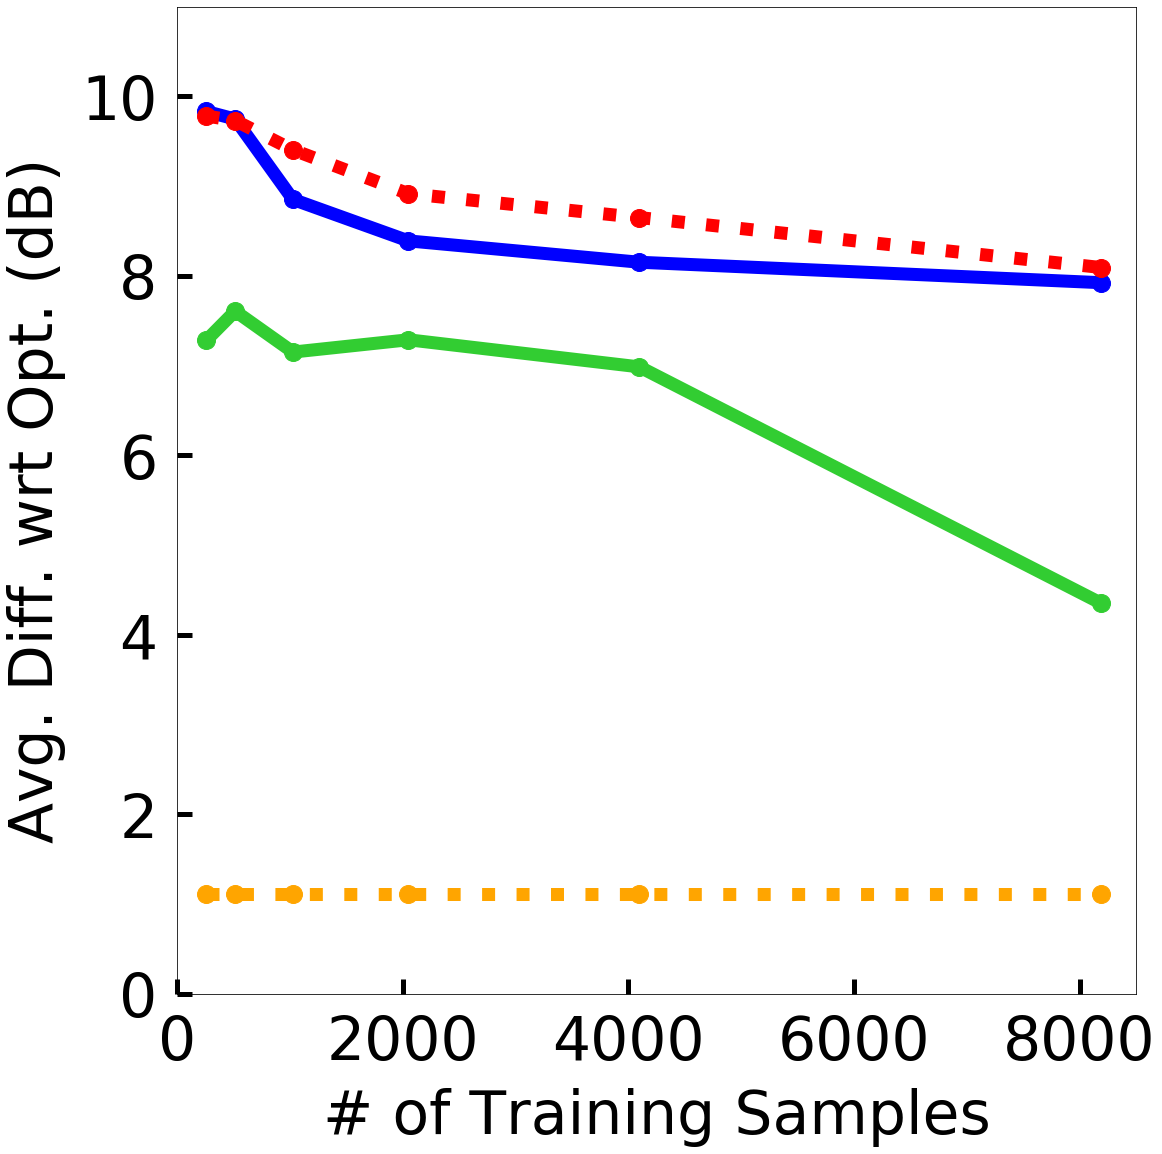

In [147]:
### MAX_POWER ANAlysis, Effect of training set using 3600 sensor
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_sensors_50000_min10_max20PUs_1SUs_3600sensors_1000grid_1cell_log_noisy_std1_202004_1304_36.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_1000grid_1cell_log_noisy_std1_202004_1304_36.txt"}
# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 3  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = [400, 900, 1600, 2500, 3600]


average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192]

## NN    
average_diff.append([9.831, 9.746, 8.851, 8.389, 8.151, 7.923])
fp.append([4.0, 4.562, 4.131, 4.083, 3.517, 3.946])

## SVR
average_diff.append([9.78, 9.729, 9.403, 8.915, 8.649, 8.092])
fp.append([2.881, 4.544, 4.449, 4.34, 4.395,  4.41]) 

## CNN
average_diff.append([7.281, 7.606, 7.15, 7.287, 6.985, 4.351])
fp.append([3.36, 5.904, 3.741, 3.673, 3.78, 1.843])

#CSSA - Shaifur 3600 sensors
average_diff.append([1.11] * len(average_diff[0]))
fp.append([0.57] * len(average_diff[0]))

fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.982, top=0.997, bottom=0.14)
# fig.subplots_adjust(left=0.99, right=0.9901, top=0.9901, bottom=0.99)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)

ax.set_yticks(np.arange(0, 12, 2))
ax.set_ylim([0, 11])
ax.set_xlim([0, 8500])
box_to_anchor = (0, 1)

plt.savefig('ML/results/new/Changing_10_20PUs_1000m_alpha3_noise1_1000grid_1cell_using_sensors.png')

# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# plt.legend([ 'NN', 'SVR', 'DeepAlloc', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=4, loc='lower left')
# plt.savefig('ML/results/new/legends.png', bbox_inches='tight', pad_inches=0)

# Fig 10 (c)

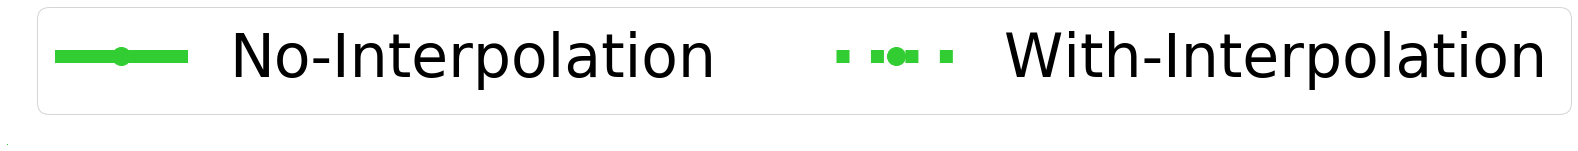

In [167]:
### MAX_POWER ANAlysis, Effect of sensor interpolation, Training Set is 40K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
# "dynamic_pus_2500InterpolatedSensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt"
#}

# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3600


# sensors = True
average_diff = []
fp = []
interpolation_ratio = [0, 10, 20, 30, 40, 50]
training_samples = [(1- x) * 8192 for x in [0.5, 0.4, 0.3, 0.2, 0.1, 0]] 
interpolation_samples = [8192 - training_sample for training_sample in training_samples]
training_samples = [256, 512, 1024, 2048, 4096, 4915, 5734, 6553, 7372, 8192]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 



## CNN
# average_diff.append([4.351, 4.468, 4.68, 4.905, 5.671, 6.534])
average_diff.append([7.423, 7.214, 7.02, 7.04, 6.534,
                     5.571, 4.705, 4.48,  4.268, 4.151])
# average_diff[2] = average_diff[2][::-1]
fp.append([2.219, 3.056, 1.86, 2.549, 3.414, 3.873])
# best_lambda = [0.1, 0.1, 0.1, 0.1, 0.001]
# without interpolation lambda = 0.1
no_interpolation = [4096, 4915, 5734, 6553, 7372, 8192]
average_diff_nointerpolation = [7.606, 7.281, 7.15, 7.287,7.142, 7.114, 6.985, 
                                 5.353, 5.064, 4.351]
fp_no_interpolation = [3.78, 2.964, 4.622, 3.586, 1.902, 2.219]


fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.12, right=0.975, top=0.98, bottom=0.14)
fig.subplots_adjust(left=0.99, right=0.9901, top=0.9901, bottom=0.99)


plt.plot(training_samples, average_diff_nointerpolation, color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 9, 1))
ax.set_ylim([4, 8])
ax.set_xlim([0, 8400])
box_to_anchor = (0, 1)
# plt.savefig('ML/results/new/Changing_PUs_1000m_alpha3_interpolation_effect.png')

plt.legend(['No-Interpolation', 'With-Interpolation'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig('ML/results/new/interpolation_legends.png', pad_inches=0, bbox_inches="tight")

# Fig 10 (a)

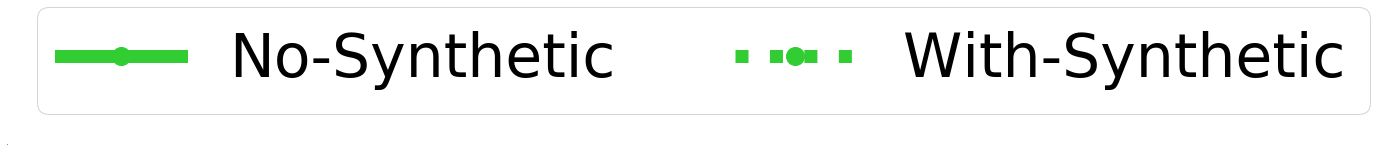

In [159]:
### MAX_POWER ANAlysis, Effect of synthetic data, Training Set is 40K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt",
# "dynamic_pus_synthetic_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt"
#}

# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096]

# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False


# sensors = True
average_diff = []
fp = []
# interpolation_ratio = [0, 10, 20, 30, 40, 50]
training_samples = [256, 512, 1024, 2048, 4096, 8192]
# interpolation_samples = [8192 - training_sample for training_sample in training_samples]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 



## CNN
average_diff.append([7.485, 7.294, 7.242,4.807, 4.164, 2.883]) # for alpha 3
fp.append([2.938, 4.496, 4.267, 2.333, 2.16, 1.478]) 
# average_diff.append([8.91, 10.879, 8.682, 8.706, 4.925]) # for alpha 3.5
# fp.append([6.16, 6.349, 4.269, 4.215, 3.144])
# best_lambda = [0.1, 0.01, 0.1, 0.1, 0.1]
# with synthetic samples
average_diff.append([7.351, 7.251, 5.752, 4.334, 3.338, 2.57])
fp.append([2.831, 4.345, 3.687, 2.223, 1.87, 1.345])


fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.12, right=0.977, top=0.98, bottom=0.14)
fig.subplots_adjust(left=0.99, right=0.9901, top=0.9901, bottom=0.99)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(2, 9, 1))
ax.set_ylim([2, 8])
ax.set_xlim([0, 8400])
box_to_anchor = (0, 1)
# plt.savefig('ML/results/new/Changing_PUs_1000m_alpha3_synthetic_effect.png')

plt.legend([ 'No-Synthetic', 'With-Synthetic'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.savefig('ML/results/new/synthetic_legends.png', pad_inches=0, bbox_inches='tight')

# Fig 8 (a)

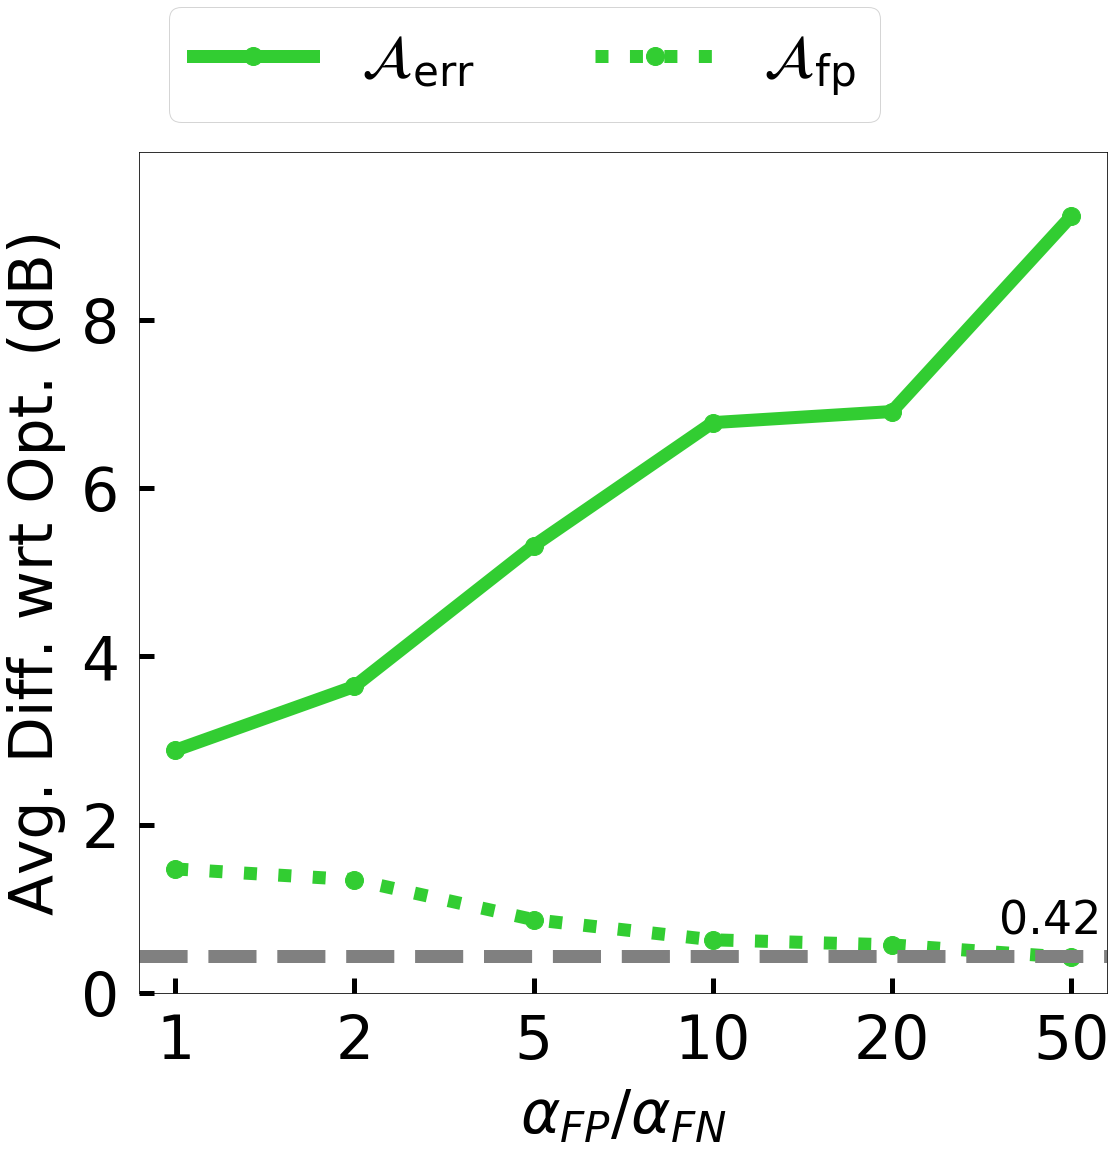

In [24]:
# Log-Distance asymmetric function
### MAX_POWER ANAlysis, Effect of penalize of PUs, 8k samples
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
#"dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt"}
number_samples = [8192] 
# number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False

average_diff = []
fp = []
training_samples = [1, 2, 3, 4, 5, 6]  # equals [1, 2, 5, 10, 20, 50]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])         
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([2.883, 3.643, 5.315, 6.78, 6.912, 9.234])
fp.append([1.473, 1.345, 0.87, 0.63, 0.57, 0.42]) 


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.13, right=0.97, top=0.87, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, fp[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel(r"$\alpha_{FP}/\alpha_{FN}$", labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(0, 10, 2))
ax.set_xticks(training_samples)
ax.set_xticklabels(['1', '2', '5', '10', '20', '50'])
ax.set_ylim([0, 10])
ax.set_xlim([0.8, 6.2])
box_to_anchor = (0, 1)
plt.axhline(y=0.44, linestyle='dashed',  color='grey')
ax.text(5.6, 0.7, '0.42', fontsize=46)

plt.legend([r"$\mathrm{\mathcal{A}_{err}}$", r"$\mathrm{\mathcal{A}_{fp}}$"], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_1000m_alpha3_1cell_assymetric.png')


In [ ]:
# Log-Distance asymmetric function
### MAX_POWER ANAlysis, Effect of penalize of PUs, 8k samples
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
#"dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt"}
# number_samples = [8192] 
# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30  # su_size:30 for 1000, 10 for 100
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
    sensors_num = 3600

average_diff = []
fp = []
training_samples = [1, 2, 3, 4]  # equals [1, 2, 5, 10]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])         
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([4.353, 4.819, 8.619, 9.2])
fp.append([1.843, 1.621, 1.1, 0.9]) 




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[0], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('FP/FN Ratio', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(0, 8, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)
ax.set_xticks(training_samples)
ax.set_xticklabels(['1', '2', '5', '10'])

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 8.5])
ax.set_xlim([0.8, 4.2])
plt.legend([ 'Error', 'FP Error'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1000m_alpha3_1cell_assymetric_sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

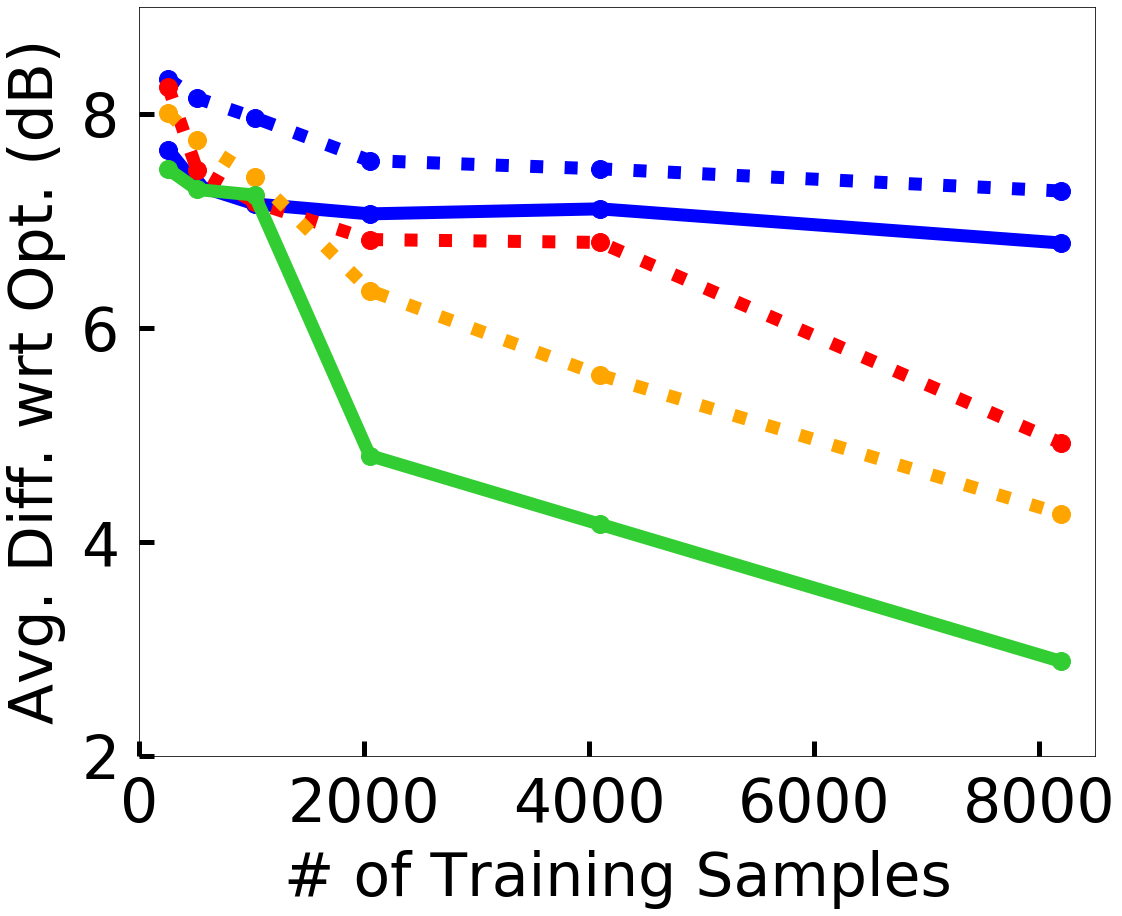

In [68]:
#LogDistance - Comparing different preprocessing
### MAX_POWER ANAlysis, Effect of data set size, 
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
#"dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_07_03_15_42.txt",}
# 

# number_samples = [128, 256, 512, 1024, 2048, 4096, 8192] 
# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 3, 50  # su_size:30 for 1000, 10 for 100
# cell_size = 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
number_samples = [256, 512, 1024, 2048, 4096, 8192] 
training_samples = number_samples


# no sheets - colorful images
average_diff.append([7.664, 7.332, 7.159, 7.066, 7.113, 6.794]) # 8.004, for 128.
# [8.449, 8.268, 7.964, 7.617, 7.482, 7.29]
# [7.749, 7.068, 7.064, 7.017, 6.982, 6.29]
# [8.158, 7.664, 7.332, 7.159, 7.066, 7.113, 6.794]
# grey, different shapes
average_diff.append([8.327, 8.148, 7.965, 7.564, 7.487, 7.28])


fp.append([8.004, 7.549, 7.068, 6.964, 6.817, 6.482, 5.89])

# 2 sheets (15dBm interval) + 1 su
average_diff.append([ 8.256, 7.479, 7.175, 6.826, 6.799, 4.924]) # 7.785, for 128. [8.156, 7.079, 7.075, 7.026, 7.399, 5.324]
fp.append([1.839, 1.862, 3.458, 3.01, 3.486, 2.291, 2.807])

# 3 sheets (10dBm interval) + 1 su sheet
average_diff.append([8.007, 7.753, 7.413, 6.349, 5.559, 4.264]) # 7.868, for 128
fp.append([1.765, 1.736, 1.742, 2.585, 3.804, 3.679, 3.107])

# 6 sheets (5dBm interval) + 1 su sheet
average_diff.append([7.485, 7.294, 7.242,4.807, 4.164, 2.883])
fp.append([2.938, 4.496, 4.267, 2.333, 2.16, 1.478]) 




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.98, top=0.8, bottom=0.15)


plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['CSSA'])
plt.plot(training_samples, average_diff[2], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'],  marker=MARKER['CSSA'],  linestyle=LINE['CSSA'])
plt.plot(training_samples, average_diff[4], color=COLOR['CNN'], marker=MARKER['CNN'], linestyle=LINE['CNN'])


plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)




# matplotlib.rcParams.update({'font.size': 22})

ax.set_yticks(np.arange(0, 12, 2))
ax.set_ylim([2, 9])
ax.set_xlim([0, 8500])
box_to_anchor = (0, 1)
# plt.legend([ 'Colored','Shapes', '3', '4', '6'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')

plt.savefig('ML/results/new/Changing_10_20PUs_log_100grid_1cell_changing_number_sheets.png', 
            bbox_inches = 'tight', pad_inches = 0)



**SPLAT Result**

In [ ]:
# SPLAT
### MAX_POWER ANAlysis, Effect of training set
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_46.txt",
#"dynamic_pus_max_power_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_46.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.339, 7.052, 6.728, 6.714, 6.406, 6.349])          
fp.append([3.105, 2.762, 3.661, 3.839, 3.09, 3.136])

## SVR
average_diff.append([6.999, 6.911, 6.887, 6.805, 6.709, 6.577])
fp.append([3.745, 3.459, 3.458, 3.349, 3.438, 3.401]) 



## CNN
average_diff.append([7.805, 7.753, 7.394, 6.311, 4.764, 4.209])
fp.append([1.446, 1.959, 1.588, 2.387, 2.03, 2.453]) 
#best_lambda = [0.01, 0.001, 0, 0.001, 0.01, 0]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 8.5])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_15PUs_splat_100grid_10cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

# Fig 6 (c)

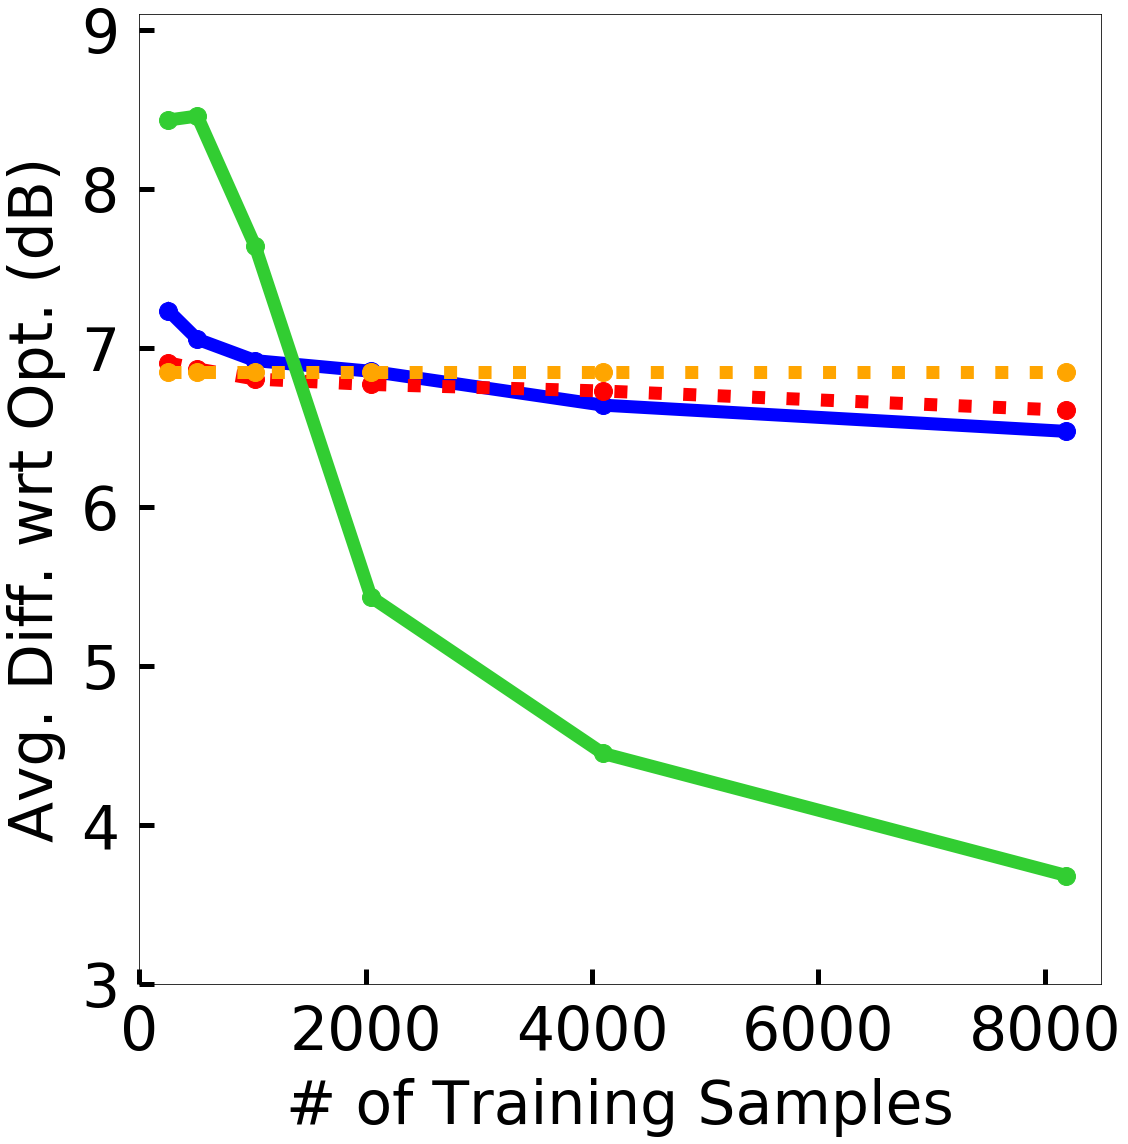

In [130]:
# SPLAT
### MAX_POWER ANAlysis, Effect of changing number of PUs
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096] 

## NN    
average_diff.append([7.234, 7.054, 6.919, 6.852, 6.639]) #sample_8k: 6.474])          
fp.append([3.427, 3.319, 3.336, 3.254, 3.096]) #sample_8k: 3.184])

## SVR
average_diff.append([6.905, 6.867, 6.803, 6.769, 6.728]) # sample_8k: 6.607])
fp.append([3.3, 3.223, 3.399, 3.284, 3.185]) # sample_8k:, 3.195]) 

## CNN
# shallow model
# average_diff.append([8.432, 8.457, 7.638, 5.432, 4.449, 3.681])
# fp.append([1.326, 1.331, 2.526, 2.467, 2.898, 2.232]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]
# deep model
average_diff.append([4.442, 3.549, 3.337, 3.186, 3.027, 2.909])
fp.append([1.664, 1.523, 1.812, 1.813, 1.51, 1.504])
# best_lambda [1, 0.01, 0.01, 0.1, 1, 1]


# CSSA - Shaifur using 1600 sss
average_diff.append([6.85] * len(average_diff[0]))
fp.append([2.04] * len(average_diff[0]))


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.985, top=0.992, bottom=0.15)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])


plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)

ax.set_yticks(np.arange(3, 9.1, 1))
ax.set_ylim([3, 9.1])
ax.set_xlim([0, 8500])

box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_10cell.png')

# Fig 9 (b)

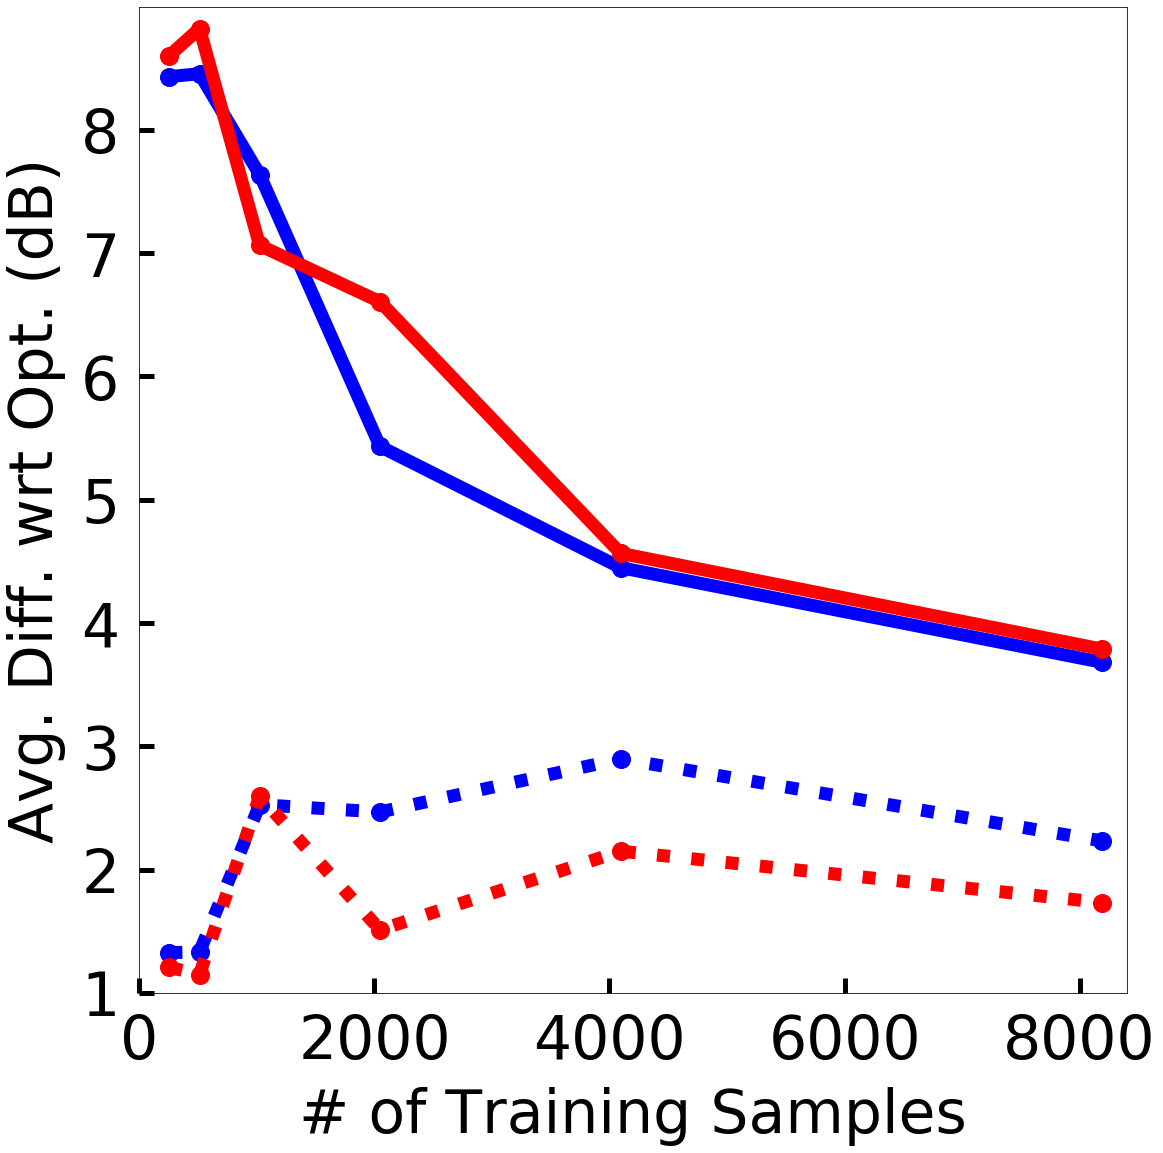

In [134]:
# SPLAT, Conservative(subtracting training lable from a value)
### MAX_POWER ANAlysis, Effect of changing number of PUs
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])          
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([8.432, 8.457, 7.638, 5.432, 4.449, 3.681])
fp.append([1.326, 1.331, 2.526, 2.467, 2.898, 2.232]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]

#conservative
average_diff.append([8.604, 8.823, 7.063, 6.606, 4.565, 3.788])
fp.append([1.207, 1.148, 2.596, 1.511, 2.149, 1.732])
#best_lambda = [0, 1, 0.1, 0]



fig, ax = plt.subplots(figsize=(16, 16))
# fig.subplots_adjust(left=0.12, right=0.95, top=0.8, bottom=0.14)
fig.subplots_adjust(left=0.12, right=0.977, top=0.996, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, fp[2], color=COLOR['NN'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[3], color=COLOR['SVR'],  marker=MARKER['NN'],  linestyle=LINE['NN'])
plt.plot(training_samples, fp[3], color=COLOR['SVR'], marker=MARKER['SVR'], linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(1, 9, 1))
ax.set_ylim([1, 9])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.17, 1)
# plt.legend([r"Basic $\mathrm{\mathcal{A}_{err}}$", r"Basic $\mathrm{\mathcal{A}_{fp}}$",
#             r"Cons. $\mathrm{\mathcal{A}_{err}}$", r"Cons. $\mathrm{\mathcal{A}_{fp}}$"], 
#            bbox_to_anchor=box_to_anchor,
#            ncol=2, loc='lower left', columnspacing=1.5)
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_10cell_conserve.png')

# Fig 6 (d)

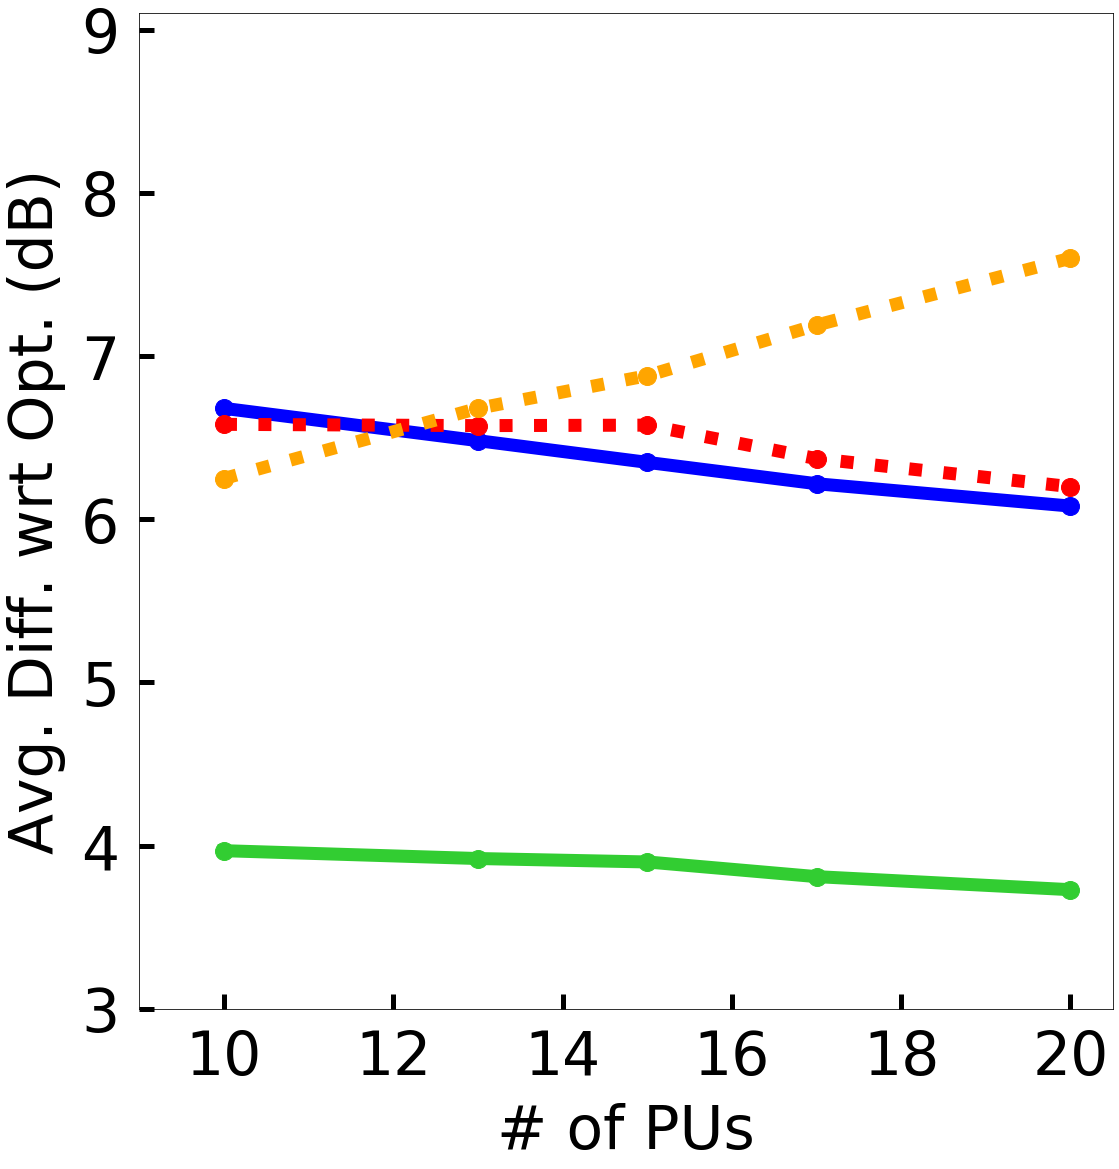

In [137]:
# SPLAT
### MAX_POWER ANAlysis, Effect of changing number of PUs, 8k training set
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
# "dynamic_pus_using_pus_60000_10PUs_1SUs_square100grid_splat_2020_07_07_04_51.txt",
# "dynamic_pus_max_power_60000_10PUs_1SUs_square100grid_splat_2020_07_07_04_51.txt",
# "dynamic_pus_using_pus_60000_13PUs_1SUs_square100grid_splat_2020_07_07_11_19.txt",
# "dynamic_pus_max_power_60000_13PUs_1SUs_square100grid_splat_2020_07_07_11_19.txt",
# "dynamic_pus_using_pus_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_41.txt",
# "dynamic_pus_max_power_60000_15PUs_1SUs_square100grid_splat_2020_06_17_21_41.txt",
# "dynamic_pus_using_pus_60000_17PUs_1SUs_square100grid_splat_2020_07_07_11_22.txt",
# "dynamic_pus_max_power_60000_17PUs_1SUs_square100grid_splat_2020_07_07_11_22.txt",
# "dynamic_pus_using_pus_60000_20PUs_1SUs_square100grid_splat_2020_07_07_11_24.txt",
# "dynamic_pus_max_power_60000_20PUs_1SUs_square100grid_splat_2020_07_07_11_24.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [10, 13, 15, 17, 20] 


## NN    
average_diff.append([6.68, 6.482, 6.349, 6.218, 6.081])          
fp.append([3.151, 3.117, 3.136, 3.137, 3.211])

## SVR
average_diff.append([6.582, 6.574, 6.577, 6.372, 6.2])
fp.append([3.575, 3.407, 3.401, 3.327, 3.189]) 

## CNN
# average_diff.append([3.969, 3.921, 4.15, 4.086, 4.092])
average_diff.append([3.969, 3.921, 3.90, 3.81, 3.73])
fp.append([2.414, 2.186, 2.453, 1.78, 2.341]) 
#best_lambda = [0.001, 0.1, 0.1, 0, 1, ]

# CSSA - SHAIFUR using 1600 sensors
average_diff.append([6.25, 6.68, 6.88, 7.19, 7.60])
fp.append([2.03, 2.08, 2.07, 2.08, 1.98])

fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.995, top=0.994, bottom=0.13)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of PUs', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.set_yticks(np.arange(4, 9, 1))
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_xticks(np.arange(10, 21, 2))
ax.set_yticks(np.arange(3, 9.1, 1))
ax.set_ylim([3, 9.1])
ax.set_xlim([9, 20.5])
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_number_splat_100grid_10cell.png')

# Fig 7 (d)

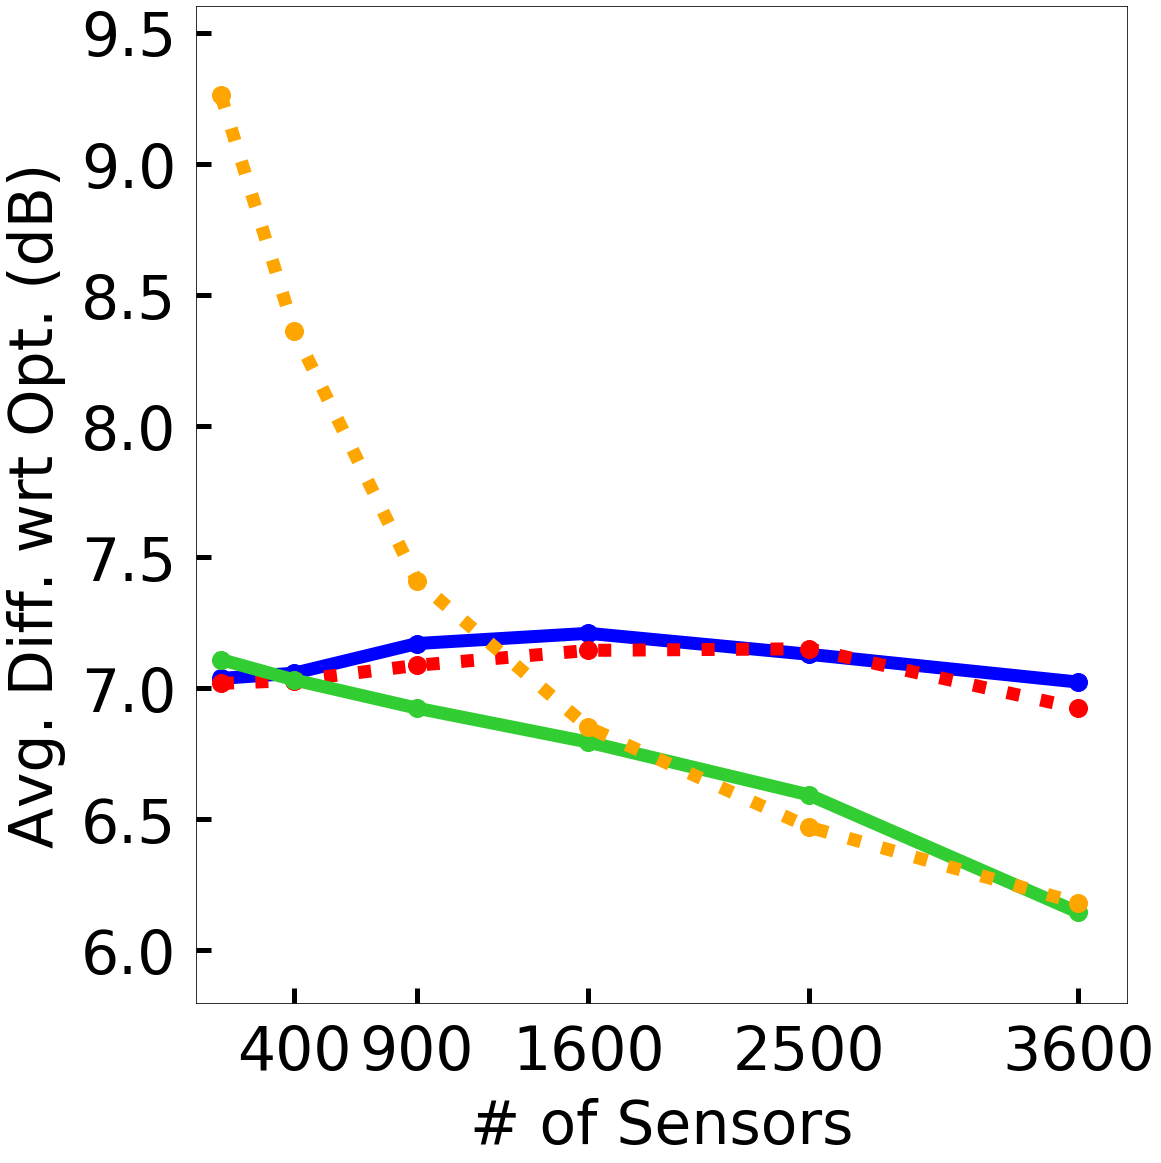

In [143]:
#Splat
### MAX_POWER ANAlysis, Effect of sensor density, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
#"dynamic_pus_100sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt", 
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt",
#"dynamic_pus_225sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_400sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_625sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_900sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt"}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 100
#     sensors_file_path = "../../../java_workspace/research/commons/resources/sensors/square" \
#     + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors.txt"


# sensors = True
average_diff = []
fp = []
sensor_numbers = [100, 400, 900, 1600, 2500, 3600] 
training_samples = sensor_numbers

## NN    
average_diff.append([7.037, 7.057, 7.17, 7.209, 7.129, 7.023])          
fp.append([3.577, 3.526, 3.482, 3.438, 3.36, 3.31])
# best_lambda = [1, 1, 1, 0.1, 0]

## SVR
average_diff.append([7.018, 7.029, 7.087, 7.144, 7.15, 6.923])
fp.append([3.422, 3.266, 3.472, 3.536, 3.538, 3.441])

## CNN
# average_diff.append([7.109, 7.054, 7.031, 7.034, 6.816, 6.794, 6.593, 6.145]) real
average_diff.append([7.109, 7.031, 6.9236, 6.794, 6.593, 6.145])
fp.append([3.635, 3.02, 1.905, 3.112, 3.663]) # 3.145, 3.759, 3.594
#best_lambda = [1, 0, 0, 1, 0.1, 0.1, 0.1]

# CSSA - Shaifur
average_diff.append([9.26, 8.36, 7.41, 6.85, 6.47, 6.18])
fp.append([0.73, 1.65, 1.92, 2.04, 2.04, 2.07])


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.17, right=0.978, top=0.995, bottom=0.13)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Sensors', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)

ax.set_xticks([400, 900, 1600, 2500, 3600])
ax.set_yticks(np.arange(5, 9.6, 0.5))
ax.set_ylim([5.8, 9.6])
ax.set_xlim([0, 3800])
ax.tick_params(direction='in', length=15, width=5, pad=20)
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_1cell_changing_number_sensors.png')

# Fig 7 (c)

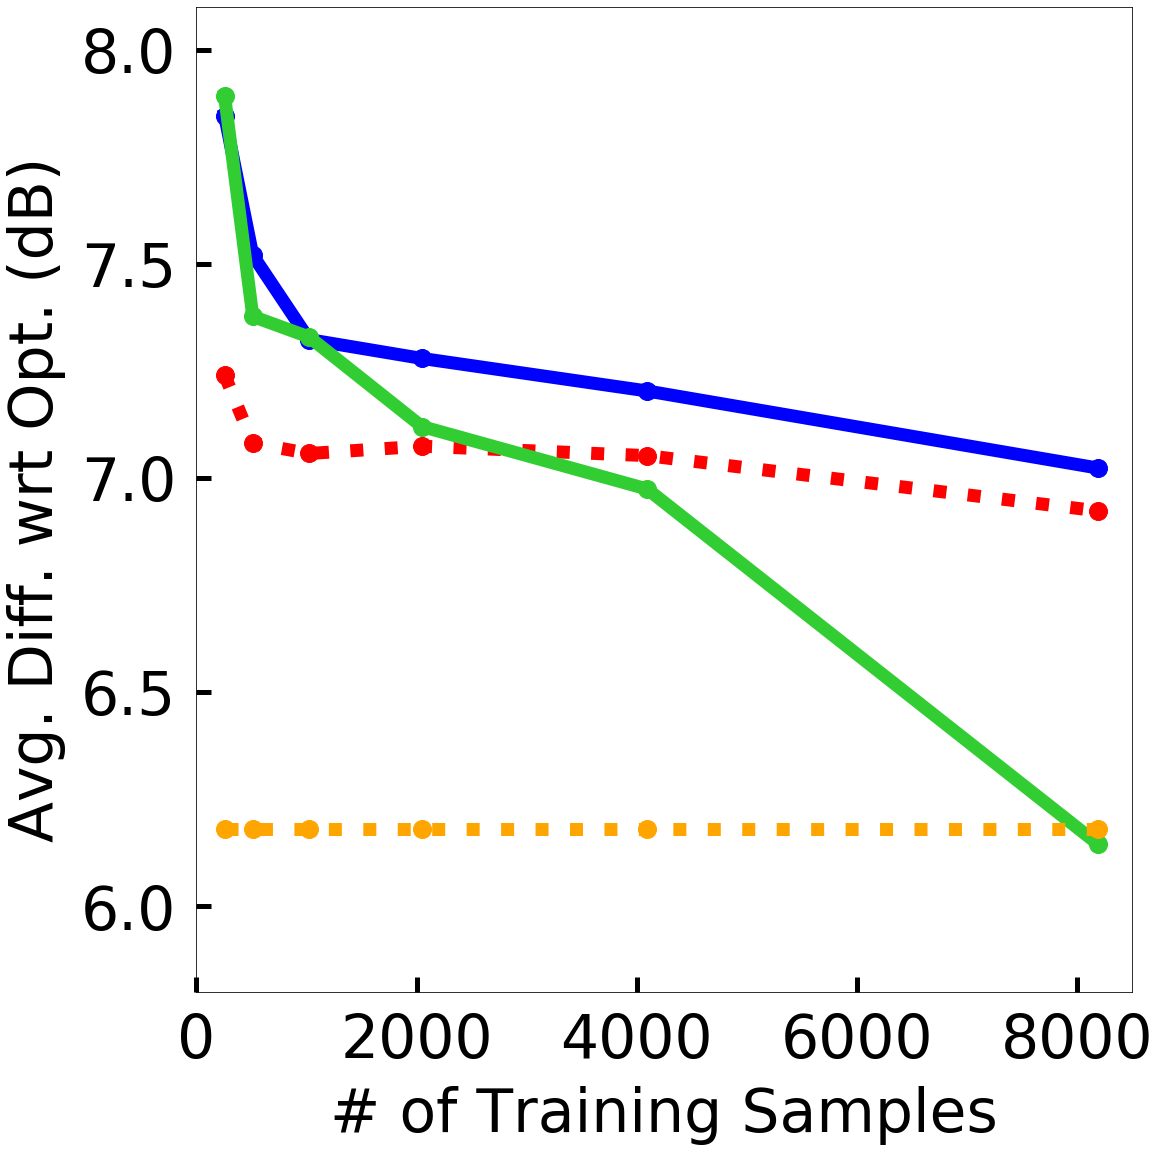

In [141]:
#Splat
### MAX_POWER ANAlysis, Effect of training size using sensors, 
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_400sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
# "dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
# "dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_29_19_50.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_29_19_50.txt"}
# 
# comparing CNN and previous machine learning algos using sensor readings.

training_samples = [256, 512, 1024, 2048, 4096, 8192]
# print(len(number_samples))

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
fp = []

## NN    
# average_diff.append([9.505, 7.513, 7.394, 7.294, 7.216, 7.155])    # 400 sensors       
# fp.append([2.918, 3.331, 2.959, 3.68, 3.378, 3.516]) # 400 sensors 
# [0.1, 0, 0.01, 0, 1, 1] # 400 sensors
average_diff.append([7.846, 7.52, 7.323, 7.279, 7.203, 7.023]) # 3600 sensors
fp.append([3.949, 3.804, 3.724, 3.19, 3.397, 3.31]) # 3600 sensors
# 

## SVR
# average_diff.append([9.145, 7.294, 7.1, 7.084, 7.096, 7.087]) # 400 sensors 
# fp.append([3.023, 3.267, 3.306, 3.406, 3.405, 3.472])  # 400 sensors 
average_diff.append([7.24, 7.081, 7.057, 7.074, 7.052, 6.923]) # 3600 sensors
fp.append([4.051, 3.443, 3.5, 3.467, 3.447, 3.441]) # 3600 sensors

## CNN
average_diff.append([7.891, 7.377, 7.329, 7.12, 6.974, 6.145]) # 3600 sensors
fp.append([4.127, 2.445, 3.097, 3.429, 3.756, 3.336]) # 3600 sensors

# CSSA - Shaifur 3600 SSs
average_diff.append([6.18] * len(average_diff[0]))
fp.append([2.07] * len(average_diff[0]))


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.17, right=0.982, top=0.995, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 10, 0.5))
ax.set_ylim([5.8, 8.1])
ax.set_xlim([0, 8500])
box_to_anchor = (0, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_1cell_3600sensors.png')

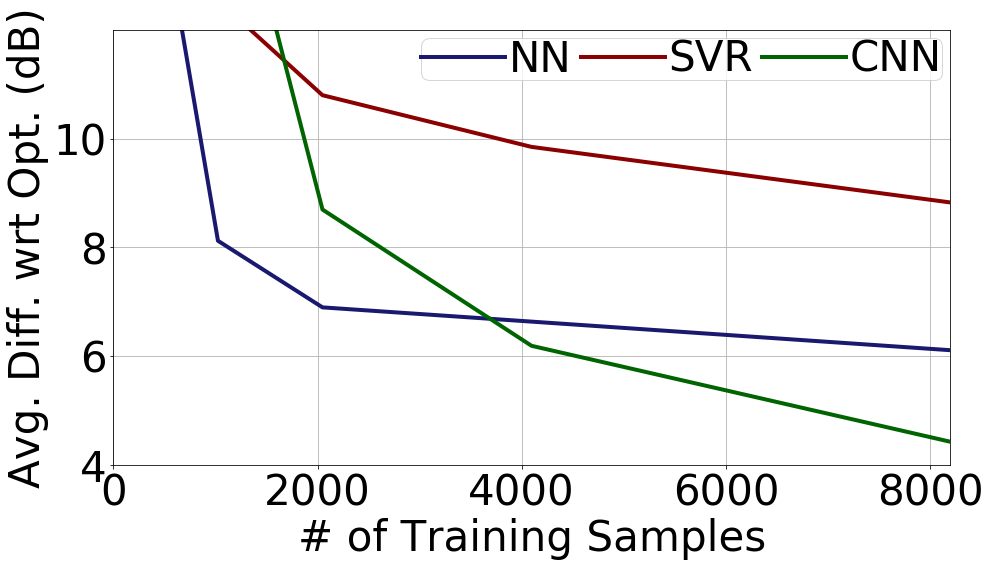

In [35]:
#Splat
### MAX_POWER ANAlysis, Effect of number of SUs changing, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max4SUs_square100grid_splat_2020_06_16_02_37.txt",
#""dynamic_pus_max_power_100000_min10_max20PUs_min1_max4SUs_square100grid_splat_2020_06_16_02_37.txt}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 4
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
fp = []
training_samples = number_samples


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([26.112, 13.751, 8.121, 6.896, 6.634, 6.109])          
fp.append([19.672, 3.619, 2.615, 3.705, 3.477, 2.944])

## SVR
# average_diff.append([27.796, 23.114, 16.885, 14.007, 12.563, 11.195])
average_diff.append([20.539, 15.835, 12.544, 10.799, 9.848, 8.828]) # <-90 replaced by -90
# fp.append([23.373, 18.602, 12.045, 9.345, 8.139, 6.96]) 
fp.append([16.119, 11.324, 8.078, 6.579, 5.92, 5.136]) # <-90 replaced by -90



## CNN
# average_diff.append([32.701, 31.267, 28.871, 10.356, 8.281, 7.002])
average_diff.append([25.396, 25.236, 16.172, 8.696, 6.189, 4.427]) # <-90 replaced by -90
# fp.append([28.188, 26.475, 28.037, 7.813, 5.243, 3.981])
fp.append([[20.71, 22.125, 14.17, 6.456, 3.672, 2.512]]) # <-90 replaced by -90
#best_lambda = [0.01, 0, 0.001, 0.001, 0.001, 0.001]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(100m*100m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 12, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([4, 12])
ax.set_xlim([0, 8200])
plt.legend([ 'NN', 'SVR', 'CNN'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_1_4SUs_1splat_1000grid_1cell.png', 
            bbox_inches = 'tight', pad_inches = 0)

# Fig 11 (b)

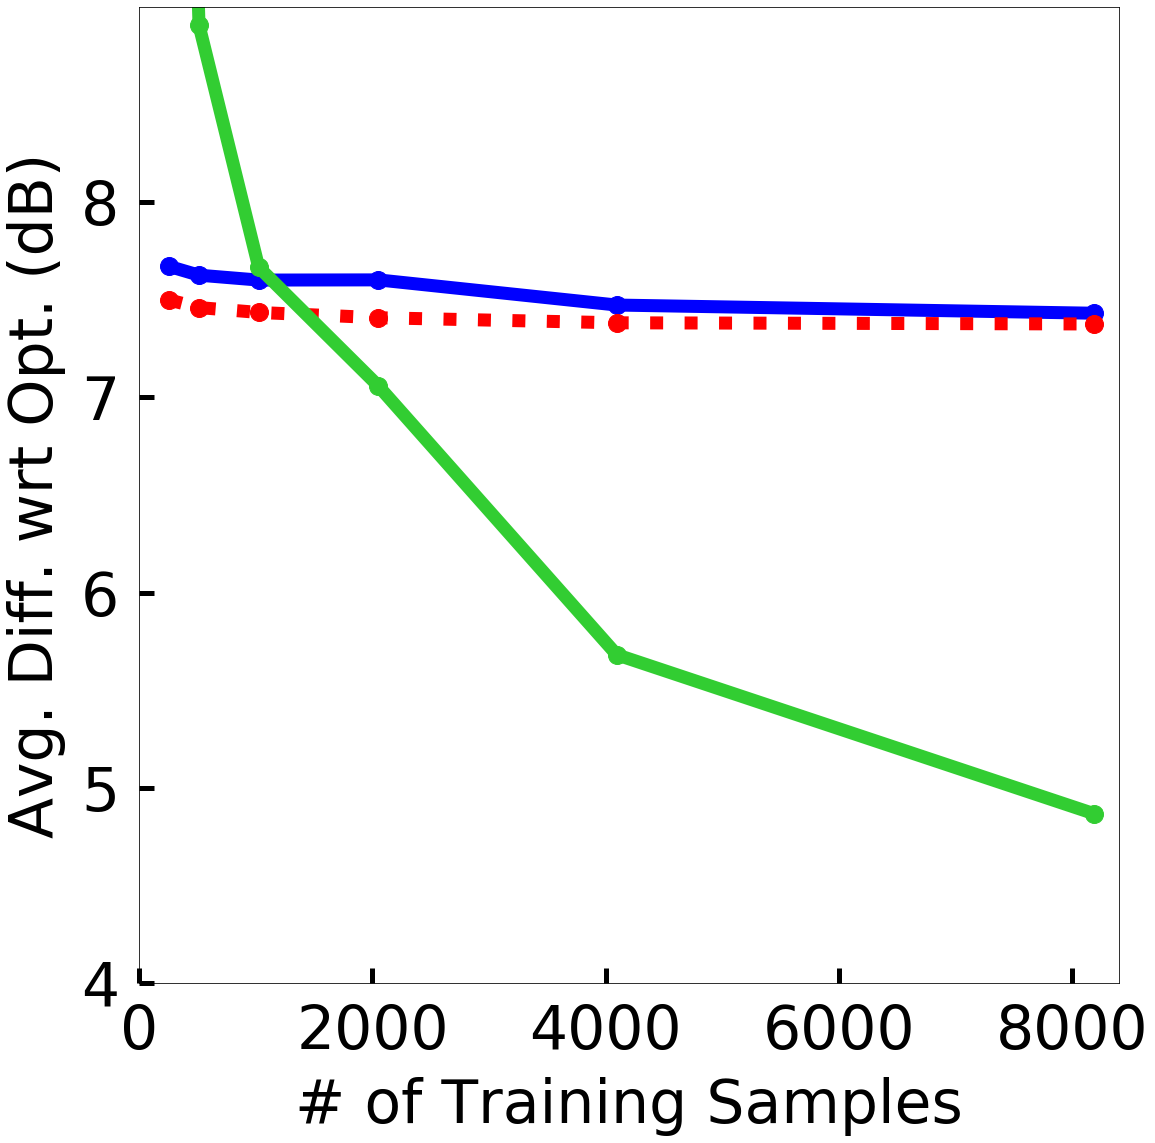

In [178]:
#Splat
### MAX_POWER ANAlysis, Effect of number of SUs changing, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max10SUs_square100grid_splat_2020_09_07_23_06.txt",
#""dynamic_pus_max_power_100000_min10_max20PUs_min1_max10SUs_square100grid_splat_2020_09_07_23_06.txt}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -100.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie, cell_size = 100, 100, 6+2, 10, 5
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 10
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
data_rate = []
fp = []
training_samples = number_samples


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.671, 7.626, 7.601, 7.602, 7.473, 7.431])  
data_rate.append([1.94, 1.96, 1.98, 1.98, 1.98, 1.98])
fp.append([4.009, 4.028, 4.026, 4.155, 3.921, 3.914])

## SVR
average_diff.append([7.499, 7.46, 7.435, 7.408, 7.382, 7.376])
data_rate.append([1.97, 1.96, 1.98, 1.98, 2.01, 2.01])
fp.append([3.627, 3.488, 3.346, 3.249, 3.235, 3.213])



## CNN
average_diff.append([14.052, 8.907, 7.667, 7.06, 5.681, 4.866])
data_rate.append([1.31, 1.82, 1.96, 2.04, 2.62, 2.91])
fp.append([13.794, 5.647, 3.4, 3.399, 3.144, 2.802])




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.97, top=0.977, bottom=0.13)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
# plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 9, 1))
ax.set_ylim([4, 9])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.07, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'CSSA'], bbox_to_anchor=box_to_anchor, ncol=3, loc='lower left',
#           columnspacing=1)
plt.savefig('ML/results/new/Changing_10_20PUs_1_10SUs_1splat_1000grid_1cell.png')

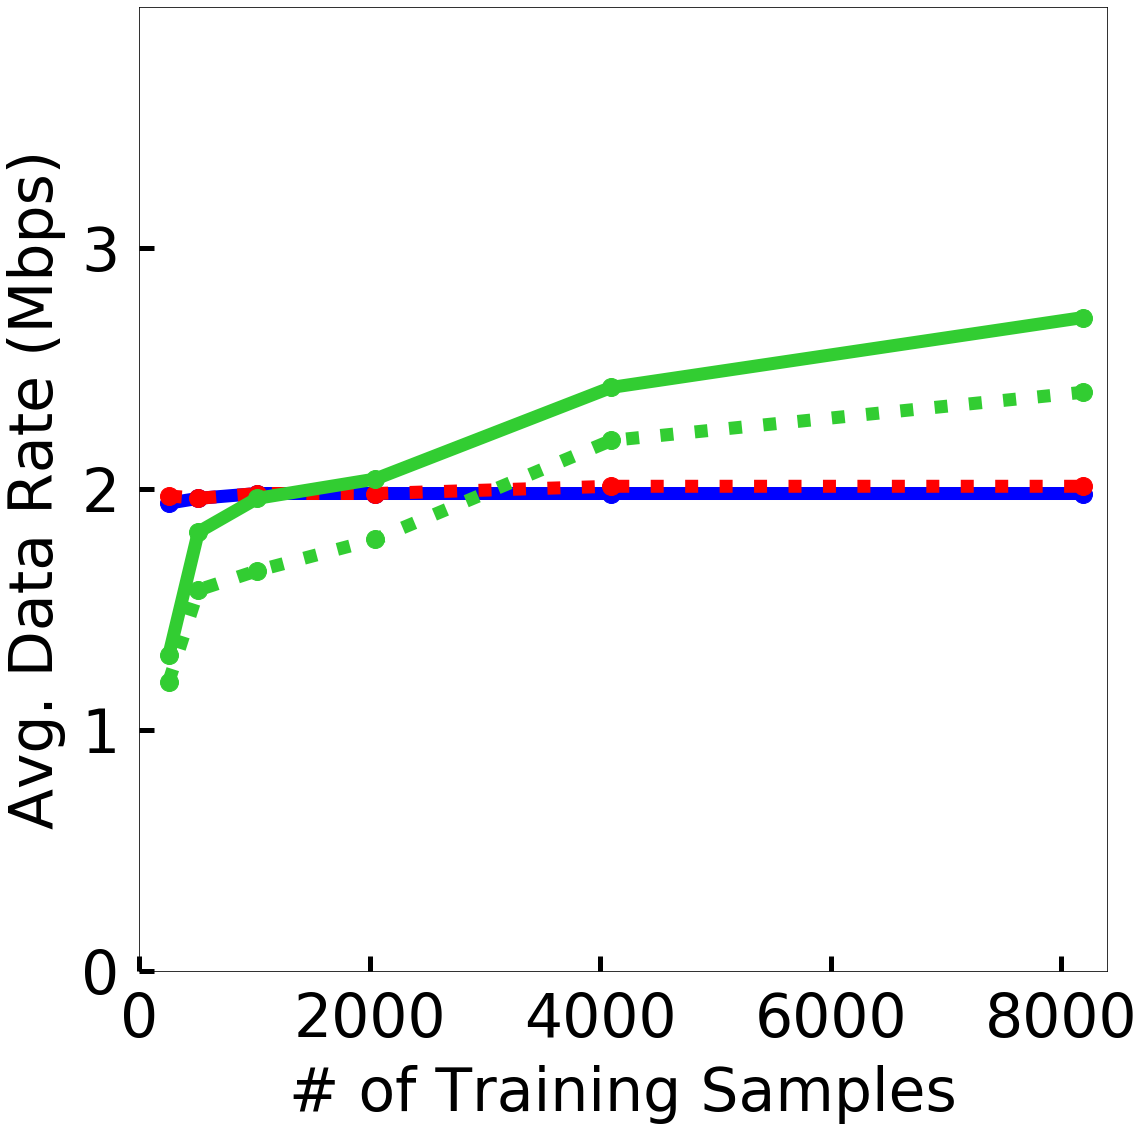

In [183]:
#Splat
### MAX_POWER ANAlysis, Effect of number of SUs changing, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_100000_min10_max20PUs_min1_max10SUs_square100grid_splat_2020_09_07_23_06.txt",
#""dynamic_pus_max_power_100000_min10_max20PUs_min1_max10SUs_square100grid_splat_2020_09_07_23_06.txt}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -100.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie, cell_size = 100, 100, 6+2, 10, 5
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 10
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# sensors = True
average_diff = []
data_rate = []
fp = []
training_samples = number_samples


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([7.671, 7.626, 7.601, 7.602, 7.473, 7.431])  
data_rate.append([1.94, 1.96, 1.98, 1.98, 1.98, 1.98])
fp.append([4.009, 4.028, 4.026, 4.155, 3.921, 3.914])

## SVR
average_diff.append([7.499, 7.46, 7.435, 7.408, 7.382, 7.376])
data_rate.append([1.97, 1.96, 1.98, 1.98, 2.01, 2.01])
fp.append([3.627, 3.488, 3.346, 3.249, 3.235, 3.213])



## CNN
average_diff.append([14.052, 8.907, 7.667, 7.06, 5.681, 4.866])
data_rate.append([1.31, 1.82, 1.96, 2.04, 2.42, 2.71])  # cnn-greedy
data_rate.append([1.20, 1.58, 1.66, 1.79, 2.2, 2.4])
fp.append([13.794, 5.647, 3.4, 3.399, 3.144, 2.802])




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.13, right=0.97, top=0.977, bottom=0.14)

plt.plot(training_samples, data_rate[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, data_rate[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, data_rate[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, data_rate[3], color=COLOR['CNN'], marker=MARKER['CSSA'], linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Data Rate (Mbps)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(0, 4, 1))
ax.set_ylim([0, 4])
ax.set_xlim([0, 8400])
box_to_anchor = (-0.03, 1)
# plt.legend([ 'NN', 'SVR', 'CNN-Greedy', 'CNN-Random'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left',
#           columnspacing=1)
plt.savefig('ML/results/new/Changing_10_20PUs_1_10SUs_1splat_1000grid_1cell_data_rate.png')

# Fig 10 (d)

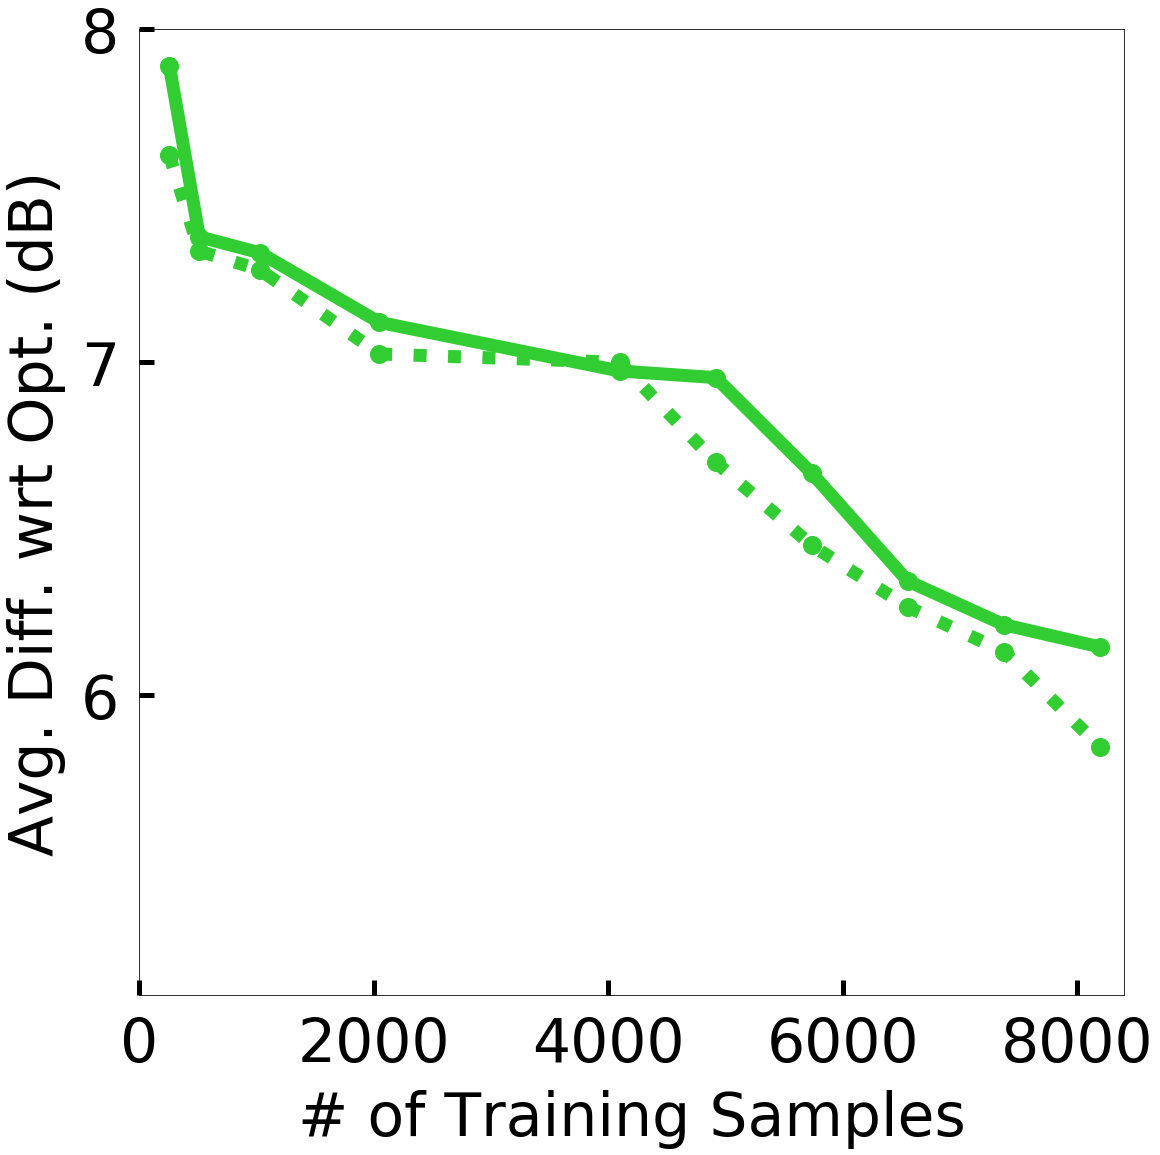

In [169]:
### MAX_POWER ANAlysis, Effect of sensor interpolation, Training Set is 40K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
#}

# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3600


# sensors = True
average_diff = []
fp = []
interpolation_ratio = [0, 10, 20, 30, 40, 50]
training_samples = [(1- x) * 8192 for x in [0.5, 0.4, 0.3, 0.2, 0.1, 0]] 
interpolation_samples = [8192 - training_sample for training_sample in training_samples]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 
training_samples = [256, 512, 1028, 2048] + training_samples


## CNN
# average_diff.append([6.145, 6.212, 6.343, 6.667, 6.954, 7.012])
average_diff.append([6.145, 6.212, 6.343, 6.667, 6.954, 6.974, 7.12, 7.329, 7.377, 7.891])
average_diff[2] = average_diff[2][::-1]
fp.append([3.269, 3.337, 3.489, 3.407, 3.538, 3.622])
# average_diff.append([7.891, 7.377, 7.329, 7.12, 6.974, 6.145]) # 3600 sensors
# fp.append([4.127, 2.445, 3.097, 3.429, 3.756, 3.336]) # 3600 sensors
# best_lambda = [0.1, 0.1, 0.1, 0.1, 0.001]
# without interpolation lambda = 0.1
no_interpolation = [4096, 4915, 5734, 6553, 7372, 8192]
# average_diff_nointerpolation = [7.325, 7.29, 7.104, 6.735, 6.431, 6.145]
average_diff_interpolation = [7.623, 7.334, 7.278, 7.025, 7.0, 6.7, 6.45, 6.265, 6.131, 5.845]
fp_interpolation = [3.78, 2.964, 4.622, 3.586, 1.902, 3.269]



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.975, top=0.978, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff_interpolation, color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 9, 1))
ax.set_ylim([5.1, 8])
ax.set_xlim([0, 8400])
box_to_anchor = (0, 1)
# plt.legend(['No-Interpolation', 'With-Interpolation'], bbox_to_anchor=box_to_anchor, ncol=1, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_100m_splat_interpolation_effect.png')


# Fig 10 (b)

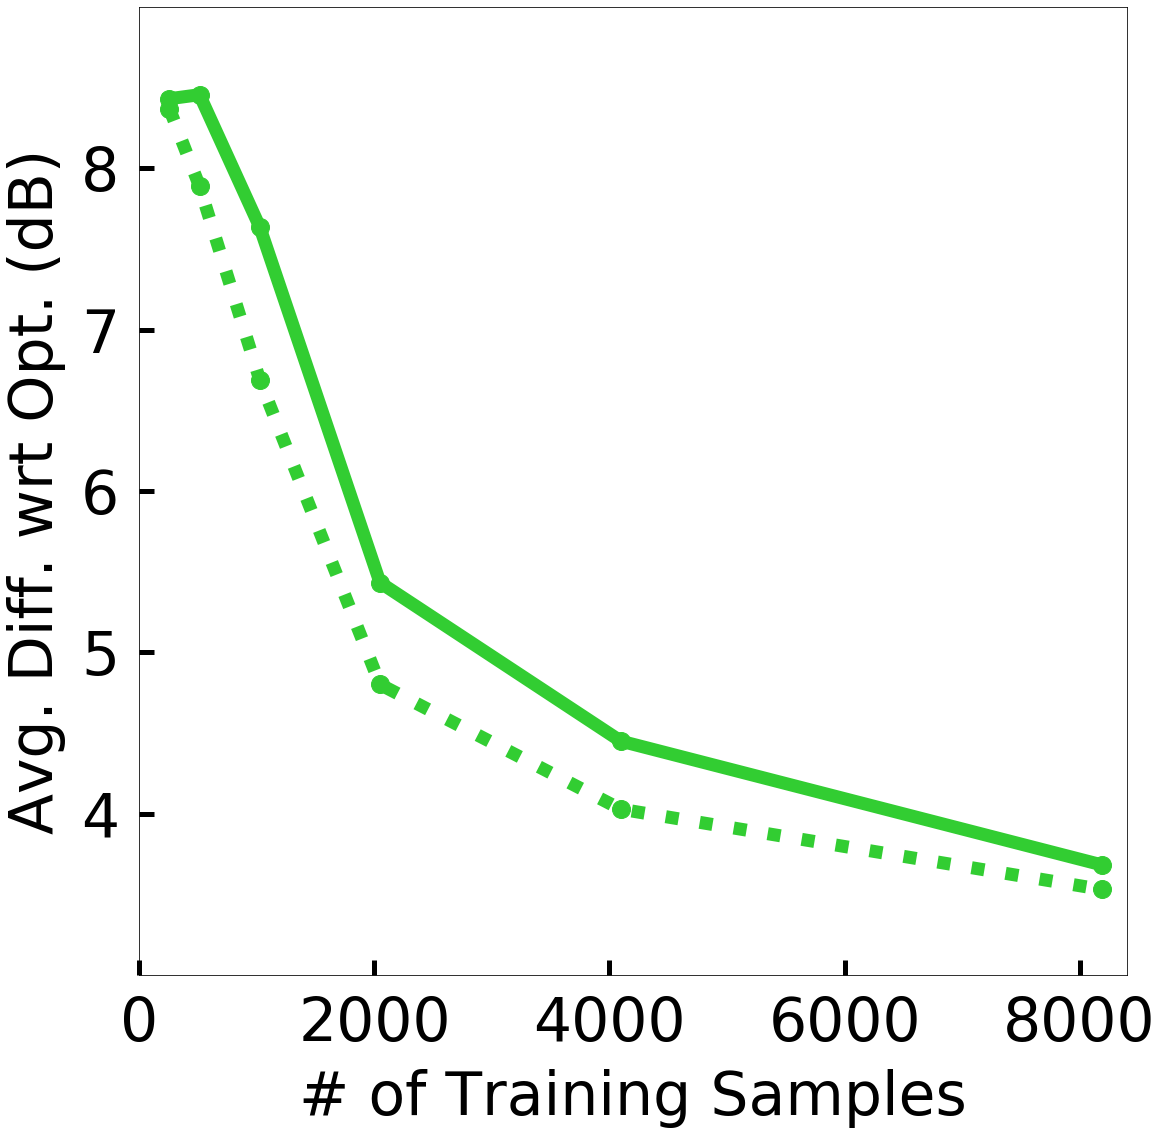

In [170]:
### MAX_POWER ANAlysis, Effect of synthetic data, Training Set is 40K
#variable training samples, noisy(std=1), field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
# "dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt",
# "dynamic_pus_synthetic_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt"
#}

# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096]

# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False


# sensors = True
average_diff = []
fp = []
# interpolation_ratio = [0, 10, 20, 30, 40, 50]
training_samples = [256, 512, 1024, 2048, 4096, 8192]
# interpolation_samples = [8192 - training_sample for training_sample in training_samples]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 

## CNN
average_diff.append([8.432, 8.457, 7.638, 5.432, 4.449, 3.681])
fp.append([1.326, 1.331, 2.526, 2.467, 2.892, 2.232]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]

# with synthetic samples
average_diff.append([8.37, 7.89, 6.69, 4.80, 4.027, 3.529])
fp.append([2.075, 2.694, 3.16, 3.01, 2.22, 2.232])
# best_lambda = [0.1, 0.01, 0.01,0.01 , 0.01]



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.977, top=0.98, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 9, 1))
ax.set_ylim([3, 9])
ax.set_xlim([0, 8400])
box_to_anchor = (0, 1)
# plt.legend([ 'No-Synthetic', 'With-Synthetic'], bbox_to_anchor=box_to_anchor, ncol=1, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_100m_splat_synthetic_effect.png')


# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[0], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)


# ax.set_xticks(training_samples)
# ax.set_yticks([5, 6, 7, 8, 9])

# matplotlib.rcParams.update({'font.size': 22})




# Fig 8 (b)

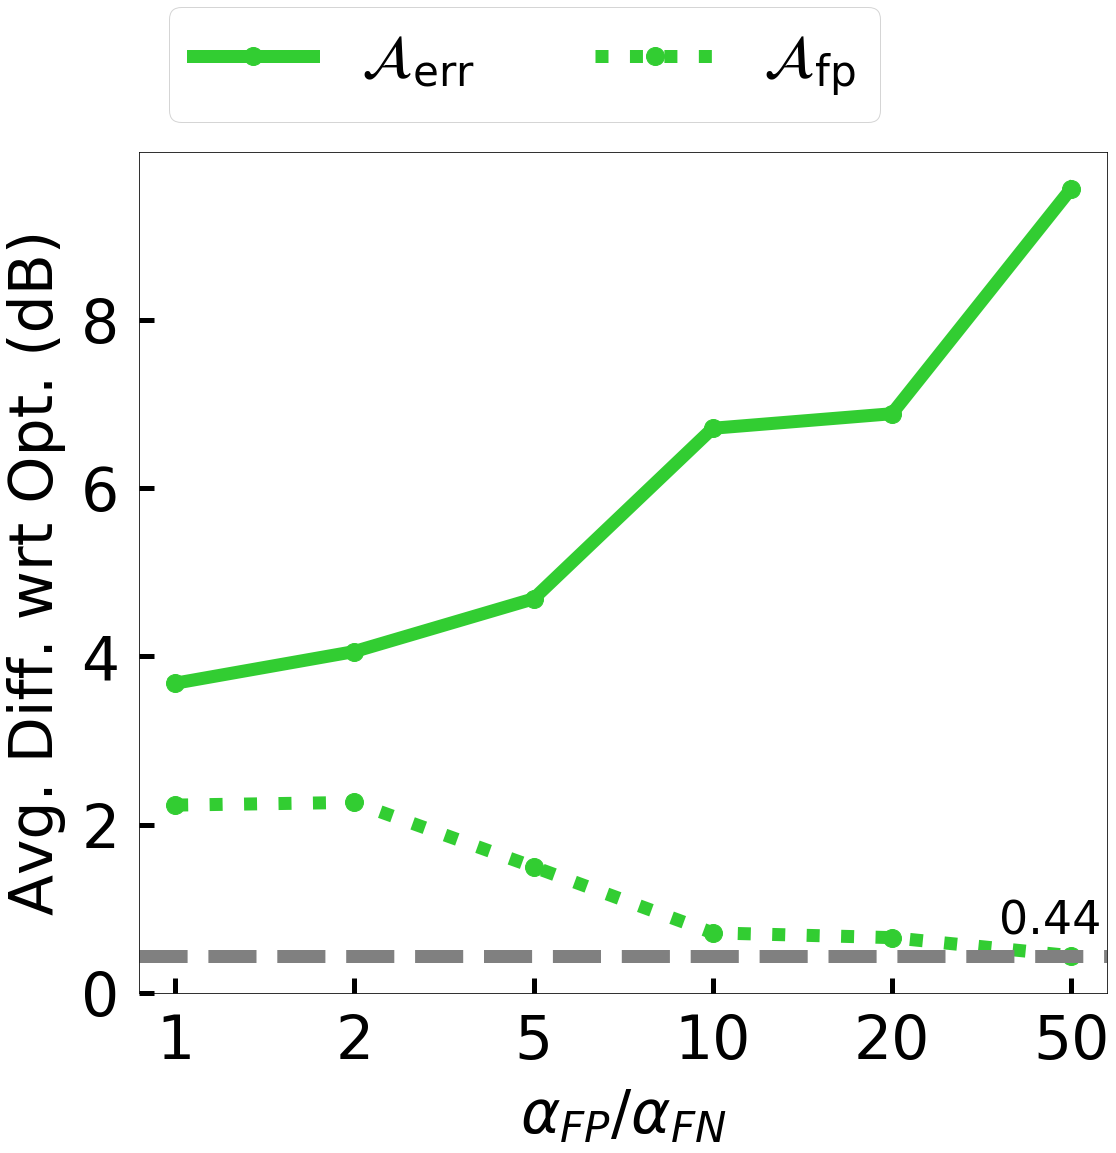

In [25]:
# SPLAT asymmetric function
### MAX_POWER ANAlysis, Effect of changing number of PUs, 8k samples
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False




average_diff = []
fp = []
training_samples = [1, 2, 3, 4, 5, 6]  # equals [1, 2, 5, 10, 20, 50]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])         
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([3.681, 4.058, 4.685, 6.713, 6.886, 9.562])
fp.append([2.232, 2.264, 1.497, 0.713, 0.656, 0.441]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.13, right=0.97, top=0.87, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, fp[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel(r"$\alpha_{FP}/\alpha_{FN}$", labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(0, 10, 2))
ax.set_xticklabels(['1', '2', '5', '10', '20', '50'])
ax.set_ylim([0, 10])
ax.set_xticks(training_samples)
ax.set_xlim([0.8, 6.2])
box_to_anchor = (0, 1)
plt.axhline(y=0.44, linestyle='dashed',  color='grey')
ax.text(5.6, 0.7, '0.44', fontsize=46)
plt.legend([r"$\mathrm{\mathcal{A}_{err}}$", r"$\mathrm{\mathcal{A}_{fp}}$"], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_10cell_assymetric.png')

In [ ]:
# SPLAT asymmetric function, using Sesnsors
### MAX_POWER ANAlysis, Effect of changing number of PUs, 8k samples
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_29_19_50.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_29_19_50.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

#number_samples = [8192] 
# number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10  # su_size:30 for 1000, 10 for 100
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3600
average_diff = []
fp = []
training_samples = [1, 2, 3, 4]  # equals [1, 2, 5, 10]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])         
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([6.14, 7.02, 7.605, 8.5])
fp.append([3.341, 3.046, 2.215, 1.657]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[0], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, fp[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=class_reg)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('FP/FN Ratio', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(0, 8, 2))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)
ax.set_xticks(training_samples)
ax.set_xticklabels(['1', '2', '5', '10'])

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([0, 8.5])
ax.set_xlim([0.8, 4.2])
plt.legend([ 'Total Error', 'FP Error'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_100grid_10cell_assymetric_sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

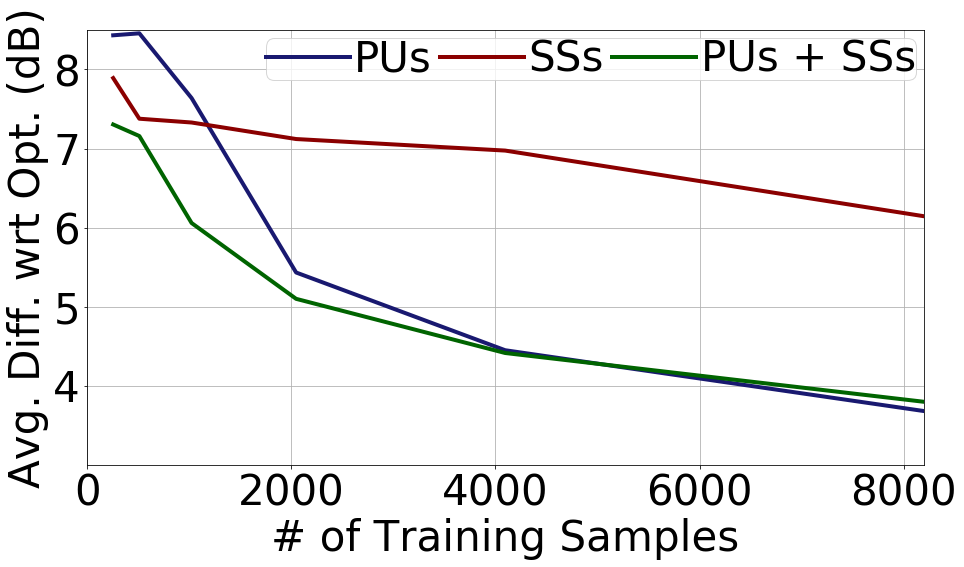

In [162]:
# SPLAT, using sensors and PU information
### MAX_POWER ANAlysis, Effect of changing number of PUs
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [256, 512, 1024, 2048, 4096, 8192] 



## CNN
# using PUs
average_diff.append([8.432, 8.457, 7.638, 5.432, 4.449, 3.681])
fp.append([1.326, 1.331, 2.526, 2.467, 2.898, 2.232]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]

# using Sensors
average_diff.append([7.891, 7.377, 7.329, 7.12, 6.974, 6.145]) # 3600 sensors
fp.append([4.127, 2.445, 3.097, 3.429, 3.756, 3.336]) # 3600 sensors
# best_lambda = [0.1, 0, 0.1, 0, 0.1] #3600 sensors

#Using Sensors + Pus
## *************** Using 6 channels for sensors
# average_diff.append([8.492, 8.066, 7.213, 6.29, 4.76, 4.134])
# fp.append([1.338, 2.655, 2.397, 2.903, 2.378, 2.28])
# best lambda = [0, 0.1, 0.001, 0.1, 0.01, 1]
# **************** Using 1 channel for sensors(heatmap)
average_diff.append([7.304, 7.158, 6.058, 5.099, 4.414, 3.798])
fp.append([3.036, 3.497, 3.43, 2.506, 2, 2.144])
# best_lambda = [0.01, 0.01, 0.1, 0.001, 1, 0.1]




line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Training Samples', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 1))
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([3, 8.5])
ax.set_xlim([0, 8200])
plt.legend([ 'PUs', 'SSs', 'PUs + SSs'], ncol=3, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_100grid_10cell_pus_3600sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
#Splat - Sensor Placement
### MAX_POWER ANAlysis, Effect of sensor density, Training Set is 8K
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
#"dynamic_pus_100sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt", 
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_36.txt",
#"dynamic_pus_225sensor_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_19_00_46.txt",
#"dynamic_pus_400sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_13_03.txt",
#"dynamic_pus_625sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_14_20.txt",
#"dynamic_pus_900sensor_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_15_12.txt"}
# 
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 4  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 100
#     sensors_file_path = "../../../java_workspace/research/commons/resources/sensors/square" \
#     + str(max(max_x, max_y)) + "/" + str(sensors_num) + "/sensors.txt"


# sensors = True
average_diff = []
fp = []
sensor_numbers = [100, 400, 900, 1600, 2500, 3600] 
training_samples = sensor_numbers


## LR
# average_diff.append([])

# fp.append([])


## Terrain    
average_diff.append([8.283, 8.253, 8.17,  8.331, 8.216, ])          
fp.append([4.397, 4.503, 4.106, 4.672, 4.06])
# best_lambda = [1, 0.1, 1]

## Terrain - Himanshu
average_diff.append([8.228, 8.271, 8.288, 8.431, 8.203])
fp.append([3.726, 4.118, 4.091, 4.541, 4.604])
# best_lambda = [0.001, 0.1, 1, , 1]



## Probability
average_diff.append([8.303, 8.253, 8.258, 8.302, 8.271, ])
fp.append([4.487, 3.98, 4.154, 4.58, 4.787, ]) 
#best_lambda = [1, ]

# uniform
average_diff.append([8.312, 8.273, 8.228, 8.269, ])
fp.append([3.731, 4.479, 4.684, 4.3])
#best_lambda = [0.01, 0.1, 1, 1]


#49 sensors, power changing
#terrain himanshu: average_error:  8.21 , fp_average_error:  4.405, best_lambda = 1
#uniform: average_error:  8.273 , fp_average_error:  4.326, best_lambda = 0.01
# 49 sensors, power fixed:
#Terrain: average_error:  5.175 , fp_average_error:  2.942, best_lambda = 1
#uniform: average_error:  4.379 , fp_average_error:  2.654, best_lambda 0.1



line_width = 4
marker_size = 10
reg_style = 'solid'
class_reg = 'dashed'
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[0], color='midnightblue',
         linewidth=line_width, markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[2], color='darkgreen', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
plt.plot(training_samples, average_diff[3], color='orange', linewidth=line_width,
         markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[4], color='darkorange', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)
plt.xlabel('# of Sensors', fontsize=42)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', fontsize=42)
# plt.title('Dynamic PUs(1000m*1000m)\n, alpha: 3, \n changing number of sensors')
plt.grid(True)

ax.set_yticks(np.arange(4, 9, 0.5))
ax.set_xticks([400, 900, 1600, 2500, 3600])
plt.rcParams.update({'font.size': 42})
ax.tick_params(axis='x', labelsize=42)
ax.tick_params(axis='y', labelsize=42)

# matplotlib.rcParams.update({'font.size': 22})

ax.set_ylim([5.5, 9])
ax.set_xlim([90, 3600])
plt.legend([ 'NN', 'SVR', 'CNN', 'CSSA'], ncol=4, loc='best', handletextpad=0.1,
           borderpad=0, columnspacing=0.2, borderaxespad=0.2)
# plt.legend(handletextpad=0.1)
plt.savefig('ML/results/Changing_10_20PUs_splat_100grid_1cell_changing_number_sensors.png', 
            bbox_inches = 'tight', pad_inches = 0)

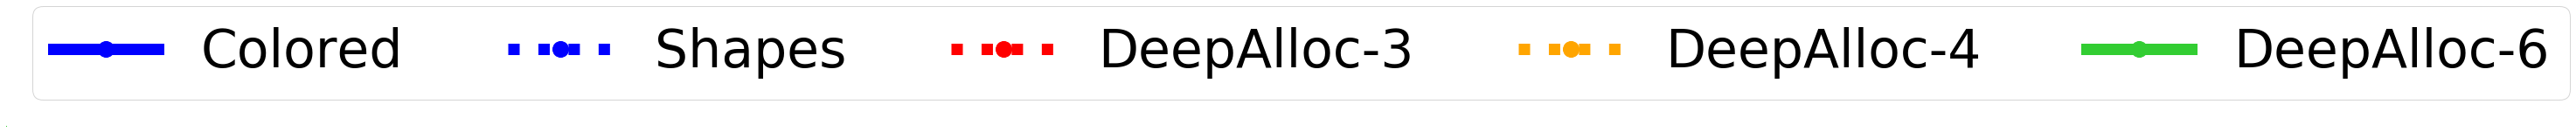

In [83]:
#Splat - Comparing different preprocessing
### MAX_POWER ANAlysis, Effect of data set size, 
#variable training samples,  field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
#"dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_28_13_45.txt",
#"dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_06_28_13_45.txt",}
# 

# number_samples = [128, 256, 512, 1024, 2048, 4096, 8192] 
# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 3, 50  # su_size:30 for 1000, 10 for 100
# cell_size = 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
number_samples = [256, 512, 1024, 2048, 4096, 8192] 
training_samples = number_samples


# no sheets - colorful images
average_diff.append([7.664, 7.332, 7.159, 7.066, 7.113, 6.794]) # 8.004, for 128.
# [8.449, 8.268, 7.964, 7.617, 7.482, 7.29]
# [7.749, 7.068, 7.064, 7.017, 6.982, 6.29]
# [8.158, 7.664, 7.332, 7.159, 7.066, 7.113, 6.794]

# grey color - different shapes
average_diff.append([9.234, 8.814, 8.653, 8.223, 7.793, 7.567])


fp.append([8.004, 7.749, 7.068, 7.064, 7.017, 6.982, 6.29])

# 2 sheets (15dBm interval) + 1 su
average_diff.append([ 8.156, 7.679, 7.375, 7.026, 6.899, 5.324]) # 7.785, for 128. [8.156, 7.079, 7.075, 7.026, 7.399, 5.324]
fp.append([1.839, 1.862, 3.458, 3.01, 3.486, 2.291, 2.807])

# 3 sheets (10dBm interval) + 1 su sheet
average_diff.append([8.107, 7.853, 7.213, 7.049, 6.259, 4.764]) # 7.868, for 128
fp.append([1.765, 1.736, 1.742, 2.585, 3.804, 3.679, 3.107])

# 6 sheets (5dBm interval) + 1 su sheet
average_diff.append([8.432, 8.457, 7.638, 5.432, 4.449, 3.681])
fp.append([1.326, 1.331, 2.526, 2.467, 2.898, 2.232]) 




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.98, top=0.8, bottom=0.15)
# fig.subplots_adjust(left=0.8, right=0.8001, top=0.9901, bottom=0.99)


plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['NN'],    marker=MARKER['NN'],   linestyle=LINE['CSSA'])
plt.plot(training_samples, average_diff[2], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'],  marker=MARKER['CSSA'],  linestyle=LINE['CSSA'])
plt.plot(training_samples, average_diff[4], color=COLOR['CNN'], marker=MARKER['CNN'], linestyle=LINE['CNN'])


plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)



# matplotlib.rcParams.update({'font.size': 22})

ax.set_yticks(np.arange(0, 12, 2))
ax.set_ylim([2, 9])
ax.set_xlim([0, 8500])
box_to_anchor = (0, 1)
plt.savefig('ML/results/new/Changing_10_20PUs_splat_100grid_1cell_changing_number_sheets.png', 
            bbox_inches = 'tight', pad_inches = 0)

# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# plt.legend([ 'Colored','Shapes', 'DeepAlloc-3', 'DeepAlloc-4', 'DeepAlloc-6'],
#            bbox_to_anchor=box_to_anchor, ncol=5, loc='lower left')


# plt.savefig('ML/results/new/changing_number_sheets_legend.png', 
#             bbox_inches = 'tight', pad_inches = 0)

# TEST-BED

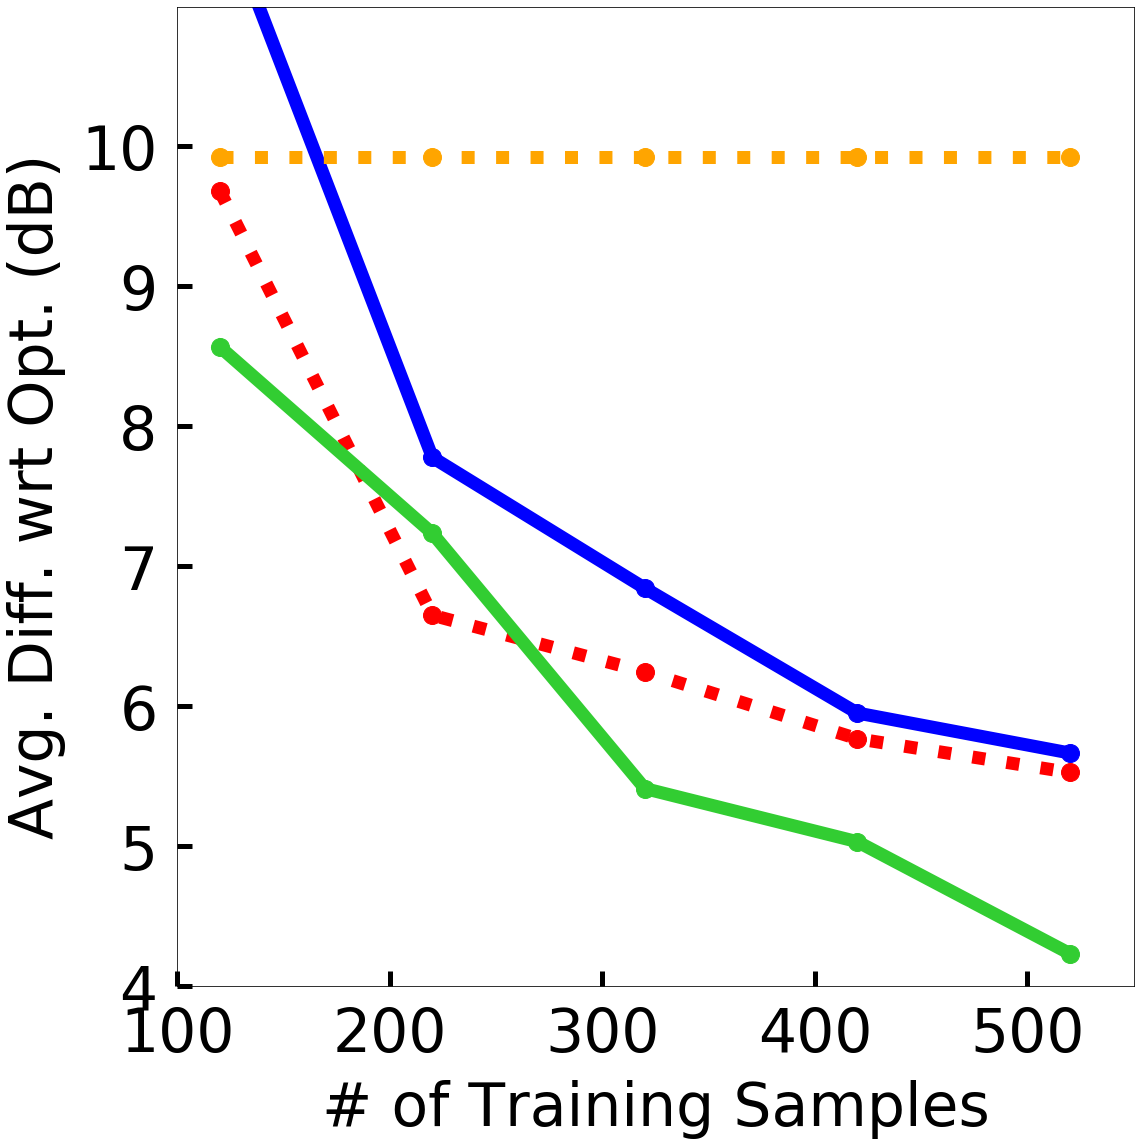

In [188]:
### MAX_POWER ANAlysis, Using PUs
# Effect of changing trainig size
#variable training samples, , field 10*10, validation samples training/5, test samples few
# dynamic pus(number of pus is changing),  field 10*10
# data_sets = {"testbed_pu_1_shuf"}
# comparing CNN and previous machine learning algos using pu info.
# number_samples = [30, 60, 90, 120, 150, 180, 210] 

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.2, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 5, 10  # su_size:30 for 1000, 10 for 100
# cell_size = int(max(max_x, max_y)/10)
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 4, 1
# propagation_model = 'testbed' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [120, 220, 320, 420, 520]  


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([11.723, 7.777, 6.842, 5.95, 5.664]) 
fp.append([1.846, 2.817, 2.656, 3.126, 1.32])
# average_diff.append([8.321, 7.041, 7.518, 7.148, 8.731, 7.623, 5.859])          
# fp.append([2.298, 3.837, 3.75, 3.697, 5.978, 4.835, 2.327])
#best lambda:  [0.01, 1, 1, 0, 0, 0.01, 1]

# ## SVR
average_diff.append([9.681, 6.649, 6.244, 5.766, 5.525])
fp.append([0.853, 2.428, 2.937, 2.314, 1.776])
# average_diff.append([7.92, 8.193, 7.476, 7.132, 7.277, 6.784, 7.05])
# fp.append([1.484, 1.627, 1.474, 2.485, 3.039, 3.437, 4.384]) 



## CNN
# average_diff.append([9.25, 8.23, 6.46, 6.144, 5.87])
average_diff.append([8.567, 7.234, 5.41, 5.03, 4.23]) # removing outliers
fp.append([3.16, 3.07, 3.48, 2.98, 2.65])
#best_cnn = []
# average_diff.append([12.271, 6.987, 6.732, 6.363, 6.702, 5.717, 5.138])#[12.167, 11.531, 11.432, 8.482, 7.128, 6.235, 5.138])
# fp.append([0.808, 1.68, 0.854, 3.847, 1.295, 1.695, 2.236])
# best_lambda = [1, 0.1, 0.001, 1, 0.1, 1, 0.1]
# val_error
# [12.271, 6.987, 6.732, 6.363, 6.702, 5.717, 5.138]

# CSSA
average_diff.append([9.922] * len(training_samples))
fp.append([5.356] * len(training_samples))


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.16, right=0.99, top=0.99, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 11, 1))
ax.set_ylim([4, 11])
ax.set_xlim([100, 550])
box_to_anchor = (-0.02, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/testbed_using_pus_changing_training_size.png')

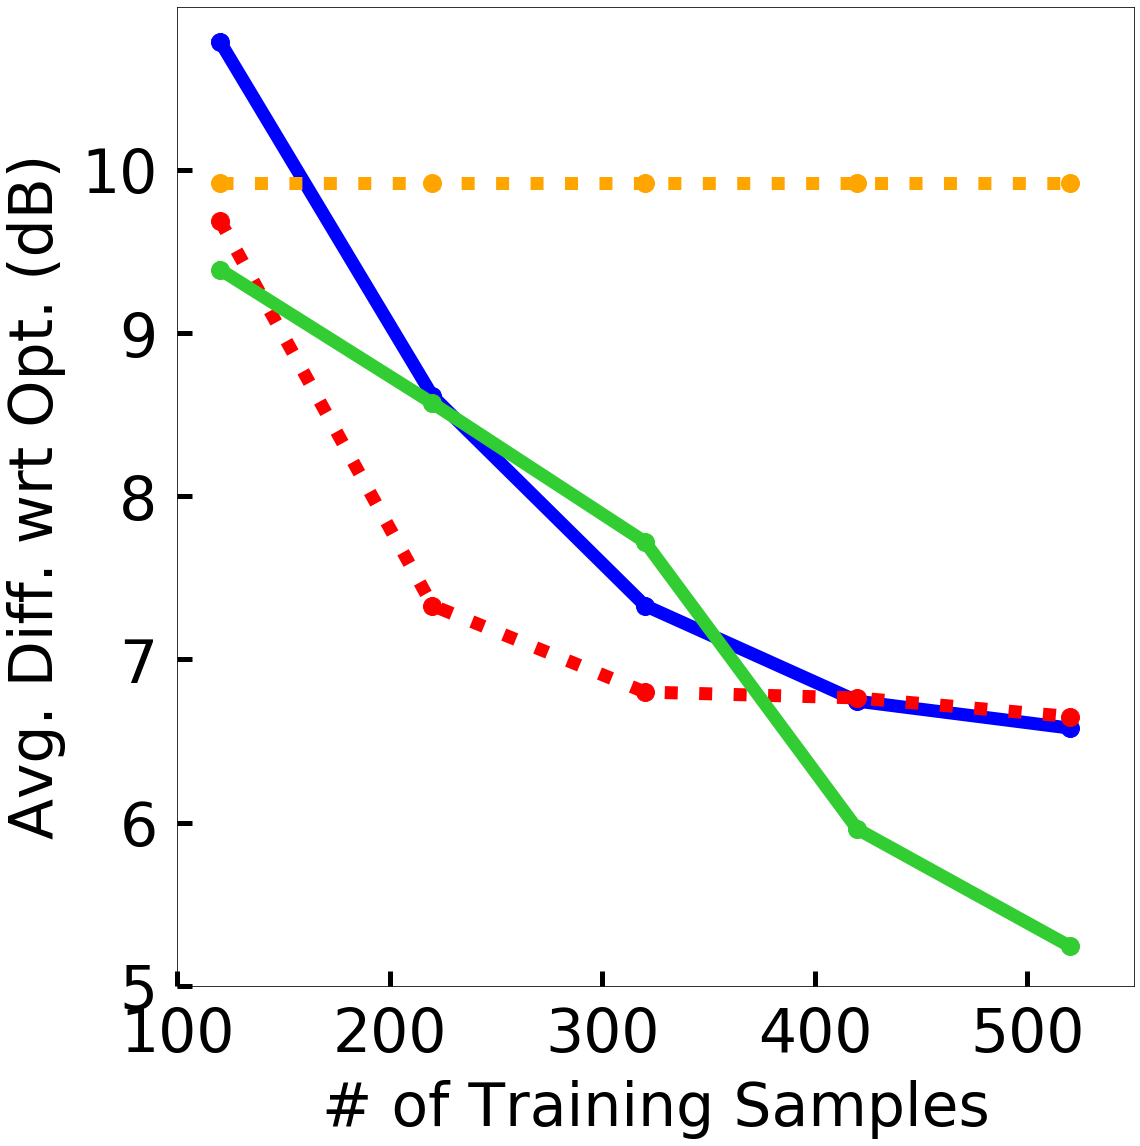

In [189]:
### MAX_POWER ANAlysis, Using SSs
# Effect of changing trainig size
#variable training samples, , field 10*10, validation samples training/5, test samples few
# dynamic pus(number of pus is changing),  field 10*10
# data_sets = {"testbed_ss_1_shuf"}
# comparing CNN and previous machine learning algos using pu info.
# number_samples = [30, 60, 90, 120, 150, 180, 210] 

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.2, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 5, 10  # su_size:30 for 1000, 10 for 100
# cell_size = int(max(max_x, max_y)/10)
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 4, 1
# propagation_model = 'testbed' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
#     sensors_num = 18
average_diff = []
fp = []
training_samples = [120, 220, 320, 420, 520]  


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([10.786, 8.615, 7.33, 6.744, 6.579])          
fp.append([4.724, 4.2, 3.29, 4.293, 3.96])
#best lambda:  []


# ## SVR
average_diff.append([9.689, 7.33, 6.8, 6.764, 6.65])
fp.append([1.127, 3.382, 2.999, 3.299, 3.788]) 



## CNN
average_diff.append([9.389, 8.57, 7.72, 5.96, 5.242])
fp.append([3.84, 3.79, 3.33, 3, 2.98])
# best_lambda = [0, 0.1, 0.01, 0.001, 1, 0]
# val_error
# [12.047, 10.968, 8.967, 6.321, 7.105, 6.592, 6.13]
#TEST_ERROR
# [14.852, 10.968, 9.325, 7.949, 7.761, 7.568, 6.13]

# CSSA
average_diff.append([9.922] * len(training_samples))
fp.append([5.356] * len(training_samples))


fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.16, right=0.99, top=0.99, bottom=0.14)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 11, 1))
ax.set_ylim([5, 11])
ax.set_xlim([100, 550])
box_to_anchor = (-0.02, 1)
# plt.legend([ 'NN', 'SVR', 'CNN', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/testbed_using_sss_changing_training_size.png')

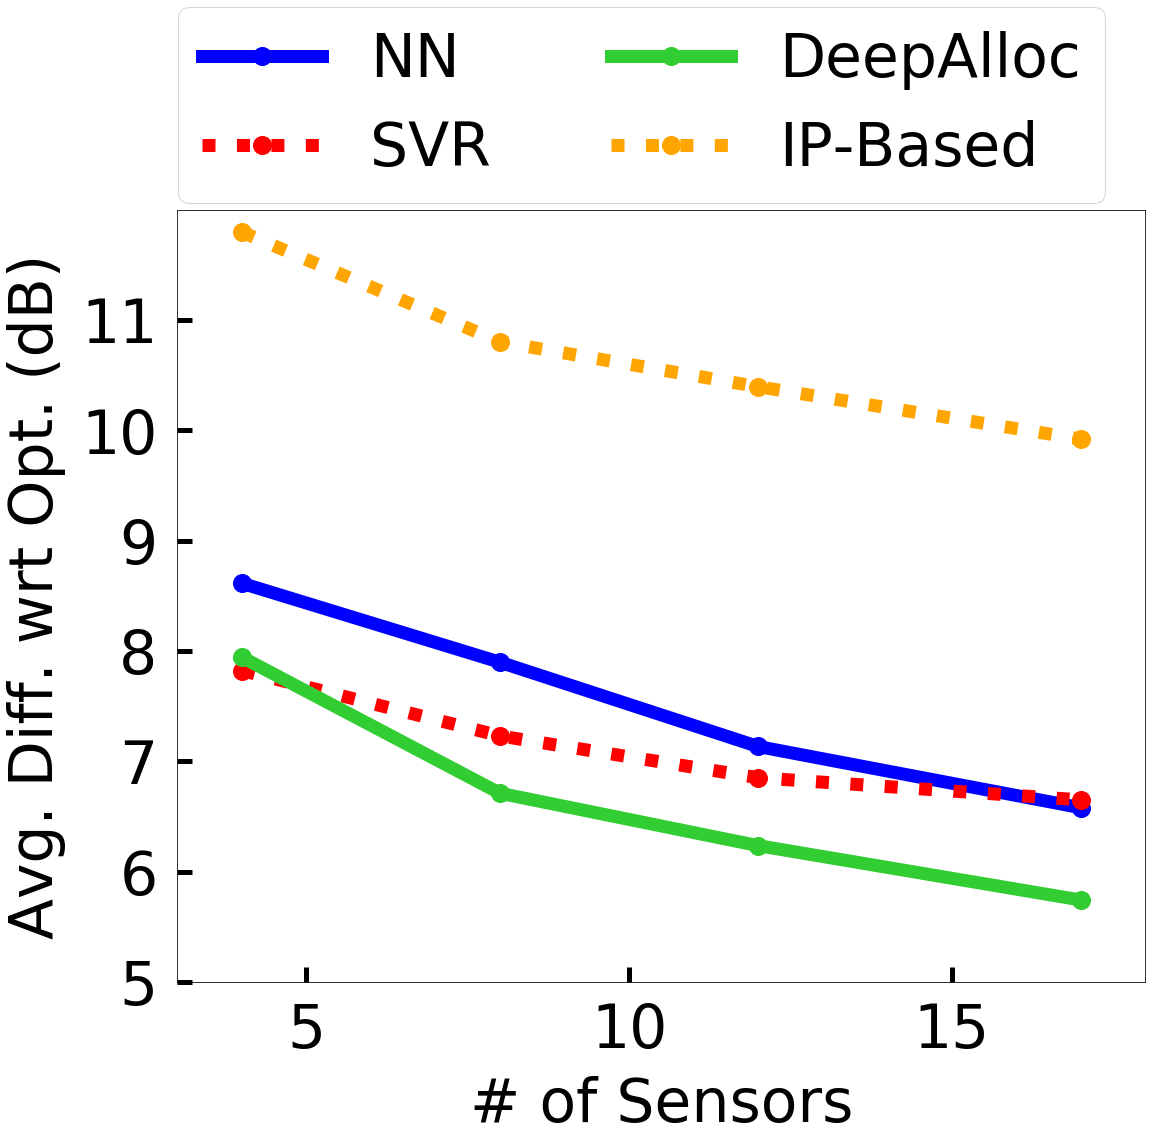

In [202]:
### MAX_POWER ANAlysis, Using SSs
# Effect of changing sensor set size, 210 training sample
#variable training samples, , field 10*10, validation samples training/5, test samples few
# dynamic pus(number of pus is changing),  field 10*10
# data_sets = {"testbed_ss_1_shuf"}
# comparing CNN and previous machine learning algos using pu info.
# number_samples = [30, 60, 90, 120, 150, 180, 210] 

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.2, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 5, 10  # su_size:30 for 1000, 10 for 100
# cell_size = int(max(max_x, max_y)/10)
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear', slope 3 for 1000, 5 for 100
# max_pus_num, max_sus_num = 4, 1
# propagation_model = 'testbed' # 'splat', 'log', 'testbed'
# noise, std = False, 1 # False for splat
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
#     sensors_num = 18
average_diff = []
fp = []
training_samples = [4, 8, 12, 17]  


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([8.614, 7.898, 7.134, 6.579])          
fp.append([2.86, 3.522, 3.671, 3.96])
#best lambda:  []


# ## SVR
average_diff.append([7.823, 7.23 , 6.851, 6.65])
fp.append([3.53,3.43 , 3.671, 3.788]) 



## CNN
average_diff.append([7.943, 6.71, 6.235, 5.742])
fp.append([3.29, 3.09, 2.89, 2.98])

# IP-BASED
average_diff.append([11.799, 10.804, 10.397, 9.922])
fp.append([5.506, 5.331, 5.205, 5.356])



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.15, right=0.99, top=0.80, bottom=0.13)

plt.plot(training_samples, average_diff[0], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, average_diff[1], color=COLOR['SVR'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CSSA'], marker=MARKER['CSSA'], linestyle=LINE['CSSA'])

plt.xlabel('# of Sensors', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 12, 1))
ax.set_ylim([5, 12])
ax.set_xlim([3, 18])
box_to_anchor = (-0.03, 0.97)
plt.legend([ 'NN', 'SVR', 'DeepAlloc', 'IP-Based'], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/testbed_using_sss_changing_sensor_density.png')

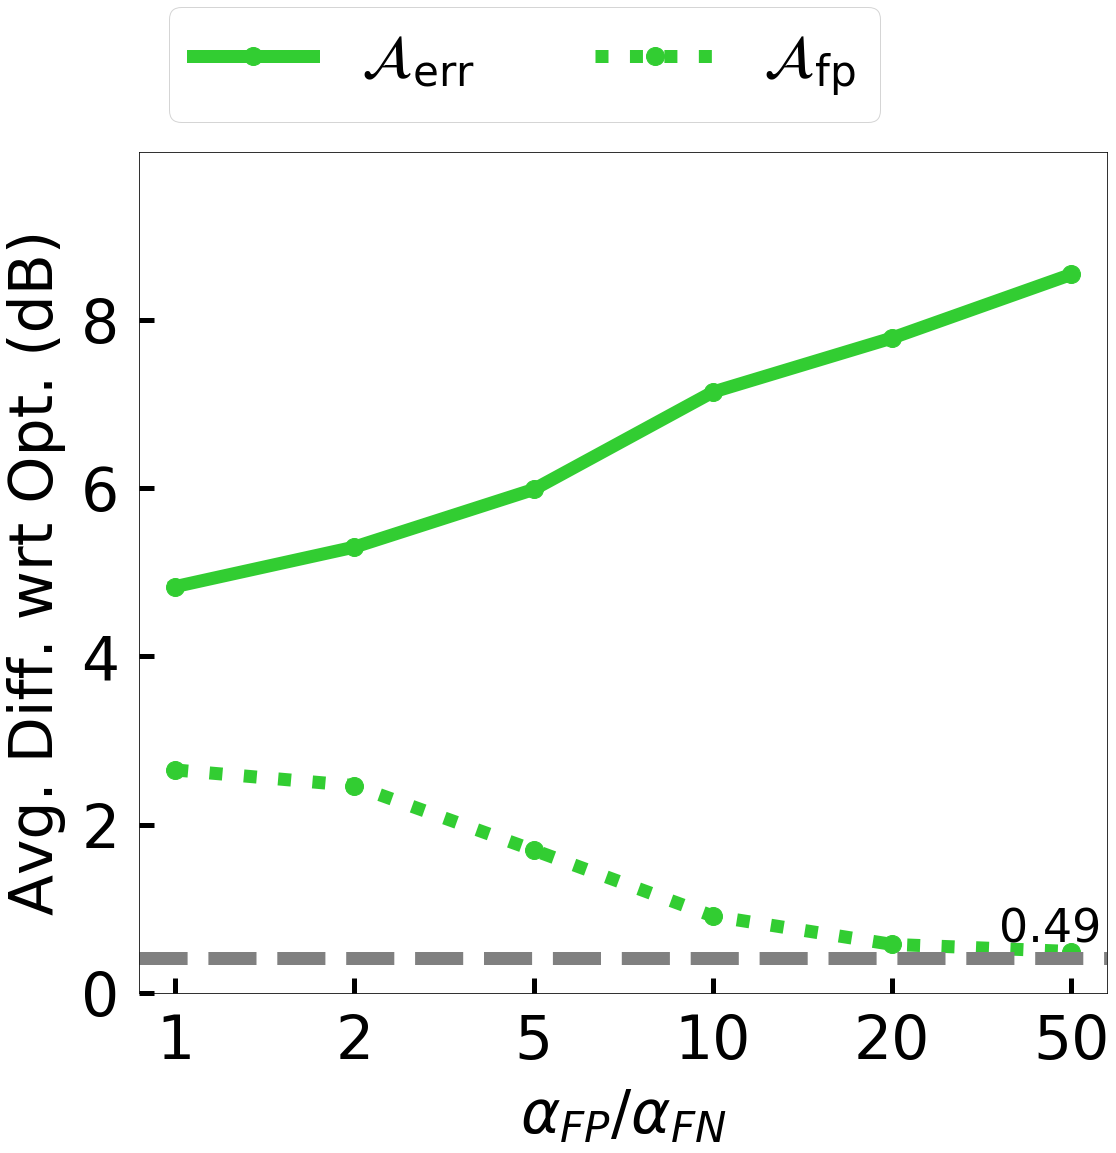

In [23]:
# SPLAT asymmetric function
### MAX_POWER ANAlysis, Effect of changing number of PUs, 8k samples
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False


import numpy as np

average_diff = []
fp = []
training_samples = [1, 2, 3, 4, 5, 6]  # equals [1, 2, 5, 10, 20, 50]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])         
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
average_diff.append([3.681, 4.058, 4.685, 6.713, 6.886, 9.562])
fp.append([2.232, 2.264, 1.497, 0.713, 0.656, 0.441]) 

average_diff.append([4.83, 5.3, 5.985, 7.143, 7.786, 8.542])
fp.append([2.65, 2.464, 1.697, 0.913, 0.5756, 0.491]) 
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]




fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.13, right=0.97, top=0.87, bottom=0.14)


plt.plot(training_samples, average_diff[3], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, fp[3], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel(r"$\alpha_{FP}/\alpha_{FN}$", labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(0, 10, 2))
ax.set_xticks(training_samples)
ax.set_xticklabels(('1', '2', '5', '10', '20', '50'))
ax.set_ylim([0, 10])
ax.set_xlim([0.8, 6.2])
box_to_anchor = (0, 1)
plt.axhline(y=0.41, linestyle='dashed',  color='grey')
ax.text(5.6, 0.6, '0.49', fontsize=46)
plt.legend([r"$\mathrm{\mathcal{A}_{err}}$", r"$\mathrm{\mathcal{A}_{fp}}$"], bbox_to_anchor=box_to_anchor, ncol=2, loc='lower left')
plt.savefig('ML/results/new/Changing_10_20PUs_testbed_100grid_10cell_assymetric.png')

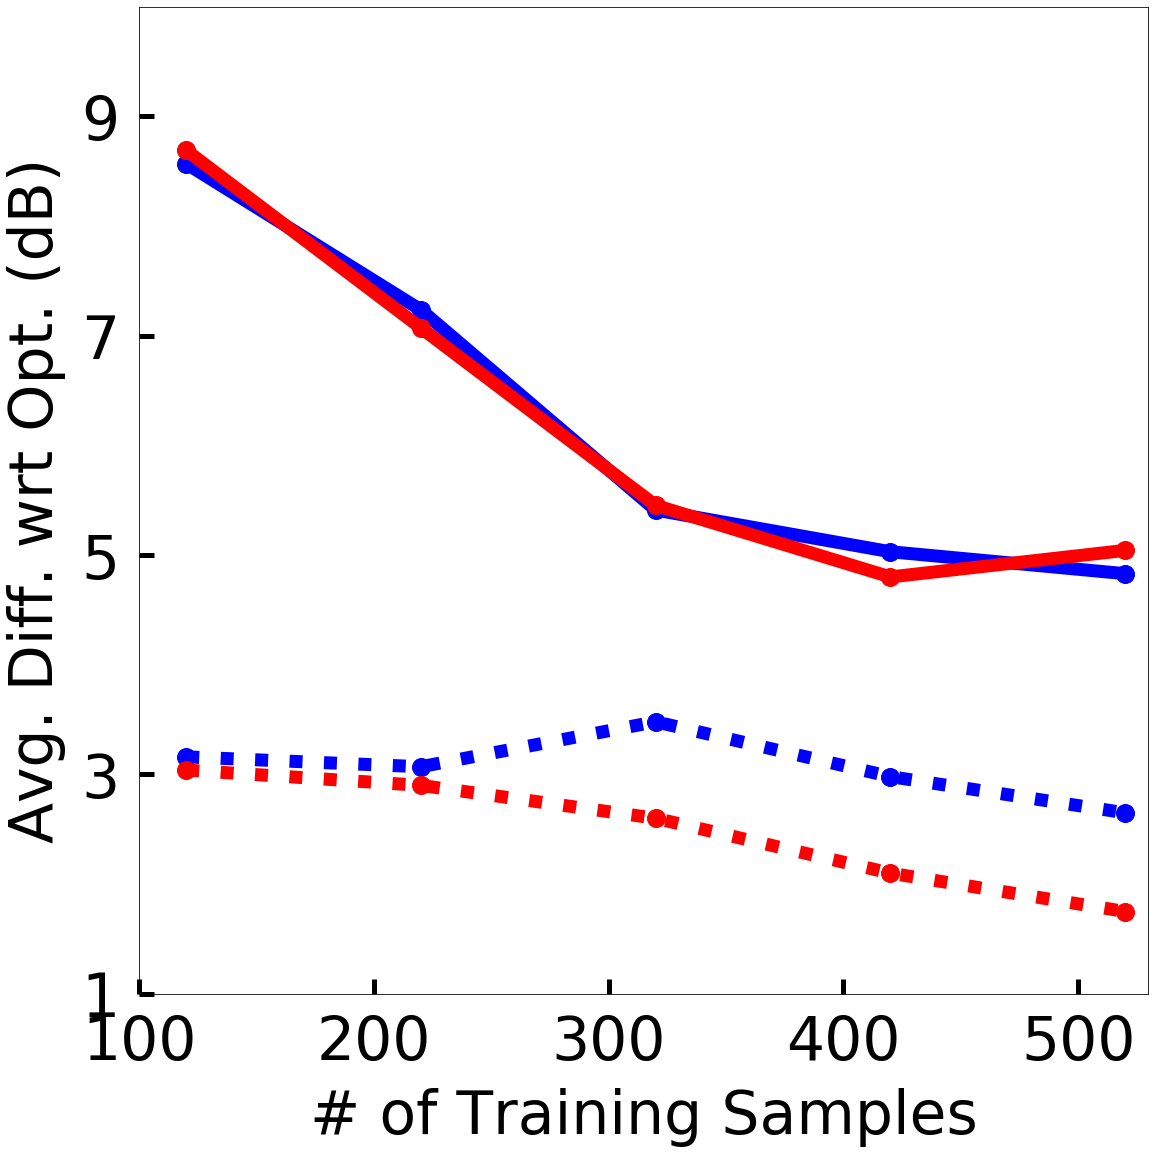

In [110]:
# SPLAT, Conservative(subtracting training lable from a value)
### MAX_POWER ANAlysis, Effect of changing number of PUs
#variable training samples, , field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {"dynamic_pus_using_pus_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt",
#"dynamic_pus_max_power_50000_min10_max20PUs_1SUs_square100grid_splat_2020_06_16_23_18.txt"}
# comparing CNN and previous machine learning algos using sensor readings.

# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False
average_diff = []
fp = []
training_samples = [120, 220, 320, 420, 520] 


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])          
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 




## CNN
# average_diff.append([9.389, 8.57, 7.72, 5.96, 5.242])
# fp.append([3.84, 3.79, 3.33, 3, 2.98])

average_diff.append([8.567, 7.234, 5.41, 5.03, 4.83]) # removing outliers
fp.append([3.16, 3.07, 3.48, 2.98, 2.65])
#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]

#conservative
average_diff.append([8.689, 7.07, 5.452, 4.8, 5.042])
fp.append([3.04, 2.9, 2.6, 2.1, 1.75])
#best_lambda = [0, 1, 0.1, 0]



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.996, top=0.997, bottom=0.14)
# fig.subplots_adjust(left=0.8, right=0.8001, top=0.9901, bottom=0.99)

plt.plot(training_samples, average_diff[2], color=COLOR['NN'],   marker=MARKER['NN'],   linestyle=LINE['NN'])
plt.plot(training_samples, fp[2], color=COLOR['NN'],  marker=MARKER['SVR'],  linestyle=LINE['SVR'])
plt.plot(training_samples, average_diff[3], color=COLOR['SVR'],  marker=MARKER['NN'],  linestyle=LINE['NN'])
plt.plot(training_samples, fp[3], color=COLOR['SVR'], marker=MARKER['SVR'], linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(1, 10, 2))
ax.set_ylim([1, 10])
ax.set_xlim([100, 530])
box_to_anchor = (0, 1)
# plt.legend([r"Basic DeepAlloc $\mathrm{\mathcal{A}_{err}}$", r"Basic DeepAlloc $\mathrm{\mathcal{A}_{fp}}$",
#             r"Consverative DeepAlloc $\mathrm{\mathcal{A}_{err}}$", r"Conservative DeepAlloc $\mathrm{\mathcal{A}_{fp}}$"], 
#            bbox_to_anchor=box_to_anchor,
#            ncol=2, loc='lower left', columnspacing=1.5)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# plt.savefig('ML/results/new/conserve_legend.png', bbox_inches = 'tight', pad_inches = 0)
plt.savefig('ML/results/new/Changing_10_20PUs_testbed_100grid_10cell_conserve.png')

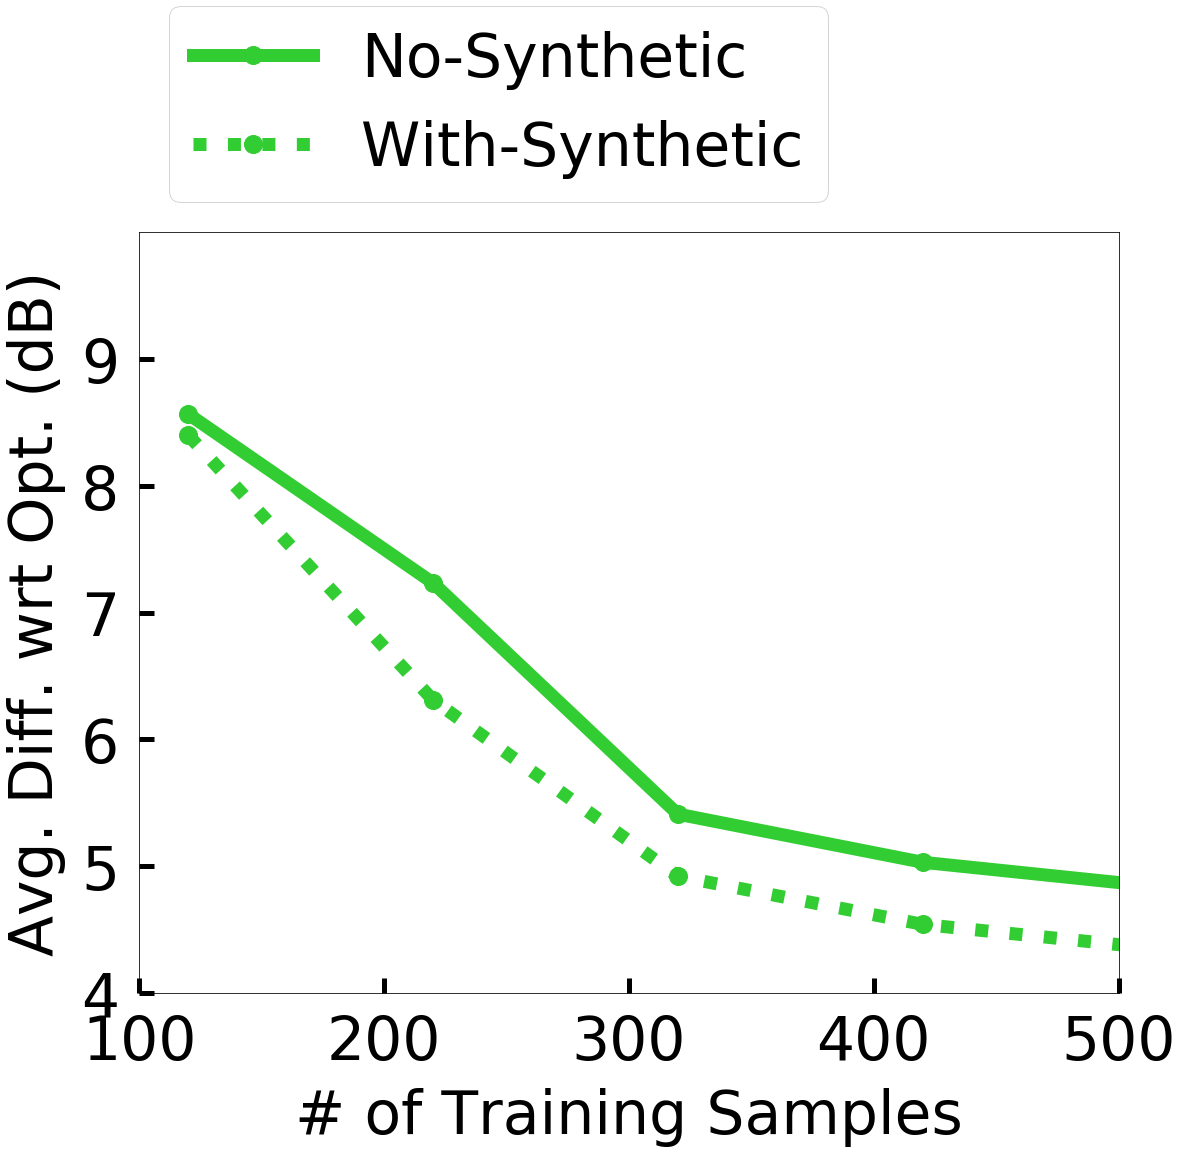

In [36]:
### MAX_POWER ANAlysis, Effect of synthetic data, Training Set is 40K
#variable training samples, noisy(std=1), field 100*100, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 100*100
# data_sets = {
# "dynamic_pus_using_pus_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt",
# "dynamic_pus_synthetic_60000_min10_max20PUs_1SUs_square100grid_splat_2020_07_06_20_11.txt"
#}

# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [256, 512, 1024, 2048, 4096]

# # number_samples = [4096, 4915, 5734, 6554, 7373, 8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0#-110.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 100, 100, 7, 10
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 20, 1
# propagation_model = 'splat' # 'splat', 'log', 'testbed'
# noise, std = False, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = False


# sensors = True
average_diff = []
fp = []
# interpolation_ratio = [0, 10, 20, 30, 40, 50]
training_samples = [120, 220, 320, 420, 520] 
# interpolation_samples = [8192 - training_sample for training_sample in training_samples]


## LR
# average_diff.append([])

# fp.append([])


## NN    
average_diff.append([])
fp.append([])

## SVR
average_diff.append([])
fp.append([]) 

## CNN
average_diff.append([8.567, 7.234, 5.41, 5.03, 4.83]) # removing outliers
fp.append([3.16, 3.07, 3.48, 2.98, 2.65])
# average_diff.append([9.389, 8.57, 7.72, 5.96, 5.242])
# fp.append([3.84, 3.79, 3.33, 3, 2.98])

#best_lambda = [0.01, 0.01, 0, 0.001, 0, 0.001]

# with synthetic samples
average_diff.append([8.4, 6.31, 4.92, 4.54, 4.34])
fp.append([2.075, 2.694, 3.16, 3.01, 2.22, 2.232])
# best_lambda = [0.1, 0.01, 0.01,0.01 , 0.01]



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.97, top=0.80, bottom=0.14)


plt.plot(training_samples, average_diff[2], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff[3], color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 10, 1))
ax.set_ylim([4, 10])
ax.set_xlim([100, 500])
box_to_anchor = (0, 1)
plt.legend([ 'No-Synthetic', 'With-Synthetic'], bbox_to_anchor=box_to_anchor, ncol=1, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_100m_testbed_synthetic_effect.png')


# plt.plot(training_samples, average_diff[0], color='r', linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[0], color='midnightblue',
#          linewidth=line_width, markersize=marker_size, linestyle=reg_style)
# plt.plot(training_samples, average_diff[1], color='darkred', linewidth=line_width,
#          markersize=marker_size, linestyle=reg_style)


# ax.set_xticks(training_samples)
# ax.set_yticks([5, 6, 7, 8, 9])

# matplotlib.rcParams.update({'font.size': 22})




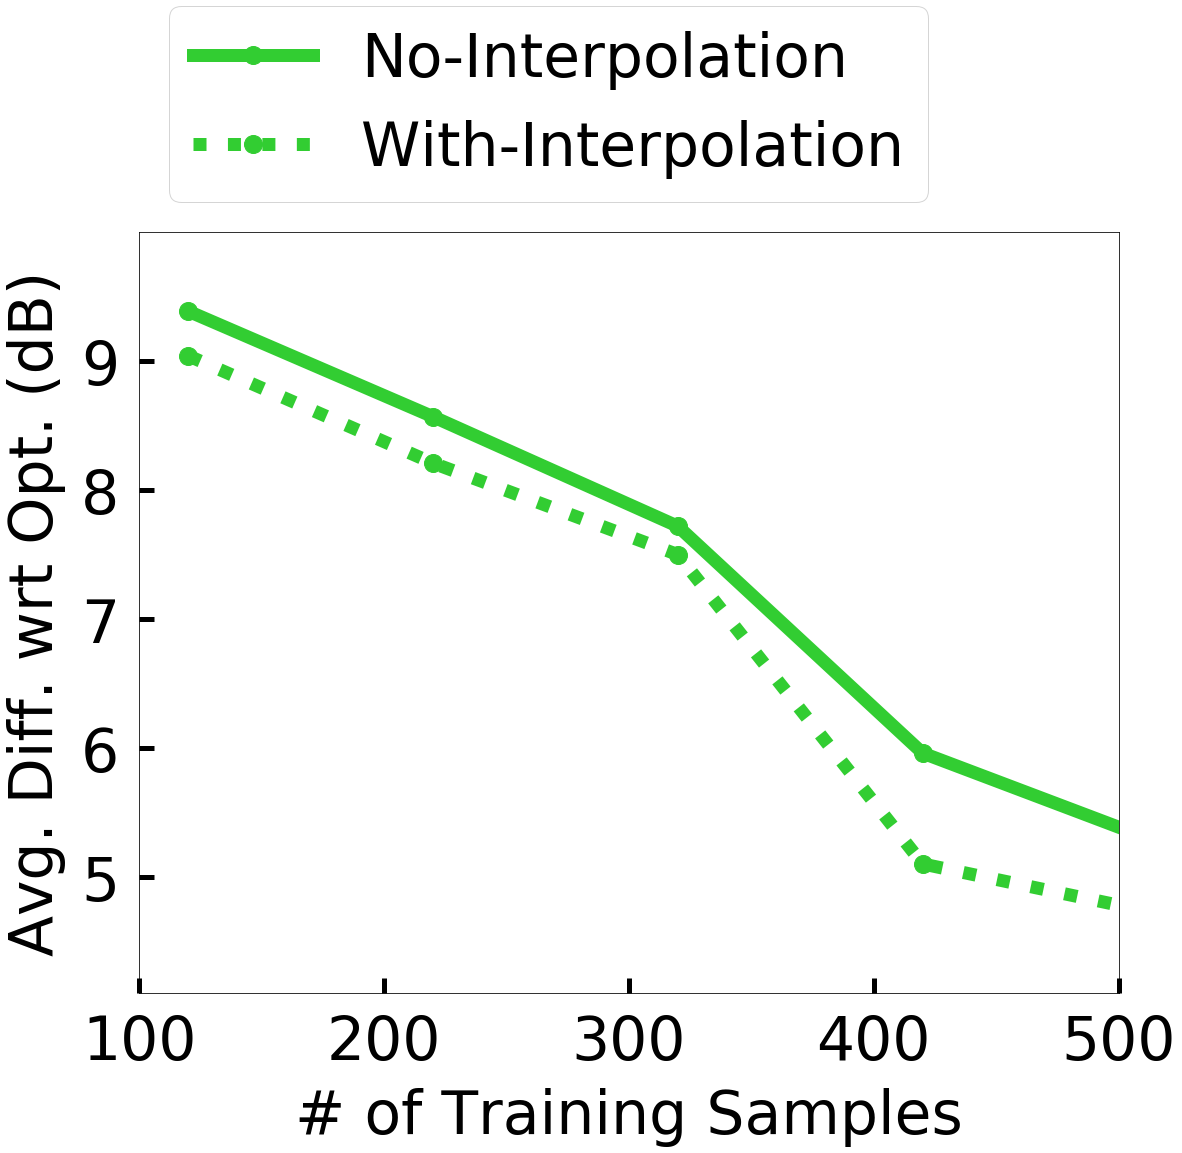

In [44]:
### MAX_POWER ANAlysis, Effect of sensor interpolation, Training Set is 40K
#variable training samples, noisy(std=1), field 1000*1000, validation samples training/3, test samples 40k
# dynamic pus(number of pus is changing),  field 1000*1000
# data_sets = {
# "dynamic_pus_3600sensor_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
# "dynamic_pus_max_power_60000_min10_max20PUs_1SUs_square1000grid_log_noisy_std1.0_2020_06_23_03_17.txt",
#}

# alpha = 3
# comparing CNN and previous machine learning algos using sensor readings.

number_samples = [8192]

# # cnn_type = "classification"  # {"classification", "regression"}
# validation_size, noise_floor = 0.33, -90.0
# su_power = 0 # this is not actually su power just a number to show there is an SU in its image
# max_x, max_y, number_image_channels, su_szie = 1000, 1000, 7, 30
# pu_shape, su_shape = 'circle', 'circle' # shape = {'circle', 'square', 'point'}
# style = "raw_power_min_max_norm"  # {"raw_power_zscore_norm", "image_intensity", "raw_power_min_max_norm"}
# intensity_degradation, slope = 'log', 5  # 'log', 'linear'
# max_pus_num, max_sus_num = 15, 1
# propagation_model = 'log' # 'splat', 'log', 'testbed'
# noise, std = True, 1
# if su_shape == 'circle':
#     su_param = Circle(su_szie)
# elif su_shape == 'square':
#     su_param = Square(su_szie)
# else:
#     su_param = None
    
# sensors = True
# if sensors:
#     sensors_num = 3600


# sensors = True
average_diff = []
fp = []


 
training_samples = [120, 220, 320, 420, 520] 

average_diff.append([9.389, 8.57, 7.72, 5.96, 5.242])
fp.append([3.84, 3.79, 3.33, 3, 2.98])



average_diff_interpolation = [9.043, 8.21, 7.5, 5.1, 4.7]
# fp_interpolation = [3.78, 2.964, 4.622, 3.586, 1.902, 3.269]



fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(left=0.12, right=0.97, top=0.80, bottom=0.14)


plt.plot(training_samples, average_diff[0], color=COLOR['CNN'],   marker=MARKER['CNN'],   linestyle=LINE['CNN'])
plt.plot(training_samples, average_diff_interpolation, color=COLOR['CNN'],  marker=MARKER['CNN'],  linestyle=LINE['SVR'])

plt.xlabel('# of Training Samples', labelpad=15)
plt.ylabel('Avg. Diff. wrt Opt. (dB)', labelpad=15)
ax.tick_params(direction='in', length=15, width=5, pad=20)
ax.set_yticks(np.arange(4, 10, 1))
ax.set_ylim([4.1, 10])
ax.set_xlim([100, 500])
box_to_anchor = (0, 1)
plt.legend(['No-Interpolation', 'With-Interpolation'], bbox_to_anchor=box_to_anchor, ncol=1, loc='lower left')
plt.savefig('ML/results/new/Changing_PUs_100m_testbed_interpolation_effect.png')
